# EDA for CAB

## General Problem Statement

Yellow Cab is priced at $ 10,000,000 whereas the Pink Cab has face value 4,000,000. From the prelimianry analysis , we can deduce that Yellow Cab is e bigger company, with larger coverege and higher profitability. Neverthless, it is still  more expensive to invest. The question is in which company should we invest to enjoy higher ROE (Return on Investement) in the future.

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=True)

import warnings
warnings.filterwarnings('ignore')

In [149]:
# Load the datasets into Pandas DataFrames.
cab_data = pd.read_csv('./DataSets/Cab_Data.csv')
city_data = pd.read_csv('./DataSets/City.csv')
customer_data = pd.read_csv('./DataSets/Customer_ID.csv')
transaction_data = pd.read_csv('./DataSets/Transaction_ID.csv')

### cab_data

In [150]:
cab_data

Transaction ID  Date of Travel     Company           City  \
0             10000011           42377    Pink Cab     ATLANTA GA   
1             10000012           42375    Pink Cab     ATLANTA GA   
2             10000013           42371    Pink Cab     ATLANTA GA   
3             10000014           42376    Pink Cab     ATLANTA GA   
4             10000015           42372    Pink Cab     ATLANTA GA   
...                ...             ...         ...            ...   
359387        10440101           43108  Yellow Cab  WASHINGTON DC   
359388        10440104           43104  Yellow Cab  WASHINGTON DC   
359389        10440105           43105  Yellow Cab  WASHINGTON DC   
359390        10440106           43105  Yellow Cab  WASHINGTON DC   
359391        10440107           43102  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95        313.63  
1              28.62         358.52        334.85  
2               9.04         125.20         97.63  
3              33.17         377.40        351.60  
4               8.73         114.62         97.78  
...              ...            ...           ...  
359387          4.80          69.24         63.36  
359388          8.40         113.75        106.85  
359389         27.75         437.07        349.65  
359390          8.80         146.19        114.05  
359391         12.76         191.58        177.62  

[359392 rows x 7 columns]

In [151]:
cab_data.describe()

Transaction ID  Date of Travel  KM Travelled  Price Charged  \
count       359392.00       359392.00     359392.00      359392.00   
mean      10220761.19        42964.07         22.57         423.44   
std         126805.80          307.47         12.23         274.38   
min       10000011.00        42371.00          1.90          15.60   
25%       10110809.75        42697.00         12.00         206.44   
50%       10221035.50        42988.00         22.44         386.36   
75%       10330937.25        43232.00         32.96         583.66   
max       10440107.00        43465.00         48.00        2048.03   

       Cost of Trip  
count     359392.00  
mean         286.19  
std          157.99  
min           19.00  
25%          151.20  
50%          282.48  
75%          413.68  
max          691.20

In [152]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


The dataset contains approximately 359,392 records of cab rides, which indicates a substantial volume of data.
The rides span various cities, including Atlanta, Austin, and Boston, and so on, which implies geographical diversity.
There are no apparent NaN values as per the .info() output, indicating completeness in primary fields.
The 'Date of Travel' is an integer type, which is unconventional. This may indicate encoded dates that will require conversion to a datetime format for analysis.
- Potential Outliers: The 'Price Charged' and 'Cost of Trip' have wide ranges, with maximum values significantly higher than the mean. Further investigation is needed to determine if these are outliers or legitimate high-value transactions.
- Data Types: The 'City' and 'Company' fields are object types, which is appropriate for categorical data.

In [153]:
# Get unique companies and cities
unique_companies = cab_data['Company'].unique()
unique_cities = cab_data['City'].unique()

unique_companies, unique_cities

(array(['Pink Cab', 'Yellow Cab'], dtype=object),
 array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
        'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
        'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
        'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
        'TUCSON AZ', 'WASHINGTON DC'], dtype=object))

### city_data

In [154]:
city_data

City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021

In [155]:
city_data.describe()

City   Population      Users
count            20           20         20
unique           20           20         20
top     NEW YORK NY   8,405,837    302,149 
freq              1            1          1

In [156]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


There are 20 unique cities listed, with each city listed only once, which means we have a single data point per city.
Both population and the number of users are provided as object types, which suggests they may contain non-numeric characters or are formatted as strings and will need conversion to numerical types for analysis.
- Data Completeness: No NaN values are evident, suggesting complete records for the cities provided.
- Insights on Cab Users: New York City has the highest number of users according to the 'top' in the .describe() output, which could be indicative of market penetration or popularity.

In [157]:
import pandas as pd
from geopy.geocoders import Nominatim
import folium

# Assuming `city_data` is your DataFrame and it has columns 'City', 'Population', and 'Users'
geolocator = Nominatim(user_agent="geoapiExercises")

def get_lat_lon(city):
    location = geolocator.geocode(city + ", USA")  # Ensure we are searching within the US
    return location.latitude, location.longitude

# Apply the function to get latitudes and longitudes
city_data['lat'], city_data['lon'] = zip(*city_data['City'].apply(get_lat_lon))

In [158]:
city_data

City   Population      Users   lat     lon
0        NEW YORK NY   8,405,837    302,149  40.71  -74.01
1         CHICAGO IL   1,955,130    164,468  41.85  -87.66
2     LOS ANGELES CA   1,595,037    144,132  34.05 -118.24
3           MIAMI FL   1,339,155     17,675  25.77  -80.19
4     SILICON VALLEY   1,177,609     27,247  37.44 -122.15
5      ORANGE COUNTY   1,030,185     12,994  33.75 -117.87
6       SAN DIEGO CA     959,307     69,995  32.72 -117.17
7         PHOENIX AZ     943,999      6,133  33.45 -112.07
8          DALLAS TX     942,908     22,157  32.78  -96.80
9         ATLANTA GA     814,885     24,701  33.75  -84.39
10         DENVER CO     754,233     12,421  39.78 -105.02
11         AUSTIN TX     698,371     14,978  30.27  -97.74
12        SEATTLE WA     671,238     25,063  47.60 -122.33
13         TUCSON AZ     631,442      5,712  32.22 -110.97
14  SAN FRANCISCO CA     629,591    213,609  37.78 -122.42
15     SACRAMENTO CA     545,776      7,044  38.58 -121.49
16     PITTSBURGH PA     542,085      3,643  40.44  -79.99
17     WASHINGTON DC     418,859    127,001  38.90  -77.04
18      NASHVILLE TN     327,225      9,270  36.16  -86.77
19         BOSTON MA     248,968     80,021  42.36  -71.06

In [159]:
# Remove commas and convert to float
city_data['Population'] = city_data['Population'].str.replace(',', '').astype(float)
city_data['Users'] = city_data['Users'].str.replace(',', '').astype(float)

In [160]:
# Calculate the percentage of the population that uses cab services
city_data['Usage Percentage'] = (city_data['Users'] / city_data['Population']) * 100

In [161]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              20 non-null     object 
 1   Population        20 non-null     float64
 2   Users             20 non-null     float64
 3   lat               20 non-null     float64
 4   lon               20 non-null     float64
 5   Usage Percentage  20 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


In [255]:
import pandas as pd
import folium
from matplotlib import pyplot as plt
import io
import base64

import numpy as np

# Calculate the logarithm of the population to scale the pie chart sizes
min_radius = 0.3  # Minimum radius for the smallest city
max_radius = 1.2  # Maximum radius for the largest city

# Assuming 'Population' has been converted to numeric and NaNs have been handled
pop_log_scale = np.log(city_data['Population'])
city_data['Radius'] = (pop_log_scale - pop_log_scale.min()) / (pop_log_scale.max() - pop_log_scale.min())
city_data['Radius'] = city_data['Radius'] * (max_radius - min_radius) + min_radius

# Now, use 'Radius' for the figsize in the pie chart creation function
def create_pie_chart(values, scale_factor, autopct_func):
    # Set a minimum size for the pie chart to be visible
    min_size = 2
    # Calculate the figure size based on the scaling factor
    size = max(min_size, scale_factor * min_size)
    fig, ax = plt.subplots(figsize=(size, size), dpi=100)
    ax.pie(values, labels=['Population', 'Users'], autopct=autopct_func, startangle=90)
    ax.axis('equal')

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(fig)
    data = base64.b64encode(buf.getbuffer()).decode("utf8")

    return f"data:image/png;base64,{data}"
    

def make_autopct(total_population, total_users):
    users_pct = (total_users / total_population) * 100
    def my_autopct(pct):
        val = int(round(pct*total_population/100.0))
        return f'{users_pct:.1f}%\n({val:d})'
    return my_autopct

# Standardize 'Population' for pie chart size scaling
#scaler = MinMaxScaler()
#city_data['Population_scaled'] = scaler.fit_transform(city_data[['Population']])

# Create a Folium map centered on the geographical center of the continental US
us_center = [39.8283, -98.5795]
city_map = folium.Map(location=us_center, zoom_start=5)

# Add points to the map with pie chart popups
for _, row in city_data.iterrows():
    # Calculate the actual percentage for users
    total_population = row['Population']
    total_users = row['Users']
    
    # Generate the pie chart for population vs. users
    pie_values = [total_population - total_users, total_users]
    # Create the autopct function for the current row
    autopct_func = make_autopct(row['Population'], row['Users'])

    # Then generate the pie chart HTML
    pie_chart_html = create_pie_chart(pie_values, row['Radius'], autopct_func)

    # Embed the pie chart in an HTML iframe
    iframe = folium.IFrame(f'<img src="{pie_chart_html}" style="width:100%;">', 
                           width=200+row['Radius']*200, height=200+row['Radius']*200)
    popup = folium.Popup(iframe, max_width=200+row['Radius']*200)

    # Add a marker to the map
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=popup
    ).add_to(city_map)

# Save the map to an HTML file
city_map.save('city_map_with_pie_charts.html')
city_map


In [163]:
city_data

City  Population     Users   lat     lon  Usage Percentage  \
0        NEW YORK NY  8405837.00 302149.00 40.71  -74.01              3.59   
1         CHICAGO IL  1955130.00 164468.00 41.85  -87.66              8.41   
2     LOS ANGELES CA  1595037.00 144132.00 34.05 -118.24              9.04   
3           MIAMI FL  1339155.00  17675.00 25.77  -80.19              1.32   
4     SILICON VALLEY  1177609.00  27247.00 37.44 -122.15              2.31   
5      ORANGE COUNTY  1030185.00  12994.00 33.75 -117.87              1.26   
6       SAN DIEGO CA   959307.00  69995.00 32.72 -117.17              7.30   
7         PHOENIX AZ   943999.00   6133.00 33.45 -112.07              0.65   
8          DALLAS TX   942908.00  22157.00 32.78  -96.80              2.35   
9         ATLANTA GA   814885.00  24701.00 33.75  -84.39              3.03   
10         DENVER CO   754233.00  12421.00 39.78 -105.02              1.65   
11         AUSTIN TX   698371.00  14978.00 30.27  -97.74              2.14   
12        SEATTLE WA   671238.00  25063.00 47.60 -122.33              3.73   
13         TUCSON AZ   631442.00   5712.00 32.22 -110.97              0.90   
14  SAN FRANCISCO CA   629591.00 213609.00 37.78 -122.42             33.93   
15     SACRAMENTO CA   545776.00   7044.00 38.58 -121.49              1.29   
16     PITTSBURGH PA   542085.00   3643.00 40.44  -79.99              0.67   
17     WASHINGTON DC   418859.00 127001.00 38.90  -77.04             30.32   
18      NASHVILLE TN   327225.00   9270.00 36.16  -86.77              2.83   
19         BOSTON MA   248968.00  80021.00 42.36  -71.06             32.14   

    Radius  
0     1.20  
1     0.83  
2     0.77  
3     0.73  
4     0.70  
5     0.66  
6     0.64  
7     0.64  
8     0.64  
9     0.60  
10    0.58  
11    0.56  
12    0.55  
13    0.54  
14    0.54  
15    0.50  
16    0.50  
17    0.43  
18    0.37  
19    0.30

In [164]:
city_data.drop({'Radius'}, axis=1, inplace=True)

In [165]:
city_data

City  Population     Users   lat     lon  Usage Percentage
0        NEW YORK NY  8405837.00 302149.00 40.71  -74.01              3.59
1         CHICAGO IL  1955130.00 164468.00 41.85  -87.66              8.41
2     LOS ANGELES CA  1595037.00 144132.00 34.05 -118.24              9.04
3           MIAMI FL  1339155.00  17675.00 25.77  -80.19              1.32
4     SILICON VALLEY  1177609.00  27247.00 37.44 -122.15              2.31
5      ORANGE COUNTY  1030185.00  12994.00 33.75 -117.87              1.26
6       SAN DIEGO CA   959307.00  69995.00 32.72 -117.17              7.30
7         PHOENIX AZ   943999.00   6133.00 33.45 -112.07              0.65
8          DALLAS TX   942908.00  22157.00 32.78  -96.80              2.35
9         ATLANTA GA   814885.00  24701.00 33.75  -84.39              3.03
10         DENVER CO   754233.00  12421.00 39.78 -105.02              1.65
11         AUSTIN TX   698371.00  14978.00 30.27  -97.74              2.14
12        SEATTLE WA   671238.00  25063.00 47.60 -122.33              3.73
13         TUCSON AZ   631442.00   5712.00 32.22 -110.97              0.90
14  SAN FRANCISCO CA   629591.00 213609.00 37.78 -122.42             33.93
15     SACRAMENTO CA   545776.00   7044.00 38.58 -121.49              1.29
16     PITTSBURGH PA   542085.00   3643.00 40.44  -79.99              0.67
17     WASHINGTON DC   418859.00 127001.00 38.90  -77.04             30.32
18      NASHVILLE TN   327225.00   9270.00 36.16  -86.77              2.83
19         BOSTON MA   248968.00  80021.00 42.36  -71.06             32.14

In [166]:
city_data.to_csv('./DataSets/city_data_geo.csv')

In [167]:
city_data = pd.read_csv('./DataSets/city_data_geo.csv', index_col=0)
city_data

City  Population     Users   lat     lon  Usage Percentage
0        NEW YORK NY  8405837.00 302149.00 40.71  -74.01              3.59
1         CHICAGO IL  1955130.00 164468.00 41.85  -87.66              8.41
2     LOS ANGELES CA  1595037.00 144132.00 34.05 -118.24              9.04
3           MIAMI FL  1339155.00  17675.00 25.77  -80.19              1.32
4     SILICON VALLEY  1177609.00  27247.00 37.44 -122.15              2.31
5      ORANGE COUNTY  1030185.00  12994.00 33.75 -117.87              1.26
6       SAN DIEGO CA   959307.00  69995.00 32.72 -117.17              7.30
7         PHOENIX AZ   943999.00   6133.00 33.45 -112.07              0.65
8          DALLAS TX   942908.00  22157.00 32.78  -96.80              2.35
9         ATLANTA GA   814885.00  24701.00 33.75  -84.39              3.03
10         DENVER CO   754233.00  12421.00 39.78 -105.02              1.65
11         AUSTIN TX   698371.00  14978.00 30.27  -97.74              2.14
12        SEATTLE WA   671238.00  25063.00 47.60 -122.33              3.73
13         TUCSON AZ   631442.00   5712.00 32.22 -110.97              0.90
14  SAN FRANCISCO CA   629591.00 213609.00 37.78 -122.42             33.93
15     SACRAMENTO CA   545776.00   7044.00 38.58 -121.49              1.29
16     PITTSBURGH PA   542085.00   3643.00 40.44  -79.99              0.67
17     WASHINGTON DC   418859.00 127001.00 38.90  -77.04             30.32
18      NASHVILLE TN   327225.00   9270.00 36.16  -86.77              2.83
19         BOSTON MA   248968.00  80021.00 42.36  -71.06             32.14

### customer_data

In [168]:
customer_data

Customer ID  Gender  Age  Income (USD/Month)
0            29290    Male   28               10813
1            27703    Male   27                9237
2            28712    Male   53               11242
3            28020    Male   23               23327
4            27182    Male   33                8536
...            ...     ...  ...                 ...
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

[49171 rows x 4 columns]

In [169]:
customer_data.describe()


Customer ID      Age  Income (USD/Month)
count     49171.00 49171.00            49171.00
mean      28398.25    35.36            15015.63
std       17714.14    12.60             8002.21
min           1.00    18.00             2000.00
25%       12654.50    25.00             8289.50
50%       27631.00    33.00            14656.00
75%       43284.50    42.00            21035.00
max       60000.00    65.00            35000.00

In [170]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### transaction_data

In [171]:
transaction_data

Transaction ID  Customer ID Payment_Mode
0             10000011        29290         Card
1             10000012        27703         Card
2             10000013        28712         Cash
3             10000014        28020         Cash
4             10000015        27182         Card
...                ...          ...          ...
440093        10440104        53286         Cash
440094        10440105        52265         Cash
440095        10440106        52175         Card
440096        10440107        52917         Card
440097        10440108        51587         Card

[440098 rows x 3 columns]

In [172]:
transaction_data.describe()

Transaction ID  Customer ID
count       440098.00    440098.00
mean      10220059.50     23619.51
std         127045.49     21195.55
min       10000011.00         1.00
25%       10110035.25      3530.00
50%       10220059.50     15168.00
75%       10330083.75     43884.00
max       10440108.00     60000.00

In [173]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


### Merged data frames

In [174]:
# Merge Cab Data with Transaction Data on 'Transaction ID'.
combined_data = pd.merge(cab_data, transaction_data, on='Transaction ID', how='inner')

# Merge the combined data with Customer Data on 'Customer ID'.
combined_data = pd.merge(combined_data, customer_data, on='Customer ID', how='inner')

# Since 'City' might be formatted differently in City Data, we may need to ensure the formatting matches.
# For instance, if 'City' in city_data has the format 'City State' (e.g., 'NEW YORK NY'), but in cab_data it's just 'City' (e.g., 'NEW YORK'),
# we may need to adjust one of them to match the other.

# Assuming no adjustment is needed, merge with City Data on 'City'.
combined_data = pd.merge(combined_data, city_data, on='City', how='inner')

#The 'combined_data' DataFrame now contains all the merged data.
combined_data

Transaction ID  Date of Travel     Company           City  \
0             10000011           42377    Pink Cab     ATLANTA GA   
1             10000012           42375    Pink Cab     ATLANTA GA   
2             10000013           42371    Pink Cab     ATLANTA GA   
3             10000014           42376    Pink Cab     ATLANTA GA   
4             10000015           42372    Pink Cab     ATLANTA GA   
...                ...             ...         ...            ...   
359387        10440101           43108  Yellow Cab  WASHINGTON DC   
359388        10440104           43104  Yellow Cab  WASHINGTON DC   
359389        10440105           43105  Yellow Cab  WASHINGTON DC   
359390        10440106           43105  Yellow Cab  WASHINGTON DC   
359391        10440107           43102  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              30.45         370.95        313.63        29290         Card   
1              28.62         358.52        334.85        27703         Card   
2               9.04         125.20         97.63        28712         Cash   
3              33.17         377.40        351.60        28020         Cash   
4               8.73         114.62         97.78        27182         Card   
...              ...            ...           ...          ...          ...   
359387          4.80          69.24         63.36        52392         Cash   
359388          8.40         113.75        106.85        53286         Cash   
359389         27.75         437.07        349.65        52265         Cash   
359390          8.80         146.19        114.05        52175         Card   
359391         12.76         191.58        177.62        52917         Card   

       Gender  Age  Income (USD/Month)  Population     Users   lat    lon  \
0        Male   28               10813   814885.00  24701.00 33.75 -84.39   
1        Male   27                9237   814885.00  24701.00 33.75 -84.39   
2        Male   53               11242   814885.00  24701.00 33.75 -84.39   
3        Male   23               23327   814885.00  24701.00 33.75 -84.39   
4        Male   33                8536   814885.00  24701.00 33.75 -84.39   
...       ...  ...                 ...         ...       ...   ...    ...   
359387   Male   24               15651   418859.00 127001.00 38.90 -77.04   
359388   Male   32                6528   418859.00 127001.00 38.90 -77.04   
359389   Male   56                7966   418859.00 127001.00 38.90 -77.04   
359390   Male   32                6423   418859.00 127001.00 38.90 -77.04   
359391   Male   20               11284   418859.00 127001.00 38.90 -77.04   

        Usage Percentage  
0                   3.03  
1                   3.03  
2                   3.03  
3                   3.03  
4                   3.03  
...                  ...  
359387             30.32  
359388             30.32  
359389             30.32  
359390             30.32  
359391             30.32  

[359392 rows x 17 columns]

In [175]:
# Assuming the integer date is the number of days since 1900-01-01
# First, set the epoch
epoch = pd.to_datetime('1900-01-01')

# Now convert 'Date of Travel' to datetime
combined_data['Date of Travel'] = pd.to_timedelta(combined_data['Date of Travel'], unit='D') + epoch

# Now 'Date of Travel' is in datetime format
combined_data

Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-10    Pink Cab     ATLANTA GA   
1             10000012     2016-01-08    Pink Cab     ATLANTA GA   
2             10000013     2016-01-04    Pink Cab     ATLANTA GA   
3             10000014     2016-01-09    Pink Cab     ATLANTA GA   
4             10000015     2016-01-05    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-10  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-06  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-07  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-07  Yellow Cab  WASHINGTON DC   
359391        10440107     2018-01-04  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              30.45         370.95        313.63        29290         Card   
1              28.62         358.52        334.85        27703         Card   
2               9.04         125.20         97.63        28712         Cash   
3              33.17         377.40        351.60        28020         Cash   
4               8.73         114.62         97.78        27182         Card   
...              ...            ...           ...          ...          ...   
359387          4.80          69.24         63.36        52392         Cash   
359388          8.40         113.75        106.85        53286         Cash   
359389         27.75         437.07        349.65        52265         Cash   
359390          8.80         146.19        114.05        52175         Card   
359391         12.76         191.58        177.62        52917         Card   

       Gender  Age  Income (USD/Month)  Population     Users   lat    lon  \
0        Male   28               10813   814885.00  24701.00 33.75 -84.39   
1        Male   27                9237   814885.00  24701.00 33.75 -84.39   
2        Male   53               11242   814885.00  24701.00 33.75 -84.39   
3        Male   23               23327   814885.00  24701.00 33.75 -84.39   
4        Male   33                8536   814885.00  24701.00 33.75 -84.39   
...       ...  ...                 ...         ...       ...   ...    ...   
359387   Male   24               15651   418859.00 127001.00 38.90 -77.04   
359388   Male   32                6528   418859.00 127001.00 38.90 -77.04   
359389   Male   56                7966   418859.00 127001.00 38.90 -77.04   
359390   Male   32                6423   418859.00 127001.00 38.90 -77.04   
359391   Male   20               11284   418859.00 127001.00 38.90 -77.04   

        Usage Percentage  
0                   3.03  
1                   3.03  
2                   3.03  
3                   3.03  
4                   3.03  
...                  ...  
359387             30.32  
359388             30.32  
359389             30.32  
359390             30.32  
359391             30.32  

[359392 rows x 17 columns]

In [176]:
print(combined_data['Date of Travel'].min())
print(combined_data['Date of Travel'].max())

2016-01-04 00:00:00
2019-01-02 00:00:00


We will add US unemployement rate that can be useful to measurle company's resiliance to economic hardship times.

In [177]:
unm_data = pd.read_csv('./DataSets/UNRATE.csv')
unm_data

DATE  UNRATE
0    1948-01-01    3.40
1    1948-02-01    3.80
2    1948-03-01    4.00
3    1948-04-01    3.90
4    1948-05-01    3.50
..          ...     ...
910  2023-11-01    3.70
911  2023-12-01    3.70
912  2024-01-01    3.70
913  2024-02-01    3.90
914  2024-03-01    3.80

[915 rows x 2 columns]

In [178]:
# Convert 'Date of Travel' to datetime if it's not already
combined_data['Date of Travel'] = pd.to_datetime(combined_data['Date of Travel'])

# Convert 'DATE' to datetime if it's not already
unm_data['DATE'] = pd.to_datetime(unm_data['DATE'])

# Extract year and month from 'Date of Travel' and 'DATE'
combined_data['YearMonth'] = combined_data['Date of Travel'].dt.to_period('M')
unm_data['YearMonth'] = unm_data['DATE'].dt.to_period('M')

# Merge the dataframes on the 'YearMonth' field
combined_data = combined_data.merge(unm_data, left_on='YearMonth', right_on='YearMonth', how='left')

# Since 'Date of Travel' and 'DATE' are no longer needed for the merge, we can drop one of them if you want
combined_data.drop(columns=['DATE'], inplace=True)
combined_data

Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-10    Pink Cab     ATLANTA GA   
1             10000012     2016-01-08    Pink Cab     ATLANTA GA   
2             10000013     2016-01-04    Pink Cab     ATLANTA GA   
3             10000014     2016-01-09    Pink Cab     ATLANTA GA   
4             10000015     2016-01-05    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-10  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-06  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-07  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-07  Yellow Cab  WASHINGTON DC   
359391        10440107     2018-01-04  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              30.45         370.95        313.63        29290         Card   
1              28.62         358.52        334.85        27703         Card   
2               9.04         125.20         97.63        28712         Cash   
3              33.17         377.40        351.60        28020         Cash   
4               8.73         114.62         97.78        27182         Card   
...              ...            ...           ...          ...          ...   
359387          4.80          69.24         63.36        52392         Cash   
359388          8.40         113.75        106.85        53286         Cash   
359389         27.75         437.07        349.65        52265         Cash   
359390          8.80         146.19        114.05        52175         Card   
359391         12.76         191.58        177.62        52917         Card   

       Gender  Age  Income (USD/Month)  Population     Users   lat    lon  \
0        Male   28               10813   814885.00  24701.00 33.75 -84.39   
1        Male   27                9237   814885.00  24701.00 33.75 -84.39   
2        Male   53               11242   814885.00  24701.00 33.75 -84.39   
3        Male   23               23327   814885.00  24701.00 33.75 -84.39   
4        Male   33                8536   814885.00  24701.00 33.75 -84.39   
...       ...  ...                 ...         ...       ...   ...    ...   
359387   Male   24               15651   418859.00 127001.00 38.90 -77.04   
359388   Male   32                6528   418859.00 127001.00 38.90 -77.04   
359389   Male   56                7966   418859.00 127001.00 38.90 -77.04   
359390   Male   32                6423   418859.00 127001.00 38.90 -77.04   
359391   Male   20               11284   418859.00 127001.00 38.90 -77.04   

        Usage Percentage YearMonth  UNRATE  
0                   3.03   2016-01    4.80  
1                   3.03   2016-01    4.80  
2                   3.03   2016-01    4.80  
3                   3.03   2016-01    4.80  
4                   3.03   2016-01    4.80  
...                  ...       ...     ...  
359387             30.32   2018-01    4.00  
359388             30.32   2018-01    4.00  
359389             30.32   2018-01    4.00  
359390             30.32   2018-01    4.00  
359391             30.32   2018-01    4.00  

[359392 rows x 19 columns]

It will be also useful how company is sensitive to gasoline prices.

In [179]:
gas_data = pd.read_csv('./DataSets/GASREGCOVW.csv')
gas_data

DATE GASREGCOVW
0     1990-08-20      1.191
1     1990-08-27      1.245
2     1990-09-03      1.242
3     1990-09-10      1.252
4     1990-09-17      1.266
...          ...        ...
1751  2024-03-11       3.27
1752  2024-03-18      3.348
1753  2024-03-25      3.409
1754  2024-04-01      3.401
1755  2024-04-08      3.448

[1756 rows x 2 columns]

In [180]:
# Convert 'DATE' column of gas_data to datetime if it's not already
gas_data['DATE'] = pd.to_datetime(gas_data['DATE'])

# Merge the dataframes based on the dates in 'Date of Travel' column
# Since 'Date of Travel' is already in datetime format, we can merge directly
combo_data = pd.merge(combined_data, gas_data, left_on='Date of Travel', right_on='DATE', how='inner')

# The merged_data now contains only the rows with dates that are present in 'Date of Travel'
combo_data

Transaction ID Date of Travel     Company           City  KM Travelled  \
0            10000013     2016-01-04    Pink Cab     ATLANTA GA          9.04   
1            10000029     2016-01-04    Pink Cab      BOSTON MA         21.34   
2            10000030     2016-01-04    Pink Cab      BOSTON MA         41.30   
3            10000035     2016-01-11    Pink Cab     CHICAGO IL          4.48   
4            10000041     2016-01-04    Pink Cab     CHICAGO IL         35.02   
...               ...            ...         ...            ...           ...   
78229        10440059     2018-01-08  Yellow Cab  WASHINGTON DC          4.44   
78230        10440064     2018-01-08  Yellow Cab  WASHINGTON DC         18.02   
78231        10440065     2018-01-08  Yellow Cab  WASHINGTON DC         37.83   
78232        10440083     2018-01-08  Yellow Cab  WASHINGTON DC         34.20   
78233        10440087     2018-01-08  Yellow Cab  WASHINGTON DC         47.20   

       Price Charged  Cost of Trip  Customer ID Payment_Mode  Gender  Age  \
0             125.20         97.63        28712         Cash    Male   53   
1             324.21        226.20        58925         Card    Male   38   
2             646.06        454.30        58551         Card    Male   25   
3              55.27         51.52         4734         Card    Male   33   
4             598.43        406.23         4289         Card    Male   19   
...              ...           ...          ...          ...     ...  ...   
78229          64.70         57.01        52638         Card    Male   23   
78230         254.64        237.86        53314         Cash    Male   18   
78231         534.57        526.59        53891         Card  Female   58   
78232         473.21        471.96        52548         Card    Male   31   
78233         653.09        668.35        52010         Card    Male   19   

       Income (USD/Month)  Population     Users   lat    lon  \
0                   11242   814885.00  24701.00 33.75 -84.39   
1                   26550   248968.00  80021.00 42.36 -71.06   
2                   21734   248968.00  80021.00 42.36 -71.06   
3                   30608  1955130.00 164468.00 41.85 -87.66   
4                   28719  1955130.00 164468.00 41.85 -87.66   
...                   ...         ...       ...   ...    ...   
78229                2932   418859.00 127001.00 38.90 -77.04   
78230               22770   418859.00 127001.00 38.90 -77.04   
78231                4439   418859.00 127001.00 38.90 -77.04   
78232               23046   418859.00 127001.00 38.90 -77.04   
78233               23602   418859.00 127001.00 38.90 -77.04   

       Usage Percentage YearMonth  UNRATE       DATE GASREGCOVW  
0                  3.03   2016-01    4.80 2016-01-04      1.922  
1                 32.14   2016-01    4.80 2016-01-04      1.922  
2                 32.14   2016-01    4.80 2016-01-04      1.922  
3                  8.41   2016-01    4.80 2016-01-11      1.888  
4                  8.41   2016-01    4.80 2016-01-04      1.922  
...                 ...       ...     ...        ...        ...  
78229             30.32   2018-01    4.00 2018-01-08      2.429  
78230             30.32   2018-01    4.00 2018-01-08      2.429  
78231             30.32   2018-01    4.00 2018-01-08      2.429  
78232             30.32   2018-01    4.00 2018-01-08      2.429  
78233             30.32   2018-01    4.00 2018-01-08      2.429  

[78234 rows x 21 columns]

In [181]:
combo_data.rename(columns={'GASREGCOVW': 'GasolinePrice', 'UNRATE':'UnRate'}, inplace=True)
combo_data = combo_data.drop(columns={'YearMonth', 'DATE'} , axis=1)
combo_data

Transaction ID Date of Travel     Company           City  KM Travelled  \
0            10000013     2016-01-04    Pink Cab     ATLANTA GA          9.04   
1            10000029     2016-01-04    Pink Cab      BOSTON MA         21.34   
2            10000030     2016-01-04    Pink Cab      BOSTON MA         41.30   
3            10000035     2016-01-11    Pink Cab     CHICAGO IL          4.48   
4            10000041     2016-01-04    Pink Cab     CHICAGO IL         35.02   
...               ...            ...         ...            ...           ...   
78229        10440059     2018-01-08  Yellow Cab  WASHINGTON DC          4.44   
78230        10440064     2018-01-08  Yellow Cab  WASHINGTON DC         18.02   
78231        10440065     2018-01-08  Yellow Cab  WASHINGTON DC         37.83   
78232        10440083     2018-01-08  Yellow Cab  WASHINGTON DC         34.20   
78233        10440087     2018-01-08  Yellow Cab  WASHINGTON DC         47.20   

       Price Charged  Cost of Trip  Customer ID Payment_Mode  Gender  Age  \
0             125.20         97.63        28712         Cash    Male   53   
1             324.21        226.20        58925         Card    Male   38   
2             646.06        454.30        58551         Card    Male   25   
3              55.27         51.52         4734         Card    Male   33   
4             598.43        406.23         4289         Card    Male   19   
...              ...           ...          ...          ...     ...  ...   
78229          64.70         57.01        52638         Card    Male   23   
78230         254.64        237.86        53314         Cash    Male   18   
78231         534.57        526.59        53891         Card  Female   58   
78232         473.21        471.96        52548         Card    Male   31   
78233         653.09        668.35        52010         Card    Male   19   

       Income (USD/Month)  Population     Users   lat    lon  \
0                   11242   814885.00  24701.00 33.75 -84.39   
1                   26550   248968.00  80021.00 42.36 -71.06   
2                   21734   248968.00  80021.00 42.36 -71.06   
3                   30608  1955130.00 164468.00 41.85 -87.66   
4                   28719  1955130.00 164468.00 41.85 -87.66   
...                   ...         ...       ...   ...    ...   
78229                2932   418859.00 127001.00 38.90 -77.04   
78230               22770   418859.00 127001.00 38.90 -77.04   
78231                4439   418859.00 127001.00 38.90 -77.04   
78232               23046   418859.00 127001.00 38.90 -77.04   
78233               23602   418859.00 127001.00 38.90 -77.04   

       Usage Percentage  UnRate GasolinePrice  
0                  3.03    4.80         1.922  
1                 32.14    4.80         1.922  
2                 32.14    4.80         1.922  
3                  8.41    4.80         1.888  
4                  8.41    4.80         1.922  
...                 ...     ...           ...  
78229             30.32    4.00         2.429  
78230             30.32    4.00         2.429  
78231             30.32    4.00         2.429  
78232             30.32    4.00         2.429  
78233             30.32    4.00         2.429  

[78234 rows x 19 columns]

In [182]:
# Check for NaN values across the DataFrame
combo_data.isna().any()

Transaction ID        False
Date of Travel        False
Company               False
City                  False
KM Travelled          False
Price Charged         False
Cost of Trip          False
Customer ID           False
Payment_Mode          False
Gender                False
Age                   False
Income (USD/Month)    False
Population            False
Users                 False
lat                   False
lon                   False
Usage Percentage      False
UnRate                False
GasolinePrice         False
dtype: bool

In [183]:
combo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78234 entries, 0 to 78233
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction ID      78234 non-null  int64         
 1   Date of Travel      78234 non-null  datetime64[ns]
 2   Company             78234 non-null  object        
 3   City                78234 non-null  object        
 4   KM Travelled        78234 non-null  float64       
 5   Price Charged       78234 non-null  float64       
 6   Cost of Trip        78234 non-null  float64       
 7   Customer ID         78234 non-null  int64         
 8   Payment_Mode        78234 non-null  object        
 9   Gender              78234 non-null  object        
 10  Age                 78234 non-null  int64         
 11  Income (USD/Month)  78234 non-null  int64         
 12  Population          78234 non-null  float64       
 13  Users               78234 non-null  float64   

In [184]:
# Calculate profit for each trip (assumption: profit = price charged - cost of trip)
combo_data['Profit'] = combo_data['Price Charged'] - combo_data['Cost of Trip']
combo_data

Transaction ID Date of Travel     Company           City  KM Travelled  \
0            10000013     2016-01-04    Pink Cab     ATLANTA GA          9.04   
1            10000029     2016-01-04    Pink Cab      BOSTON MA         21.34   
2            10000030     2016-01-04    Pink Cab      BOSTON MA         41.30   
3            10000035     2016-01-11    Pink Cab     CHICAGO IL          4.48   
4            10000041     2016-01-04    Pink Cab     CHICAGO IL         35.02   
...               ...            ...         ...            ...           ...   
78229        10440059     2018-01-08  Yellow Cab  WASHINGTON DC          4.44   
78230        10440064     2018-01-08  Yellow Cab  WASHINGTON DC         18.02   
78231        10440065     2018-01-08  Yellow Cab  WASHINGTON DC         37.83   
78232        10440083     2018-01-08  Yellow Cab  WASHINGTON DC         34.20   
78233        10440087     2018-01-08  Yellow Cab  WASHINGTON DC         47.20   

       Price Charged  Cost of Trip  Customer ID Payment_Mode  Gender  Age  \
0             125.20         97.63        28712         Cash    Male   53   
1             324.21        226.20        58925         Card    Male   38   
2             646.06        454.30        58551         Card    Male   25   
3              55.27         51.52         4734         Card    Male   33   
4             598.43        406.23         4289         Card    Male   19   
...              ...           ...          ...          ...     ...  ...   
78229          64.70         57.01        52638         Card    Male   23   
78230         254.64        237.86        53314         Cash    Male   18   
78231         534.57        526.59        53891         Card  Female   58   
78232         473.21        471.96        52548         Card    Male   31   
78233         653.09        668.35        52010         Card    Male   19   

       Income (USD/Month)  Population     Users   lat    lon  \
0                   11242   814885.00  24701.00 33.75 -84.39   
1                   26550   248968.00  80021.00 42.36 -71.06   
2                   21734   248968.00  80021.00 42.36 -71.06   
3                   30608  1955130.00 164468.00 41.85 -87.66   
4                   28719  1955130.00 164468.00 41.85 -87.66   
...                   ...         ...       ...   ...    ...   
78229                2932   418859.00 127001.00 38.90 -77.04   
78230               22770   418859.00 127001.00 38.90 -77.04   
78231                4439   418859.00 127001.00 38.90 -77.04   
78232               23046   418859.00 127001.00 38.90 -77.04   
78233               23602   418859.00 127001.00 38.90 -77.04   

       Usage Percentage  UnRate GasolinePrice  Profit  
0                  3.03    4.80         1.922   27.57  
1                 32.14    4.80         1.922   98.01  
2                 32.14    4.80         1.922  191.76  
3                  8.41    4.80         1.888    3.75  
4                  8.41    4.80         1.922  192.20  
...                 ...     ...           ...     ...  
78229             30.32    4.00         2.429    7.69  
78230             30.32    4.00         2.429   16.78  
78231             30.32    4.00         2.429    7.98  
78232             30.32    4.00         2.429    1.25  
78233             30.32    4.00         2.429  -15.26  

[78234 rows x 20 columns]

In [185]:
combo_data.describe()

Transaction ID                 Date of Travel  KM Travelled  \
count        78234.00                          78234      78234.00   
mean      10222068.23  2017-08-21 23:46:10.611243008         22.56   
min       10000013.00            2016-01-04 00:00:00          1.90   
25%       10088309.50            2016-10-10 00:00:00         12.00   
50%       10229416.00            2017-10-02 00:00:00         22.42   
75%       10354520.75            2018-07-23 00:00:00         32.96   
max       10440087.00            2018-12-31 00:00:00         48.00   
std         140657.55                            NaN         12.22   

       Price Charged  Cost of Trip  Customer ID      Age  Income (USD/Month)  \
count       78234.00      78234.00     78234.00 78234.00            78234.00   
mean          430.25        286.09     19211.91    35.35            15028.43   
min            17.21         19.40         1.00    18.00             2001.00   
25%           210.50        151.37      2714.00    25.00             8417.00   
50%           392.33        281.64      7472.00    33.00            14652.50   
75%           593.45        413.68     36161.25    42.00            21009.00   
max          1875.11        691.20     60000.00    65.00            35000.00   
std           277.65        157.83     21011.38    12.56             7957.24   

       Population     Users      lat      lon  Usage Percentage   UnRate  \
count    78234.00  78234.00 78234.00 78234.00          78234.00 78234.00   
mean   3124611.37 158299.03    38.62   -89.68             10.68     4.33   
min     248968.00   3643.00    25.77  -122.33              0.65     3.70   
25%     671238.00  80021.00    34.05  -117.17              3.59     3.90   
50%    1595037.00 144132.00    40.71   -80.19              7.30     4.20   
75%    8405837.00 302149.00    41.85   -74.01              9.04     4.80   
max    8405837.00 302149.00    47.60   -71.06             32.14     5.10   
std    3310736.05 100647.80     4.05    18.60             10.63     0.46   

        Profit  
count 78234.00  
mean    144.16  
min    -145.95  
25%      32.85  
50%      89.13  
75%     196.51  
max    1263.00  
std     162.73

In [186]:
# Calculate Profit per KM by dividing the Profit by KM Travelled
# Ensure no division by zero
combo_data['ProfitPerKM'] = combo_data['Profit'] / combo_data['KM Travelled'].replace({0:1})
combo_data['PricePerKM'] = combo_data['Price Charged'] / combo_data['KM Travelled'].replace({0:1})
combo_data['CostPerKM'] = combo_data['Cost of Trip'] / combo_data['KM Travelled'].replace({0:1})
combo_data = combo_data.sort_values(by='Date of Travel')
combo_data.reset_index(drop=True, inplace=True)
#combo_data
combo_data.to_csv('./DataSets/combo_data.csv')

### Hypotyhesis 1. Yellow Cab is valued at 10,000,000 whereas Pink Cab at 4,000,000. Therefore the Yellow Cab should be more robust business. 

The most obvious indication fo the value of a business for the investor is its customer base. Customer base can be measured by retention retion.
Let's compare retention ratios companies in question in time.

21:05:10 - cmdstanpy - INFO - Chain [1] start processing
21:05:11 - cmdstanpy - INFO - Chain [1] done processing
21:05:11 - cmdstanpy - INFO - Chain [1] start processing
21:05:12 - cmdstanpy - INFO - Chain [1] done processing


       Company Date of Travel  Retention RatioM
0     Pink Cab     2016-01-31              0.02
1     Pink Cab     2016-02-29              0.01
2     Pink Cab     2016-03-31              0.01
3     Pink Cab     2016-04-30              0.01
4     Pink Cab     2016-05-31              0.02
..         ...            ...               ...
67  Yellow Cab     2018-08-31              0.10
68  Yellow Cab     2018-09-30              0.10
69  Yellow Cab     2018-10-31              0.15
70  Yellow Cab     2018-11-30              0.16
71  Yellow Cab     2018-12-31              0.20

[72 rows x 3 columns]


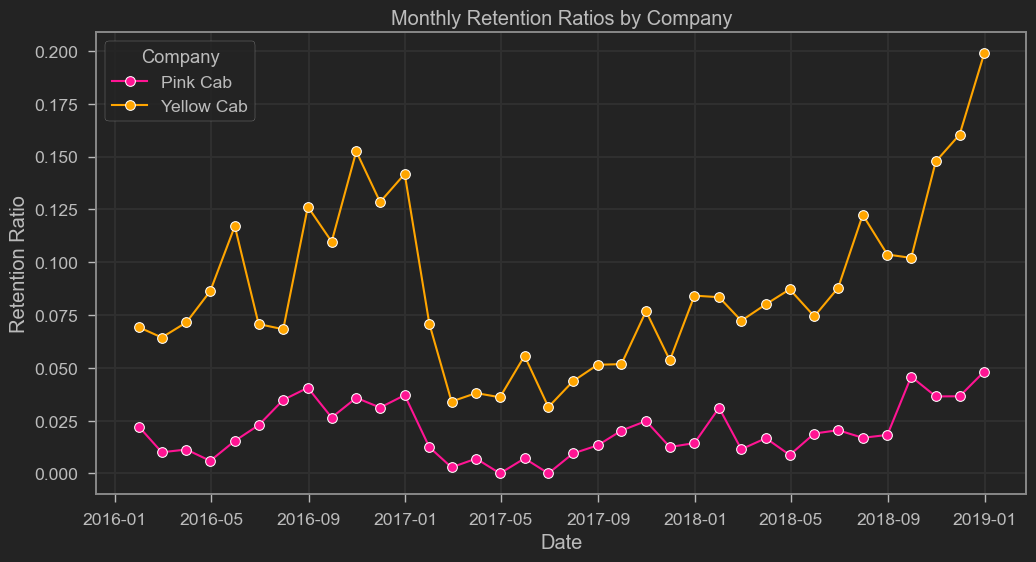

      Company Date of Travel  Retention RatioM
0    Pink Cab     2016-01-04              0.02
1  Yellow Cab     2016-01-04              0.07
2  Yellow Cab     2016-01-04              0.07
3  Yellow Cab     2016-01-04              0.07
4  Yellow Cab     2016-01-04              0.07


Transaction ID Date of Travel     Company            City  \
0            10000013     2016-01-04    Pink Cab      ATLANTA GA   
1            10000756     2016-01-04  Yellow Cab  LOS ANGELES CA   
2            10000771     2016-01-04  Yellow Cab  LOS ANGELES CA   
3            10000775     2016-01-04  Yellow Cab  LOS ANGELES CA   
4            10000777     2016-01-04  Yellow Cab  LOS ANGELES CA   
...               ...            ...         ...             ...   
78229        10434818     2018-12-31  Yellow Cab  LOS ANGELES CA   
78230        10434815     2018-12-31  Yellow Cab  LOS ANGELES CA   
78231        10434814     2018-12-31  Yellow Cab  LOS ANGELES CA   
78232        10434730     2018-12-31  Yellow Cab  LOS ANGELES CA   
78233        10434858     2018-12-31  Yellow Cab  LOS ANGELES CA   

       KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              9.04         125.20         97.63        28712         Cash   
1              7.07         185.88         88.23         8946         Card   
2              1.92          45.47         27.19         7835         Cash   
3             29.87         733.78        430.13         7777         Cash   
4             33.00         928.39        403.92         6624         Card   
...             ...            ...           ...          ...          ...   
78229         17.70         349.94        237.89         7777         Card   
78230          5.40         107.43         68.04         7892         Card   
78231         30.68         552.73        434.43         7673         Card   
78232         21.63         348.47        259.56         6398         Cash   
78233         14.28         307.04        185.07         7351         Cash   

       Gender  Age  Income (USD/Month)  Population     Users   lat     lon  \
0        Male   53               11242   814885.00  24701.00 33.75  -84.39   
1        Male   40               17996  1595037.00 144132.00 34.05 -118.24   
2        Male   52               12609  1595037.00 144132.00 34.05 -118.24   
3        Male   56                9132  1595037.00 144132.00 34.05 -118.24   
4        Male   37                8794  1595037.00 144132.00 34.05 -118.24   
...       ...  ...                 ...         ...       ...   ...     ...   
78229    Male   56                9132  1595037.00 144132.00 34.05 -118.24   
78230    Male   32               19824  1595037.00 144132.00 34.05 -118.24   
78231  Female   18                3787  1595037.00 144132.00 34.05 -118.24   
78232  Female   50               24762  1595037.00 144132.00 34.05 -118.24   
78233    Male   20               19051  1595037.00 144132.00 34.05 -118.24   

       Usage Percentage  UnRate  GasolinePrice  Profit  ProfitPerKM  \
0                  3.03    4.80           1.92   27.57         3.05   
1                  9.04    4.80           1.92   97.65        13.81   
2                  9.04    4.80           1.92   18.28         9.52   
3                  9.04    4.80           1.92  303.65        10.17   
4                  9.04    4.80           1.92  524.47        15.89   
...                 ...     ...            ...     ...          ...   
78229              9.04    3.90           2.16  112.05         6.33   
78230              9.04    3.90           2.16   39.39         7.29   
78231              9.04    3.90           2.16  118.30         3.86   
78232              9.04    3.90           2.16   88.91         4.11   
78233              9.04    3.90           2.16  121.97         8.54   

       PricePerKM  CostPerKM  Retention RatioM  
0           13.85      10.80              0.02  
1           26.29      12.48              0.07  
2           23.68      14.16              0.07  
3           24.57      14.40              0.07  
4           28.13      12.24              0.07  
...           ...        ...               ...  
78229       19.77      13.44              0.20  
78230       19.89      12.60              0.20  
78231       18.02     

In [239]:
####################### retention ratio ######################################
from prophet import Prophet

def calculate_customer_retention(df, freq):
    freq = freq
    # Ensure 'Date of Travel' is a datetime and set as index if not already
    df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])
    if 'Date of Travel' not in df.index.names:
        df.set_index('Date of Travel', inplace=True)

    # Group by 'Company' and 'Month', then aggregate Customer IDs as sets for uniqueness
    data = df.groupby(['Company', pd.Grouper(freq=freq)])['Customer ID'].agg(lambda x: set(x)).reset_index()

    # Shift the data to find last month's customers for retention calculation
    data['Previous Month Customers'] = data.groupby('Company')['Customer ID'].shift(1)

    # Function to calculate retention
    def calculate_retention(current_customers, previous_customers):
        if pd.isna(previous_customers):
            return np.nan
        current_set, previous_set = set(current_customers), set(previous_customers)
        return len(current_set.intersection(previous_set)) / len(previous_set) if previous_set else np.nan

    # Apply function to calculate retention ratio
    data['Retention Ratio'+freq] = data.apply(
        lambda row: calculate_retention(row['Customer ID'], row['Previous Month Customers']), axis=1
    )

    # Handle the initial missing values using Prophet forecasting only if the first value is NaN
    for company in data['Company'].unique():
        first_missing_index = data[(data['Company'] == company) & (data['Retention Ratio'+freq].isna())].index.min()
        if pd.notna(first_missing_index):
            # Prepare Prophet data excluding NaNs
            df_prophet = data[(data['Company'] == company) & (data['Retention Ratio'+freq].notna())]
            df_prophet = df_prophet[['Date of Travel', 'Retention Ratio'+freq]]
            df_prophet.rename(columns={'Date of Travel': 'ds', 'Retention Ratio'+freq: 'y'}, inplace=True)

            # Prophet forecasting
            m = Prophet(yearly_seasonality=True)
            m.fit(df_prophet)
            future = m.make_future_dataframe(periods=1, freq=freq, include_history=False)
            forecast = m.predict(future)

            # Use the first forecasted value to fill the gap
            forecasted_value = forecast.iloc[0]['yhat']
            data.loc[first_missing_index, 'Retention Ratio'+freq] = forecasted_value

    # Ensure the indices are reset if needed to avoid any issues with mismatched indices
    data.reset_index(drop=True, inplace=True)

    return data[['Company', 'Date of Travel', 'Retention Ratio'+freq]]

# Example usage
freq = 'M'
combo_data = pd.read_csv('./DataSets/combo_data.csv')
filled_rets = calculate_customer_retention(combo_data, freq)
print(filled_rets)


# Convert 'Date of Travel' to datetime if not already
#filled_retentions['Date of Travel'] = pd.to_datetime(monthly_retention['Date of Travel'])

# Define a custom color palette
palette = {'Pink Cab': 'deeppink', 'Yellow Cab': 'orange'}

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=filled_rets, x='Date of Travel', y='Retention Ratio'+freq, hue='Company', palette=palette, marker='o')

plt.title('Monthly Retention Ratios by Company')
plt.xlabel('Date')
plt.ylabel('Retention Ratio')
plt.grid(True)
plt.show()

combo_data = pd.read_csv('./DataSets/combo_data.csv', index_col=0)
combo_data['Date of Travel'] = pd.to_datetime(combo_data['Date of Travel'])
#combo_data.set_index('Date of Travel', inplace=True)
# Set month and year for merging purpose in both DataFrames
combo_data['Year'+freq] = combo_data['Date of Travel'].dt.to_period(freq)
filled_rets['Year'+freq] = filled_rets['Date of Travel'].dt.to_period(freq)

# Merge monthly_customers with combo_data based on 'Company' and 'YearMonth'
enhanced_combo_data = pd.merge(combo_data, filled_rets[['Company', 'Year'+freq, 'Retention Ratio'+freq]], 
                               on=['Company', 'Year'+freq], how='left')

# Check the resulting DataFrame
print(enhanced_combo_data[['Company', 'Date of Travel', 'Retention Ratio'+freq]].head())

# Optionally, you can drop the 'YearMonth' column if it's no longer needed
enhanced_combo_data.drop('Year'+freq, axis=1, inplace=True)

# Reset the index if it has been altered during the process
enhanced_combo_data.reset_index(drop=True, inplace=True)
enhanced_combo_data

In [240]:
#enhanced_combo_data.reset_index(drop=True, inplace=True)
enhanced_combo_data.to_csv('./DataSets/enhanced_combo_data.csv')
combo_data = pd.read_csv('./DataSets/enhanced_combo_data.csv', index_col=0)
combo_data

Transaction ID Date of Travel     Company            City  \
0            10000013     2016-01-04    Pink Cab      ATLANTA GA   
1            10000756     2016-01-04  Yellow Cab  LOS ANGELES CA   
2            10000771     2016-01-04  Yellow Cab  LOS ANGELES CA   
3            10000775     2016-01-04  Yellow Cab  LOS ANGELES CA   
4            10000777     2016-01-04  Yellow Cab  LOS ANGELES CA   
...               ...            ...         ...             ...   
78229        10434818     2018-12-31  Yellow Cab  LOS ANGELES CA   
78230        10434815     2018-12-31  Yellow Cab  LOS ANGELES CA   
78231        10434814     2018-12-31  Yellow Cab  LOS ANGELES CA   
78232        10434730     2018-12-31  Yellow Cab  LOS ANGELES CA   
78233        10434858     2018-12-31  Yellow Cab  LOS ANGELES CA   

       KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              9.04         125.20         97.63        28712         Cash   
1              7.07         185.88         88.23         8946         Card   
2              1.92          45.47         27.19         7835         Cash   
3             29.87         733.78        430.13         7777         Cash   
4             33.00         928.39        403.92         6624         Card   
...             ...            ...           ...          ...          ...   
78229         17.70         349.94        237.89         7777         Card   
78230          5.40         107.43         68.04         7892         Card   
78231         30.68         552.73        434.43         7673         Card   
78232         21.63         348.47        259.56         6398         Cash   
78233         14.28         307.04        185.07         7351         Cash   

       Gender  Age  Income (USD/Month)  Population     Users   lat     lon  \
0        Male   53               11242   814885.00  24701.00 33.75  -84.39   
1        Male   40               17996  1595037.00 144132.00 34.05 -118.24   
2        Male   52               12609  1595037.00 144132.00 34.05 -118.24   
3        Male   56                9132  1595037.00 144132.00 34.05 -118.24   
4        Male   37                8794  1595037.00 144132.00 34.05 -118.24   
...       ...  ...                 ...         ...       ...   ...     ...   
78229    Male   56                9132  1595037.00 144132.00 34.05 -118.24   
78230    Male   32               19824  1595037.00 144132.00 34.05 -118.24   
78231  Female   18                3787  1595037.00 144132.00 34.05 -118.24   
78232  Female   50               24762  1595037.00 144132.00 34.05 -118.24   
78233    Male   20               19051  1595037.00 144132.00 34.05 -118.24   

       Usage Percentage  UnRate  GasolinePrice  Profit  ProfitPerKM  \
0                  3.03    4.80           1.92   27.57         3.05   
1                  9.04    4.80           1.92   97.65        13.81   
2                  9.04    4.80           1.92   18.28         9.52   
3                  9.04    4.80           1.92  303.65        10.17   
4                  9.04    4.80           1.92  524.47        15.89   
...                 ...     ...            ...     ...          ...   
78229              9.04    3.90           2.16  112.05         6.33   
78230              9.04    3.90           2.16   39.39         7.29   
78231              9.04    3.90           2.16  118.30         3.86   
78232              9.04    3.90           2.16   88.91         4.11   
78233              9.04    3.90           2.16  121.97         8.54   

       PricePerKM  CostPerKM  Retention RatioM  
0           13.85      10.80              0.02  
1           26.29      12.48              0.07  
2           23.68      14.16              0.07  
3           24.57      14.40              0.07  
4           28.13      12.24              0.07  
...           ...        ...               ...  
78229       19.77      13.44              0.20  
78230       19.89      12.60              0.20  
78231       18.02     

21:06:19 - cmdstanpy - INFO - Chain [1] start processing
21:06:20 - cmdstanpy - INFO - Chain [1] done processing
21:06:20 - cmdstanpy - INFO - Chain [1] start processing
21:06:20 - cmdstanpy - INFO - Chain [1] done processing


       Company Date of Travel  Retention RatioQ
0     Pink Cab     2016-03-31              0.06
1     Pink Cab     2016-06-30              0.05
2     Pink Cab     2016-09-30              0.08
3     Pink Cab     2016-12-31              0.11
4     Pink Cab     2017-03-31              0.03
5     Pink Cab     2017-06-30              0.02
6     Pink Cab     2017-09-30              0.04
7     Pink Cab     2017-12-31              0.05
8     Pink Cab     2018-03-31              0.04
9     Pink Cab     2018-06-30              0.05
10    Pink Cab     2018-09-30              0.07
11    Pink Cab     2018-12-31              0.12
12  Yellow Cab     2016-03-31              0.29
13  Yellow Cab     2016-06-30              0.22
14  Yellow Cab     2016-09-30              0.25
15  Yellow Cab     2016-12-31              0.33
16  Yellow Cab     2017-03-31              0.12
17  Yellow Cab     2017-06-30              0.10
18  Yellow Cab     2017-09-30              0.13
19  Yellow Cab     2017-12-31           

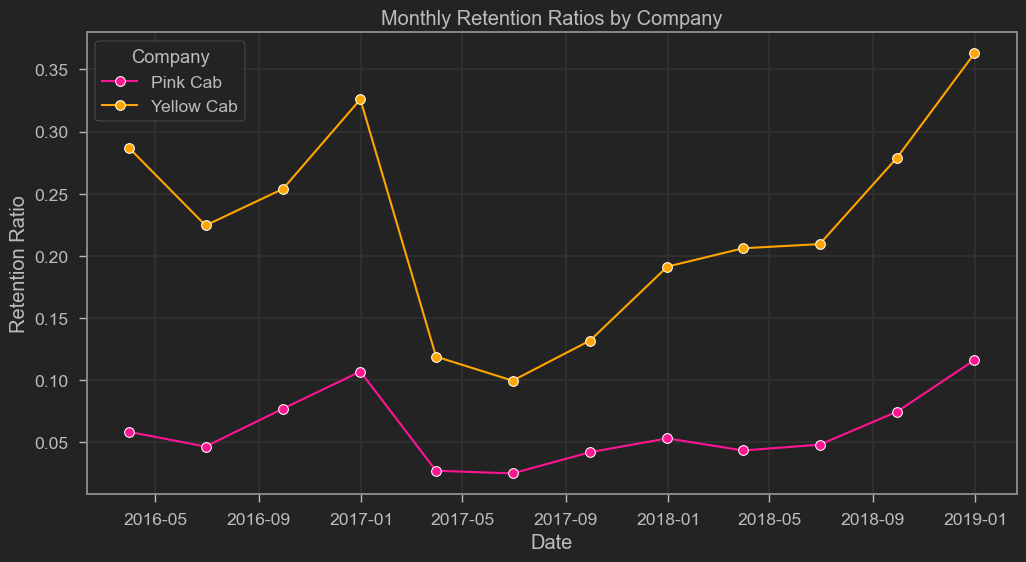

      Company Date of Travel  Retention RatioQ
0    Pink Cab     2016-01-04              0.06
1  Yellow Cab     2016-01-04              0.29
2  Yellow Cab     2016-01-04              0.29
3  Yellow Cab     2016-01-04              0.29
4  Yellow Cab     2016-01-04              0.29


Transaction ID Date of Travel     Company            City  \
0            10000013     2016-01-04    Pink Cab      ATLANTA GA   
1            10000756     2016-01-04  Yellow Cab  LOS ANGELES CA   
2            10000771     2016-01-04  Yellow Cab  LOS ANGELES CA   
3            10000775     2016-01-04  Yellow Cab  LOS ANGELES CA   
4            10000777     2016-01-04  Yellow Cab  LOS ANGELES CA   
...               ...            ...         ...             ...   
78229        10434818     2018-12-31  Yellow Cab  LOS ANGELES CA   
78230        10434815     2018-12-31  Yellow Cab  LOS ANGELES CA   
78231        10434814     2018-12-31  Yellow Cab  LOS ANGELES CA   
78232        10434730     2018-12-31  Yellow Cab  LOS ANGELES CA   
78233        10434858     2018-12-31  Yellow Cab  LOS ANGELES CA   

       KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              9.04         125.20         97.63        28712         Cash   
1              7.07         185.88         88.23         8946         Card   
2              1.92          45.47         27.19         7835         Cash   
3             29.87         733.78        430.13         7777         Cash   
4             33.00         928.39        403.92         6624         Card   
...             ...            ...           ...          ...          ...   
78229         17.70         349.94        237.89         7777         Card   
78230          5.40         107.43         68.04         7892         Card   
78231         30.68         552.73        434.43         7673         Card   
78232         21.63         348.47        259.56         6398         Cash   
78233         14.28         307.04        185.07         7351         Cash   

       Gender  Age  Income (USD/Month)  Population     Users   lat     lon  \
0        Male   53               11242   814885.00  24701.00 33.75  -84.39   
1        Male   40               17996  1595037.00 144132.00 34.05 -118.24   
2        Male   52               12609  1595037.00 144132.00 34.05 -118.24   
3        Male   56                9132  1595037.00 144132.00 34.05 -118.24   
4        Male   37                8794  1595037.00 144132.00 34.05 -118.24   
...       ...  ...                 ...         ...       ...   ...     ...   
78229    Male   56                9132  1595037.00 144132.00 34.05 -118.24   
78230    Male   32               19824  1595037.00 144132.00 34.05 -118.24   
78231  Female   18                3787  1595037.00 144132.00 34.05 -118.24   
78232  Female   50               24762  1595037.00 144132.00 34.05 -118.24   
78233    Male   20               19051  1595037.00 144132.00 34.05 -118.24   

       Usage Percentage  UnRate  GasolinePrice  Profit  ProfitPerKM  \
0                  3.03    4.80           1.92   27.57         3.05   
1                  9.04    4.80           1.92   97.65        13.81   
2                  9.04    4.80           1.92   18.28         9.52   
3                  9.04    4.80           1.92  303.65        10.17   
4                  9.04    4.80           1.92  524.47        15.89   
...                 ...     ...            ...     ...          ...   
78229              9.04    3.90           2.16  112.05         6.33   
78230              9.04    3.90           2.16   39.39         7.29   
78231              9.04    3.90           2.16  118.30         3.86   
78232              9.04    3.90           2.16   88.91         4.11   
78233              9.04    3.90           2.16  121.97         8.54   

       PricePerKM  CostPerKM  Retention RatioM  Retention RatioQ  
0           13.85      10.80              0.02              0.06  
1           26.29      12.48              0.07              0.29  
2           23.68      14.16              0.07              0.29  
3           24.57      14.40              0.07              0.29  
4           28.13      12.24              0.07              0.29  
...           ...        ...               ...               

In [242]:
# Example usage
freq = 'Q'
combo_data = pd.read_csv('./DataSets/enhanced_combo_data.csv', index_col=0)
filled_rets = calculate_customer_retention(combo_data, freq)
print(filled_rets)


# Convert 'Date of Travel' to datetime if not already
#filled_retentions['Date of Travel'] = pd.to_datetime(monthly_retention['Date of Travel'])

# Define a custom color palette
palette = {'Pink Cab': 'deeppink', 'Yellow Cab': 'orange'}

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=filled_rets, x='Date of Travel', y='Retention Ratio'+freq, hue='Company', palette=palette, marker='o')

plt.title('Monthly Retention Ratios by Company')
plt.xlabel('Date')
plt.ylabel('Retention Ratio')
plt.grid(True)
plt.show()

combo_data = pd.read_csv('./DataSets/enhanced_combo_data.csv', index_col=0)
combo_data['Date of Travel'] = pd.to_datetime(combo_data['Date of Travel'])
#combo_data.set_index('Date of Travel', inplace=True)
# Set month and year for merging purpose in both DataFrames
combo_data['Year'+freq] = combo_data['Date of Travel'].dt.to_period(freq)
filled_rets['Year'+freq] = filled_rets['Date of Travel'].dt.to_period(freq)

# Merge monthly_customers with combo_data based on 'Company' and 'YearMonth'
enhanced_combo_data = pd.merge(combo_data, filled_rets[['Company', 'Year'+freq, 'Retention Ratio'+freq]], 
                               on=['Company', 'Year'+freq], how='left')

# Check the resulting DataFrame
print(enhanced_combo_data[['Company', 'Date of Travel', 'Retention Ratio'+freq]].head())

# Optionally, you can drop the 'YearMonth' column if it's no longer needed
enhanced_combo_data.drop('Year'+freq, axis=1, inplace=True)

# Reset the index if it has been altered during the process
enhanced_combo_data.reset_index(drop=True, inplace=True)
enhanced_combo_data

In [243]:
enhanced_combo_data.to_csv('./DataSets/enhanced_combo_data.csv')
combo_data = pd.read_csv('./DataSets/enhanced_combo_data.csv', index_col=0)

21:08:24 - cmdstanpy - INFO - Chain [1] start processing
21:08:25 - cmdstanpy - INFO - Chain [1] done processing
21:08:25 - cmdstanpy - INFO - Chain [1] start processing
21:08:25 - cmdstanpy - INFO - Chain [1] done processing


      Company Date of Travel  Retention RatioY
0    Pink Cab     2016-12-31              0.38
1    Pink Cab     2017-12-31              0.13
2    Pink Cab     2018-12-31              0.25
3  Yellow Cab     2016-12-31              0.86
4  Yellow Cab     2017-12-31              0.36
5  Yellow Cab     2018-12-31              0.61


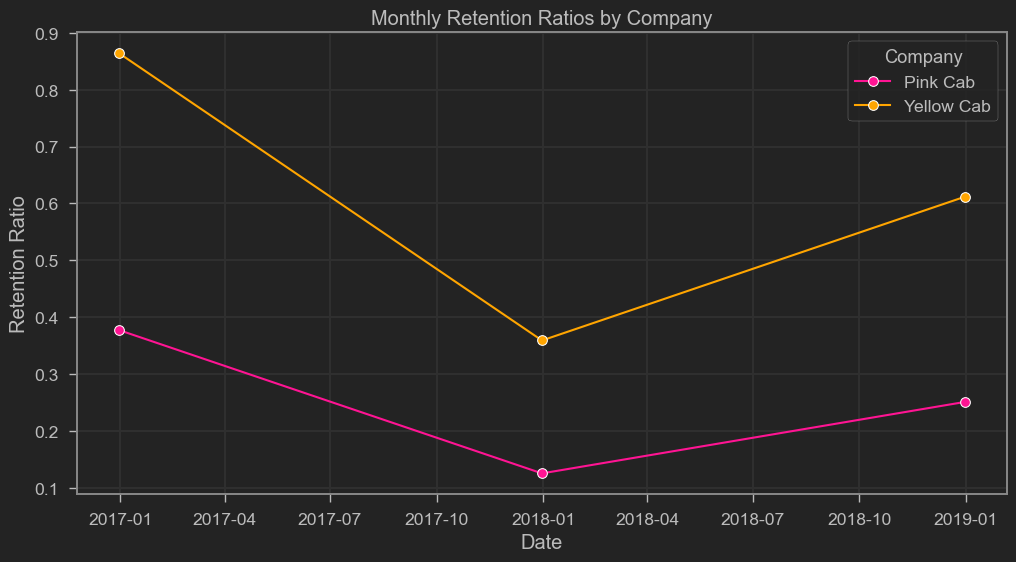

      Company Date of Travel  Retention RatioY
0    Pink Cab     2016-01-04              0.38
1  Yellow Cab     2016-01-04              0.86
2  Yellow Cab     2016-01-04              0.86
3  Yellow Cab     2016-01-04              0.86
4  Yellow Cab     2016-01-04              0.86


Transaction ID Date of Travel     Company            City  \
0            10000013     2016-01-04    Pink Cab      ATLANTA GA   
1            10000756     2016-01-04  Yellow Cab  LOS ANGELES CA   
2            10000771     2016-01-04  Yellow Cab  LOS ANGELES CA   
3            10000775     2016-01-04  Yellow Cab  LOS ANGELES CA   
4            10000777     2016-01-04  Yellow Cab  LOS ANGELES CA   
...               ...            ...         ...             ...   
78229        10434818     2018-12-31  Yellow Cab  LOS ANGELES CA   
78230        10434815     2018-12-31  Yellow Cab  LOS ANGELES CA   
78231        10434814     2018-12-31  Yellow Cab  LOS ANGELES CA   
78232        10434730     2018-12-31  Yellow Cab  LOS ANGELES CA   
78233        10434858     2018-12-31  Yellow Cab  LOS ANGELES CA   

       KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              9.04         125.20         97.63        28712         Cash   
1              7.07         185.88         88.23         8946         Card   
2              1.92          45.47         27.19         7835         Cash   
3             29.87         733.78        430.13         7777         Cash   
4             33.00         928.39        403.92         6624         Card   
...             ...            ...           ...          ...          ...   
78229         17.70         349.94        237.89         7777         Card   
78230          5.40         107.43         68.04         7892         Card   
78231         30.68         552.73        434.43         7673         Card   
78232         21.63         348.47        259.56         6398         Cash   
78233         14.28         307.04        185.07         7351         Cash   

       Gender  Age  Income (USD/Month)  Population     Users   lat     lon  \
0        Male   53               11242   814885.00  24701.00 33.75  -84.39   
1        Male   40               17996  1595037.00 144132.00 34.05 -118.24   
2        Male   52               12609  1595037.00 144132.00 34.05 -118.24   
3        Male   56                9132  1595037.00 144132.00 34.05 -118.24   
4        Male   37                8794  1595037.00 144132.00 34.05 -118.24   
...       ...  ...                 ...         ...       ...   ...     ...   
78229    Male   56                9132  1595037.00 144132.00 34.05 -118.24   
78230    Male   32               19824  1595037.00 144132.00 34.05 -118.24   
78231  Female   18                3787  1595037.00 144132.00 34.05 -118.24   
78232  Female   50               24762  1595037.00 144132.00 34.05 -118.24   
78233    Male   20               19051  1595037.00 144132.00 34.05 -118.24   

       Usage Percentage  UnRate  GasolinePrice  Profit  ProfitPerKM  \
0                  3.03    4.80           1.92   27.57         3.05   
1                  9.04    4.80           1.92   97.65        13.81   
2                  9.04    4.80           1.92   18.28         9.52   
3                  9.04    4.80           1.92  303.65        10.17   
4                  9.04    4.80           1.92  524.47        15.89   
...                 ...     ...            ...     ...          ...   
78229              9.04    3.90           2.16  112.05         6.33   
78230              9.04    3.90           2.16   39.39         7.29   
78231              9.04    3.90           2.16  118.30         3.86   
78232              9.04    3.90           2.16   88.91         4.11   
78233              9.04    3.90           2.16  121.97         8.54   

       PricePerKM  CostPerKM  Retention RatioM  Retention RatioQ  \
0           13.85      10.80              0.02              0.06   
1           26.29      12.48              0.07              0.29   
2           23.68      14.16              0.07              0.29   
3           24.57      14.40              0.07              0.29   
4           28.13      12.24              0.07              0.29   
...           ...        ...               ...         

In [244]:
# Example usage
freq = 'Y'
combo_data = pd.read_csv('./DataSets/enhanced_combo_data.csv', index_col=0)
filled_rets = calculate_customer_retention(combo_data, freq)
print(filled_rets)


# Convert 'Date of Travel' to datetime if not already
#filled_retentions['Date of Travel'] = pd.to_datetime(monthly_retention['Date of Travel'])

# Define a custom color palette
palette = {'Pink Cab': 'deeppink', 'Yellow Cab': 'orange'}

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=filled_rets, x='Date of Travel', y='Retention Ratio'+freq, hue='Company', palette=palette, marker='o')

plt.title('Monthly Retention Ratios by Company')
plt.xlabel('Date')
plt.ylabel('Retention Ratio')
plt.grid(True)
plt.show()

combo_data = pd.read_csv('./DataSets/enhanced_combo_data.csv', index_col=0)
combo_data['Date of Travel'] = pd.to_datetime(combo_data['Date of Travel'])
#combo_data.set_index('Date of Travel', inplace=True)
# Set month and year for merging purpose in both DataFrames
combo_data['Year'+freq] = combo_data['Date of Travel'].dt.to_period(freq)
filled_rets['Year'+freq] = filled_rets['Date of Travel'].dt.to_period(freq)

# Merge monthly_customers with combo_data based on 'Company' and 'YearMonth'
enhanced_combo_data = pd.merge(combo_data, filled_rets[['Company', 'Year'+freq, 'Retention Ratio'+freq]], 
                               on=['Company', 'Year'+freq], how='left')

# Check the resulting DataFrame
print(enhanced_combo_data[['Company', 'Date of Travel', 'Retention Ratio'+freq]].head())

# Optionally, you can drop the 'YearMonth' column if it's no longer needed
enhanced_combo_data.drop('Year'+freq, axis=1, inplace=True)

# Reset the index if it has been altered during the process
enhanced_combo_data.reset_index(drop=True, inplace=True)
enhanced_combo_data

We can observe that in any time the Yellow Cab outperforms the Pink Cab regarding retention retio. It means that the better company exhibits better market penetration, probably thanks to the better strategy.

### Hypothesis 2. Yellow Cab outstrips the Pink Cab in every aspect of the business.

In [281]:
enhanced_combo_data.to_csv('./DataSets/enhanced_combo_data.csv')
combo_data = pd.read_csv('./DataSets/enhanced_combo_data.csv', index_col=0)

In [247]:
features = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'Usage Percentage', 'UnRate', 'GasolinePrice', 'Profit', 'ProfitPerKM', 'PricePerKM', 'CostPerKM',\
            'Retention RatioM', 'Retention RatioQ', 'Retention RatioY']
pd.set_option('display.max_rows', None)
# Group data by company and calculate descriptive statistics
grouped_stats = combo_data.groupby('Company')[features].describe()

# # Transpose the level of the descriptive statistics, so that we have a multi-index 
# # with 'features' as the top level and statistics as the second level
grouped_stats = grouped_stats.transpose()#.swaplevel(0, 1)

# # Optionally, you could sort the index here if needed, for easier readability:
grouped_stats.sort_index(inplace=True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(grouped_stats)
# Reset the option to display the default number of rows
pd.reset_option('display.max_rows')
# # Now, if you want to compare specific statistics like the mean or standard deviation,
# # you can select them like this:
mean_comparison = grouped_stats.xs('mean', level=1)
print('')

sum_trips = combo_data.groupby(['Company'])['Transaction ID'].count()
# Calculate the total sum of KM travelled for each company
sum_km = combo_data.groupby(['Company'])['KM Travelled'].sum()

# Calculate the total sum of Users for each company
sum_users = combo_data.groupby('Company')['Customer ID'].nunique()

# Convert the series to DataFrames with company names as columns
sum_trips_df = sum_trips.to_frame().transpose()
sum_trips_df.index = ['SumTrips']
sum_km_df = sum_km.to_frame().transpose()
sum_km_df.index = ['SumKM']
sum_users_df = sum_users.to_frame().transpose()
sum_users_df.index = ['SumUniqeUsers']

# Concatenate the new rows to the mean_comparison DataFrame
comparison = pd.concat([mean_comparison, sum_trips_df, sum_km_df, sum_users_df])
print('')
print(comparison)

# Assuming the index of mean_comparison are features names, reset the index if you want the feature names as a column
#comparison.reset_index(inplace=True)

#pd.reset_option('display.float_format')
table_sum = pd.concat([sum_trips_df, sum_km_df, sum_users_df])
table_sum

Company                    Pink Cab  Yellow Cab
Age                25%        25.00       25.00
                   50%        33.00       33.00
                   75%        42.00       42.00
                   count   18253.00    59981.00
                   max        65.00       65.00
                   mean       35.48       35.31
                   min        18.00       18.00
                   std        12.61       12.55
Cost of Trip       25%       133.34      158.24
                   50%       244.82      295.24
                   75%       359.64      432.22
                   count   18253.00    59981.00
                   max       576.00      691.20
                   mean      247.75      297.76
                   min        19.40       22.80
                   std       134.59      162.47
CostPerKM          25%        10.50       12.60
                   50%        11.00       13.20
                   75%        11.50       13.80
                   count   18253.00    5

Company        Pink Cab  Yellow Cab
SumTrips       18253.00    59981.00
SumKM         411122.93  1353509.12
SumUniqeUsers  13248.00    22760.00

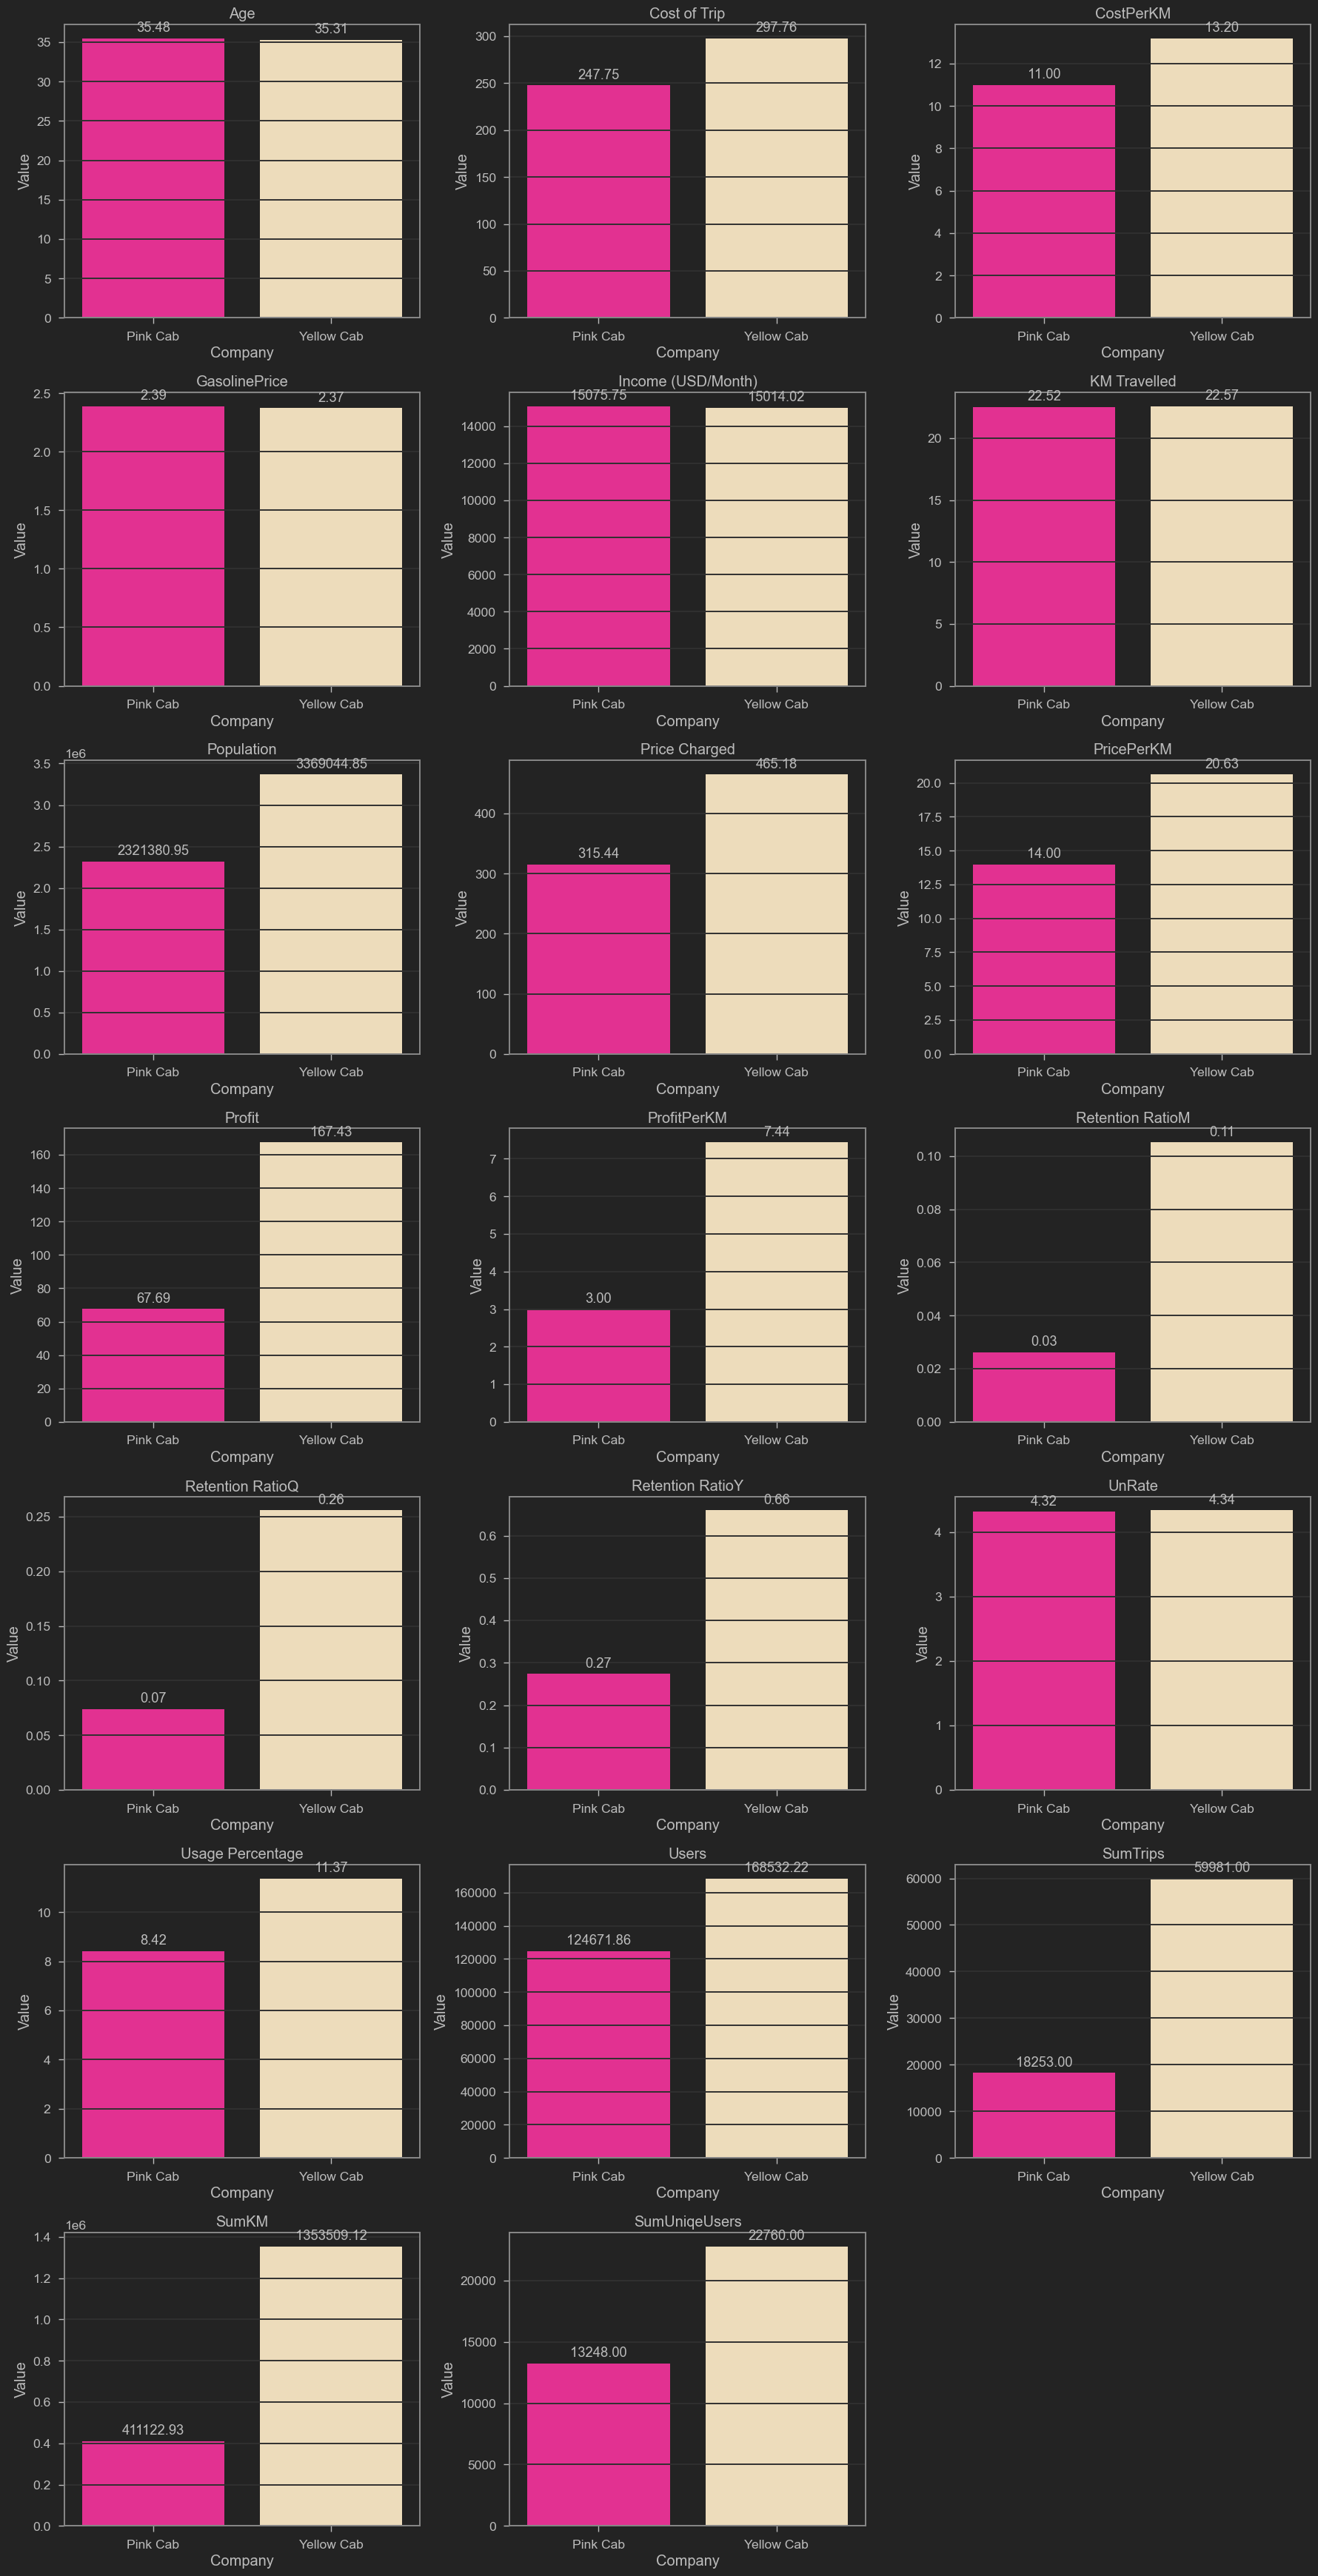

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure that 'comparison' is a DataFrame with features as the index.
# Assuming 'comparison' is a DataFrame obtained from previous operations and 
# contains the mean values for features.

# Add 'Feature' as a column if it's not already present
comparison['Feature'] = comparison.index

# Melt the dataframe to work with seaborn easily
data_melted = comparison.melt(id_vars='Feature', value_vars=['Pink Cab', 'Yellow Cab'],
                              var_name='Company', value_name='Value')

# Calculate the number of subplot rows needed
num_features = len(comparison)
num_rows = int(np.ceil(num_features / 3))  # 3 columns per row

# Create the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 5), sharex=False)
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Plot the bar plots
for i, feature in enumerate(comparison['Feature']):
    # Select the appropriate data for the current feature
    feature_data = data_melted[data_melted['Feature'] == feature]
    
    # Get the current axis
    ax = axes[i]
    
    # Create the bar plot
    sns.barplot(x='Company', y='Value', data=feature_data, ax=ax, palette=['deeppink', 'wheat'])
    ax.set_title(feature)
    
    # Annotate the bars with the actual values
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

# Hide any remaining subplots that aren't needed
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


To evaluate Hypothesis 2, which claims that "Yellow Cab outstrips the Pink Cab in every aspect of the business," we need to consider the provided statistics. Here's an analysis based on the given data:

- Age: The average age of customers for both companies is virtually identical. This suggests that both companies appeal to a similar demographic age-wise.
- Cost of Trip: Yellow Cab has a higher average cost per trip, which could indicate longer trips or higher pricing.
- CostPerKM: Yellow Cab also has a higher average cost per kilometer, suggesting higher operating costs or pricing strategies.
- GasolinePrice: Gasoline prices are comparable for both companies, indicating that fuel costs do not provide a competitive advantage to either company.
- Income (USD/Month): The average income of the customer base is nearly the same for both companies, suggesting they serve a similar economic demographic.
- KM Travelled: Average kilometers traveled per trip are almost the same, suggesting similar trip lengths for customers of both companies.
- Population: Yellow Cab operates in areas with a higher average population, which may contribute to its larger scale of operations.
- Price Charged: Yellow Cab charges more on average, which, combined with a higher cost, indicates that it operates on a higher pricing model.
- PricePerKM: Yellow Cab's higher price per kilometer could reflect higher pricing power or a premium service compared to Pink Cab.
- Profit: Yellow Cab makes a significantly higher average profit, indicating a stronger financial performance.
- ProfitPerKM: Similarly, Yellow Cab's profit per kilometer is more than double that of Pink Cab, suggesting more efficient or profitable operations.
- Retention Ratios: Yellow Cab has higher retention ratios monthly, quarterly, and yearly, indicating better customer retention and possibly greater customer satisfaction.
- UnRate: Unemployment rates affect disposable income and therefore can impact cab usage. The rates are similar, so this is not a differentiating factor.
- Usage Percentage: Yellow Cab has a higher usage percentage, which might reflect a higher market share or brand preference.
- Users: Yellow Cab serves more users on average, which supports its larger scale of operations.
- SumTrips, SumKM, SumUniqueUsers: Yellow Cab has more trips, higher total kilometers traveled, and more unique users, which all point to a larger scale of operations compared to Pink Cab.
  
The data supports the hypothesis that Yellow Cab outperforms Pink Cab in several key business aspects, particularly in profitability, pricing power, customer retention, and market share. However, both companies serve a similar age and income demographic, and the costs per kilometer are higher for Yellow Cab, indicating it may not outstrip Pink Cab in terms of operational efficiency.

In [111]:
# num_features = len(combo_data.columns)
# num_rows = int(np.ceil(num_features / 3))
# num_rows

8

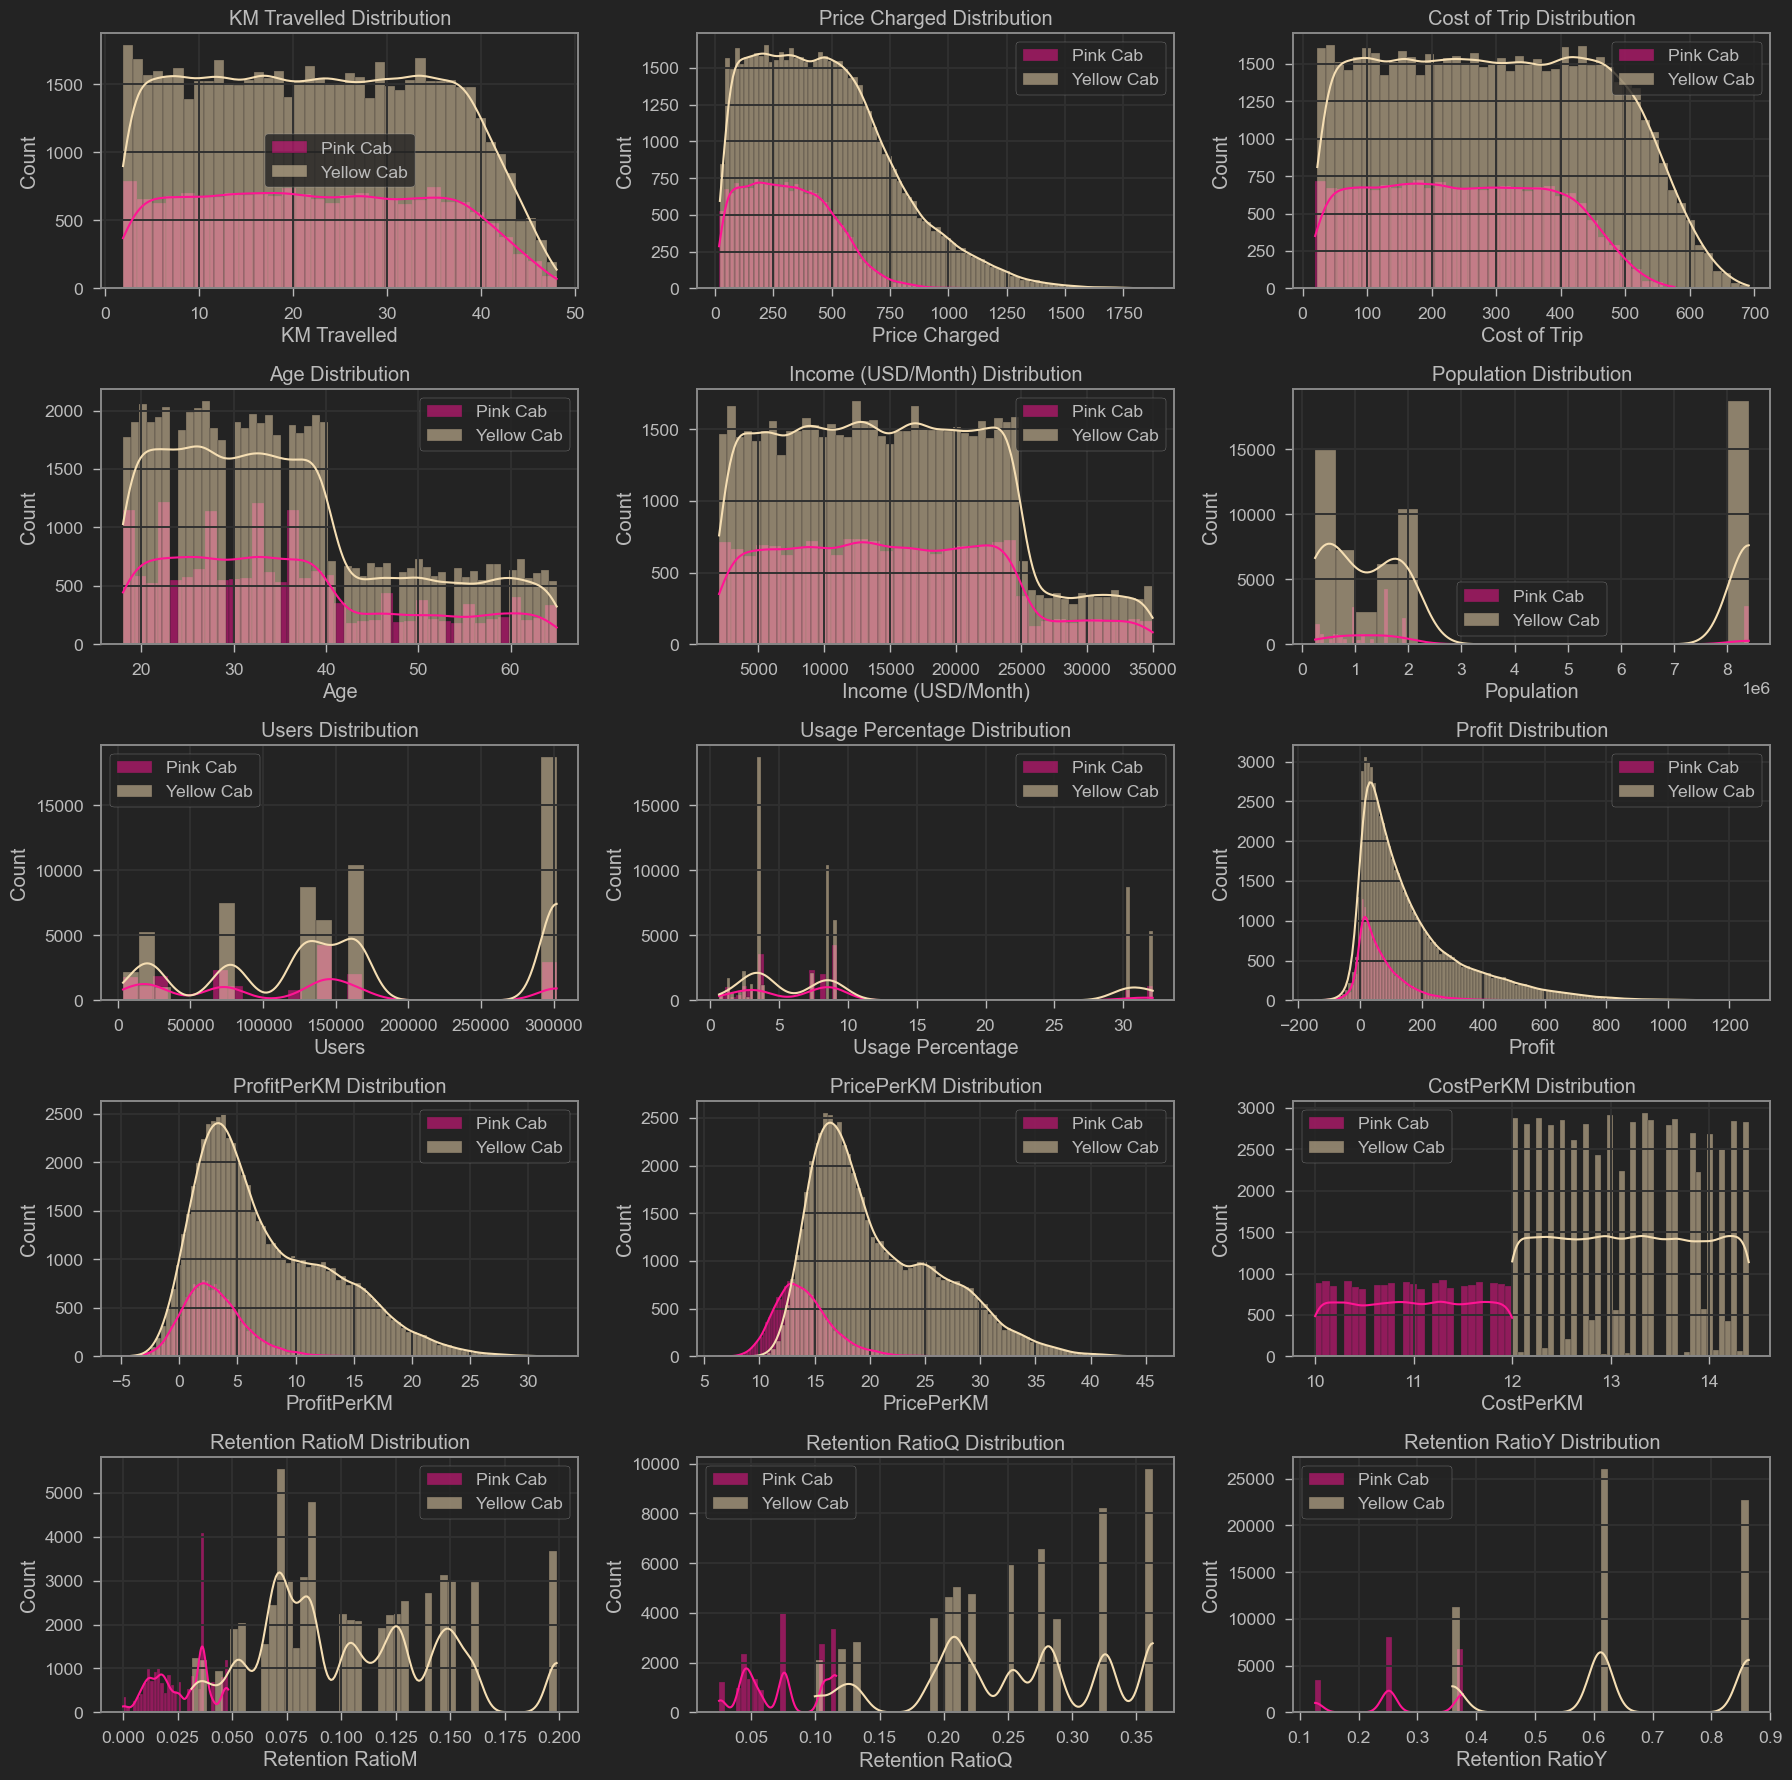

In [249]:
# Perform descriptive statistics grouped by company
grouped_stats = combo_data.groupby('Company').describe()

# Extract the features for comparison
features = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'Usage Percentage', 'Profit', 'ProfitPerKM', 'PricePerKM', 'CostPerKM', \
           'Retention RatioM', 'Retention RatioQ', 'Retention RatioY']

num_features = len(combo_data.columns)
num_rows = int(np.ceil(num_features / 3))
# Initialize the matplotlib figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 18))  # 3x3 grid

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over features and axes to plot the data
for i, feature in enumerate(features):
    # Overlay histograms for both companies for each feature
    sns.histplot(combo_data[combo_data['Company'] == 'Pink Cab'][feature], ax=axes[i], color="deeppink", kde=True, alpha=0.5, label='Pink Cab')
    sns.histplot(combo_data[combo_data['Company'] == 'Yellow Cab'][feature], ax=axes[i], color="wheat", kde=True, alpha=0.5, label='Yellow Cab')
    axes[i].set_title(f'{feature} Distribution')
    axes[i].legend()

# If the number of features is less than the number of subplots, hide the unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In the context of the last analysis, these distribution plots offer further insights into the operational and financial aspects of Pink Cab and Yellow Cab. Here's a brief commentary based on the visual data provided:

- KM Travelled Distribution: Both companies have similar distributions, indicating that the average trip length is comparable for both Pink and Yellow Cab.
- Price Charged Distribution: Yellow Cab tends to charge more for trips than Pink Cab, which is consistent with the data suggesting that Yellow Cab has higher profitability.
- Cost of Trip Distribution: Yellow Cab's costs are distributed over a wider range, indicating potentially higher operational costs, which align with the higher prices they charge.
- Age Distribution: Age distributions are very similar, suggesting both companies target a similar customer age demographic.
- Income (USD/Month) Distribution: Both companies serve customers across a wide income range, but Pink Cab seems to have a slight peak in the lower income bracket.
- Population Distribution: This plot highlights the potential market size in different cities, with Yellow Cab operating more in higher population areas, which might contribute to its larger scale.
- Users Distribution: Yellow Cab serves a significantly higher number of users, which aligns with its larger scale of operations as indicated in the hypothesis.
- Usage Percentage Distribution: Yellow Cab shows peaks at higher usage percentages, which could suggest a higher market share or more frequent usage among its customer base.
- Profit Distribution: The profit for Yellow Cab is distributed over a wider range with higher peaks, confirming its greater profitability.
- ProfitPerKM Distribution: Yellow Cab also shows a wider distribution with higher values for profit per kilometer, suggesting more efficient profitability per distance traveled.
- Retention RatioM/Q/Y Distribution: Yellow Cab shows higher retention rates across the board, supporting the hypothesis that it maintains better customer loyalty over different time frames.

The distribution plots generally support Hypothesis 2, showing that Yellow Cab has a larger scale of operations, charges higher fares, and has better customer retention, leading to higher overall profitability. However, it also suggests that Yellow Cab might have higher operational costs. The decision to invest should take into account these aspects as well as external market conditions, future growth potential, and strategic business models of both companies.

### Hypthesis 3

The degree of market penetration and the effectiveness of pricing strategies are the primary drivers of profitability differences between Pink Cab and Yellow Cab, with Yellow Cab's optimized pricing and stronger market penetration leading to its higher profitability.

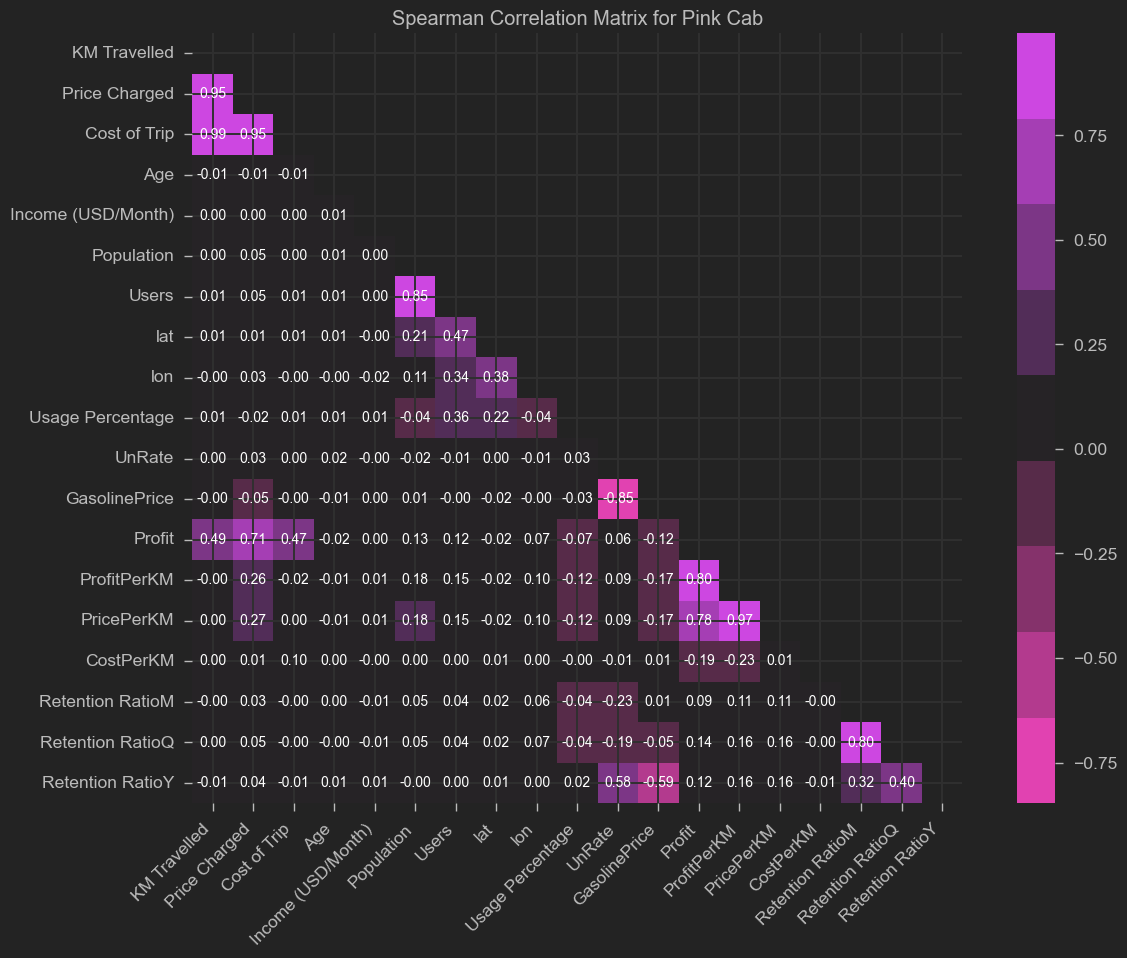

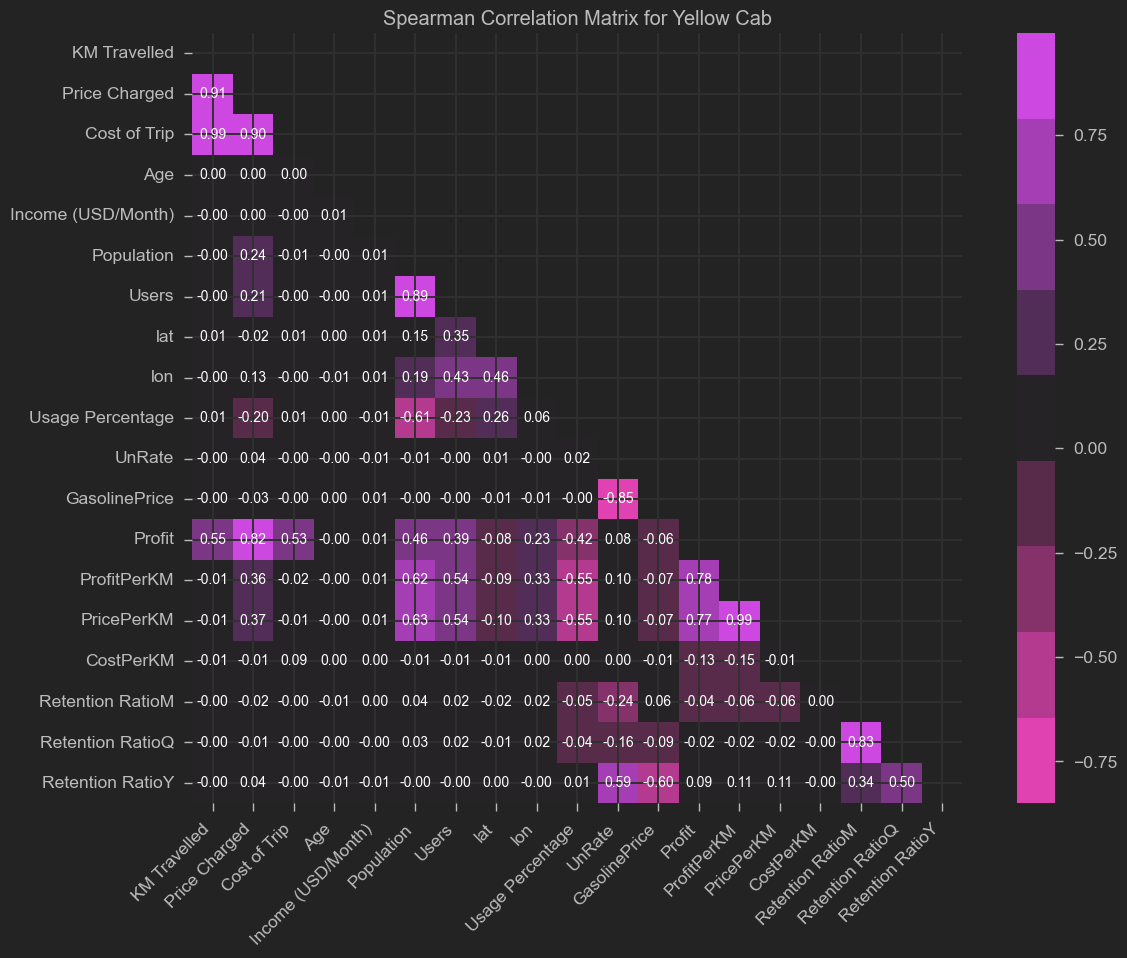

Pink Cab High Correlation Pairs:
           Feature1          Feature2  Correlation
0      KM Travelled     Price Charged         0.95
1      KM Travelled      Cost of Trip         0.99
2     Price Charged      Cost of Trip         0.95
3     Price Charged            Profit         0.71
4        Population             Users         0.85
5            UnRate     GasolinePrice        -0.85
6            Profit       ProfitPerKM         0.80
7            Profit        PricePerKM         0.78
8       ProfitPerKM        PricePerKM         0.97
9  Retention RatioM  Retention RatioQ         0.80

Yellow Cab High Correlation Pairs:
            Feature1          Feature2  Correlation
0       KM Travelled     Price Charged         0.91
1       KM Travelled      Cost of Trip         0.99
2      Price Charged      Cost of Trip         0.90
3      Price Charged            Profit         0.82
4         Population             Users         0.89
5         Population  Usage Percentage        -0.61
6     

In [256]:
# Drop 'Transaction ID' and 'Customer ID' columns
combo_data_n = combo_data.drop({'Transaction ID', 'Customer ID'}, axis=1)

# Separate the data for Pink Cab and Yellow Cab
pink_cab_data = combo_data_n[combo_data_n['Company'] == 'Pink Cab']
yellow_cab_data = combo_data_n[combo_data_n['Company'] == 'Yellow Cab']

# Select numerical features and calculate the Spearman rank correlation matrix for Pink Cab
numerical_features_pink = pink_cab_data.select_dtypes(include=[float, int])
spearman_corr_pink = numerical_features_pink.corr(method='spearman')

# Select numerical features and calculate the Spearman rank correlation matrix for Yellow Cab
numerical_features_yellow = yellow_cab_data.select_dtypes(include=[float, int])
spearman_corr_yellow = numerical_features_yellow.corr(method='spearman')

# Create a mask for the upper triangle
mask_pink = np.triu(np.ones_like(spearman_corr_pink, dtype=bool))
mask_yellow = np.triu(np.ones_like(spearman_corr_yellow, dtype=bool))


# Define a function to create a heatmap
def create_heatmap(corr_matrix, mask, title):
    plt.figure(figsize=(14, 10))
    cmap = sns.diverging_palette(330, 300, s=80, l=55, n=9, center="dark")
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap=cmap, square=True, annot_kws={"size": 10})
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

# Create the heatmap for Pink Cab
create_heatmap(spearman_corr_pink, mask_pink, 'Spearman Correlation Matrix for Pink Cab')

# Create the heatmap for Yellow Cab
create_heatmap(spearman_corr_yellow, mask_yellow, 'Spearman Correlation Matrix for Yellow Cab')

# Function to extract high-correlation pairs
def high_corr_pairs(corr_matrix):
    # Mask to extract upper triangle without diagonal (k=1)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    # Extract the upper triangle of the dataframe into a series with MultiIndex
    corr_series = corr_matrix.where(mask).stack()
    # Filter out pairs with absolute correlation >= 0.40
    high_corr_pairs = corr_series[abs(corr_series) >= 0.60].reset_index()
    high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
    return high_corr_pairs

# Generate tables of high-correlation feature pairs
pink_high_corr_pairs = high_corr_pairs(spearman_corr_pink)
yellow_high_corr_pairs = high_corr_pairs(spearman_corr_yellow)

# Display the tables
print("Pink Cab High Correlation Pairs:")
print(pink_high_corr_pairs)
print("\nYellow Cab High Correlation Pairs:")
print(yellow_high_corr_pairs)

### Analysis Based on Hypothesis 1:

#### Pink Cab Analysis:

- The robust correlations for Pink Cab indicate effective cost management as seen by the strong relationship between 'KM Travelled', 'Price Charged', and 'Cost of Trip'. However, the profitability per trip ('ProfitPerKM') and the profit efficiency ('PricePerKM') have room for improvement to optimize revenue from these trips.
- The pricing strategy of Pink Cab, while successful to a degree, shows potential for better alignment with profitability. The moderate correlation between 'Price Charged' and 'Profit' suggests that adjustments in pricing could lead to higher profitability.
- Pink Cab's good market penetration is reflected in the strong correlation between 'Population' and 'Users', yet this has not translated into a proportional increase in profitability, pointing to possible operational inefficiencies or missed opportunities in pricing strategy.

#### Yellow Cab Analysis:

- Yellow Cab displays a similar pattern of cost management effectiveness, with 'KM Travelled' strongly influencing 'Price Charged' and 'Cost of Trip'. Moreover, the stronger correlation of these variables with 'Profit' signifies a more refined pricing strategy that capitalizes on longer trips.
- The higher correlation between 'Population' and 'Users' compared to Pink Cab suggests more efficient market penetration. Yet, the moderate negative correlation between 'Population' and 'Usage Percentage' may indicate that Yellow Cab’s service usage does not grow as fast as the population size, signifying possible market saturation or competition in larger cities.
- The strong positive correlations between 'Population' and profitability metrics ('ProfitPerKM', 'PricePerKM') highlight Yellow Cab's ability to maximize profit in densely populated areas, likely due to a strategic approach to pricing and service distribution.

#### Profitability Comparison:

- The slightly better correlation between 'Price Charged' and 'Profit' for Yellow Cab is indicative of a more mature pricing strategy. This is a likely contributor to Yellow Cab's higher profitability and could justify a higher investment cost if it translates into superior ROI.
- The alignment between Yellow Cab’s profitability metrics and population size underscores its success in leveraging densely populated markets to achieve higher profits, an area where Pink Cab could potentially increase focus and resources.

#### Insights for Investment Decision:

- Yellow Cab’s pricing and market penetration strategies have provided it with a profitability edge over Pink Cab. Given these findings, it seems plausible that Yellow Cab could offer a higher ROI, justifying its higher investment price.
- Pink Cab may require strategic revisions, particularly in pricing optimization and maximizing market penetration efficiency, to enhance profitability. Investments in Pink Cab might focus on these areas for long-term growth, which could eventually yield a higher ROI.
- Both companies are similarly impacted by external economic factors; thus, internal strategic adjustments are pivotal in distinguishing their profitability and investment potential.

In summary, aligning with Hypothesis 1, the analysis suggests that Yellow Cab’s optimized pricing strategies and effective market penetration are the main contributors to its higher profitability. If these trends continue, Yellow Cab is likely to provide a higher ROI, despite its higher investment cost. For Pink Cab, strategic improvements in these areas could enhance profitability and investment appeal in the long term.

### Hypothesis 2. 
Yellow Cab has higher higher number of unique users, more trips and in general higher coverage  than the Pink Cab especially in largest cities. Is there a correlation between the size of the city and geographical location and other variables relevant for business?

1. Let's check weather City size affects the number of transactions. To do it we will use tests Person's rank correlations.

In [252]:
from scipy.stats import pearsonr

# Set a seed for reproducibility
np.random.seed(100)

# Define a function to perform the permutation test
def permutation_test(data1, data2, n_permutations=1000):
    """
    Perform a permutation test to evaluate the correlation between two data series.
    
    Parameters:
    - data1: First pandas Series including its name.
    - data2: Second pandas Series including its name.
    - n_permutations: Number of permutations to perform.
    
    Returns:
    - Observed correlation and p-value, and prints the correlation result.
    """
    # Extract names from Series
    feature1_name = data1.name if data1.name else 'Feature 1'
    feature2_name = data2.name if data2.name else 'Feature 2'

    observed_corr, _ = pearsonr(data1, data2)
    permuted_corrs = []
    
    for _ in range(n_permutations):
        shuffled_data = np.random.permutation(data2)
        permuted_corr, _ = pearsonr(data1, shuffled_data)
        permuted_corrs.append(permuted_corr)
    
    p_value = np.mean(np.abs(permuted_corrs) >= np.abs(observed_corr))
    
    # Output the results in a formatted string
    print(f"Correlation between {feature1_name} and {feature2_name} is: {observed_corr:.3f} with a p-value of: {p_value:.4f}")
    return observed_corr, p_value



# Group by 'City' and 'Company' and count the transactions
city_company_group = combo_data.groupby(['City', 'Company']).size().reset_index(name='Transaction Count')
# Merge the grouped data with the population for each city
# If the population is not included, you will need to add it or join with another dataset.
city_population = combo_data[['City', 'Population']].drop_duplicates()
merged_data = city_company_group.merge(city_population, on='City')
# Separate the data for Pink Cab and Yellow Cab
pink_cab_data = merged_data[merged_data['Company'] == 'Pink Cab']
yellow_cab_data = merged_data[merged_data['Company'] == 'Yellow Cab']

# Perform the permutation test for Pink Cab
corr_pink, p_value_pink = permutation_test(pink_cab_data['Population'], pink_cab_data['Transaction Count'])
# Perform the permutation test for Yellow Cab
corr_yellow, p_value_yellow = permutation_test(yellow_cab_data['Population'], yellow_cab_data['Transaction Count'])
#corr_pink, p_value_pink, corr_yellow, p_value_yellow


Correlation between Population and Transaction Count is: 0.534 with a p-value of: 0.0470
Correlation between Population and Transaction Count is: 0.811 with a p-value of: 0.0050


In [26]:
city_company_profit = combo_data.groupby(['City', 'Company'])['ProfitPerKM'].mean().reset_index(name='Mean ProfitPerKM')
merged_data = city_company_profit.merge(city_population, on='City')
pink_cab_data = merged_data[merged_data['Company'] == 'Pink Cab']
yellow_cab_data = merged_data[merged_data['Company'] == 'Yellow Cab']
corr_pink, p_value_pink = permutation_test(pink_cab_data['Population'], pink_cab_data['Mean ProfitPerKM'])
corr_yellow, p_value_yellow = permutation_test(yellow_cab_data['Population'], yellow_cab_data['Mean ProfitPerKM'])

Correlation between Population and Mean ProfitPerKM is: 0.523 with a p-value of: 0.0230
Correlation between Population and Mean ProfitPerKM is: 0.751 with a p-value of: 0.0010


From the above general tests, we deduce that the Yellow Cab seems to benefit from the growing the size of the city both in terms of number of rides and profit per km, wheres Pink Cab does not.

2. Let's divide cities according to the size into < 1,000,000 referred as to 'small' and remaining as to 'large' and inspect that aggregated size impact.

In [27]:
def perform_permutation_tests(df, col1, col2, population_threshold=1000000, n_permutations=1000):
    """
    Perform permutation tests on specified variable grouped by city size and company.
    
    Parameters:
    - df: DataFrame containing the data.
    - col1: First column (series) to test (typically 'Population').
    - col2: Second column (series) to test (variable of interest).
    - population_threshold: Threshold to define 'Small' and 'Large' cities.
    - n_permutations: Number of permutations to perform.
    """
    # Create a new DataFrame for manipulation
    data = df[[col1.name, col2.name, 'City', 'Company']].copy()
    data['Population Category'] = data[col1.name].apply(lambda x: 'Small' if x < population_threshold else 'Large')

    # Group by 'City', 'Company', and 'Population Category', then calculate the mean of col2
    grouped_data = data.groupby(['City', 'Company', 'Population Category']).agg(
        {col2.name: 'mean', col1.name: 'first'}).reset_index()
    grouped_data.rename(columns={col2.name: f'Mean {col2.name}'}, inplace=True)

    # Perform permutation tests
    results = {}
    for (company, size), group in grouped_data.groupby(['Company', 'Population Category']):
        key = f"{company}, {size}"
        if len(group) < 2:
            print(f"Not enough data for {key}")
            continue
        observed_corr, _ = pearsonr(group[col1.name], group[f'Mean {col2.name}'])
        permuted_corrs = [pearsonr(np.random.permutation(group[col1.name]), group[f'Mean {col2.name}'])[0] for _ in range(n_permutations)]
        p_value = np.mean(np.abs(permuted_corrs) >= np.abs(observed_corr))
        results[key] = (observed_corr, p_value)

    # Output results
    for key, (corr, p_value) in results.items():
        print(f"{key} - Correlation between {col1.name} and {col2.name}: {corr:.3f}, P-Value: {p_value:.4f}")

# Example usage:
# Assuming 'combo_data' is pre-loaded DataFrame with necessary columns.
perform_permutation_tests(combo_data, combo_data['Population'], combo_data['Users'])
print('')
perform_permutation_tests(combo_data, combo_data['Population'], combo_data['ProfitPerKM'])


Pink Cab, Large - Correlation between Population and Users: 0.870, P-Value: 0.0080
Pink Cab, Small - Correlation between Population and Users: -0.292, P-Value: 0.3370
Yellow Cab, Large - Correlation between Population and Users: 0.870, P-Value: 0.0040
Yellow Cab, Small - Correlation between Population and Users: -0.292, P-Value: 0.3510

Pink Cab, Large - Correlation between Population and ProfitPerKM: 0.598, P-Value: 0.3410
Pink Cab, Small - Correlation between Population and ProfitPerKM: -0.011, P-Value: 0.9620
Yellow Cab, Large - Correlation between Population and ProfitPerKM: 0.784, P-Value: 0.1490
Yellow Cab, Small - Correlation between Population and ProfitPerKM: 0.704, P-Value: 0.0050


We see that indeed both companies benfit a higher number of users in larger cities. Regarding the profitability, it is only statistically obvious for the Yellow Cab. 

3. Now we will investigate wether the geographical location is important. Here we will divide our locations into the East and the West.

In [61]:
def perform_permutation_tests(data, variable, longitude_divider=-110, n_permutations=1000):
    """
    Perform permutation tests on specified variable grouped by company, and East or West of a defined longitude,
    without dividing by city population size.
    
    Parameters:
    - data: DataFrame containing the data.
    - variable: The name of the column to test against 'lat' for correlation.
    - longitude_divider: Longitude to divide the dataset into East and West.
    - n_permutations: Number of permutations to perform in the test.
    """
    # Define East or West based on the longitude divider
    data['Side'] = data['lon'].apply(lambda x: 'East' if x > longitude_divider else 'West')

    # Group by 'City', 'Company', 'Side', then calculate the mean or count of the specified variable
    if variable == 'Transaction Count':
        city_company_side_group = data.groupby(['City', 'Company', 'Side']).size().reset_index(name=variable)
    else:
        city_company_side_group = data.groupby(['City', 'Company', 'Side'])[variable].mean().reset_index(name=f'Mean {variable}')

    # Merge the grouped data with the mean latitude and longitude for each city
    city_lat_lon_side = data.groupby(['City', 'Side'])[['lat', 'lon']].mean().reset_index()
    merged_data = city_company_side_group.merge(city_lat_lon_side, on=['City', 'Side'])

    # Separate data by company and East/West side
    data_segments = {}
    companies = ['Pink Cab', 'Yellow Cab']
    sides = ['East', 'West']
    for company in companies:
        for side in sides:
            key = (company, side)
            segment = merged_data[(merged_data['Company'] == company) & (merged_data['Side'] == side)]
            data_segments[key] = segment
            if segment.empty:
                print(f"No data for {key}")

    # Perform permutation tests
    results = {}
    for key, segment in data_segments.items():
        if not segment.empty:
            column_to_test = variable if variable == 'Transaction Count' else f'Mean {variable}'
            observed_corr, _ = pearsonr(segment['lat'], segment[column_to_test])
            permuted_corrs = [pearsonr(np.random.permutation(segment['lat']), segment[column_to_test])[0] for _ in range(n_permutations)]
            p_value = np.mean(np.abs(permuted_corrs) >= np.abs(observed_corr))
            results[key] = (observed_corr, p_value)
        else:
            print(f"Not enough data for {key} to perform correlation test.")

    # Output results
    for key, (corr, p_value) in results.items():
        print(f"{key} - Correlation between 'lat' and '{column_to_test}': {corr:.3f}, P-Value: {p_value:.4f}")

perform_permutation_tests(combo_data, 'Users')
print('')
perform_permutation_tests(combo_data, 'Transaction Count')
print('')
perform_permutation_tests(combo_data, 'ProfitPerKM')

('Pink Cab', 'East') - Correlation between 'lat' and 'Mean Users': 0.489, P-Value: 0.1280
('Pink Cab', 'West') - Correlation between 'lat' and 'Mean Users': -0.172, P-Value: 0.6510
('Yellow Cab', 'East') - Correlation between 'lat' and 'Mean Users': 0.489, P-Value: 0.1190
('Yellow Cab', 'West') - Correlation between 'lat' and 'Mean Users': -0.172, P-Value: 0.6620

('Pink Cab', 'East') - Correlation between 'lat' and 'Transaction Count': 0.482, P-Value: 0.1200
('Pink Cab', 'West') - Correlation between 'lat' and 'Transaction Count': -0.204, P-Value: 0.6650
('Yellow Cab', 'East') - Correlation between 'lat' and 'Transaction Count': 0.503, P-Value: 0.1030
('Yellow Cab', 'West') - Correlation between 'lat' and 'Transaction Count': -0.116, P-Value: 0.7390

('Pink Cab', 'East') - Correlation between 'lat' and 'Mean ProfitPerKM': -0.268, P-Value: 0.4130
('Pink Cab', 'West') - Correlation between 'lat' and 'Mean ProfitPerKM': -0.416, P-Value: 0.3370
('Yellow Cab', 'East') - Correlation between

Geographical division between the East & the West seems to be statistically irrelevant. There are different factors worth to consider.

In [ ]:
4. Now we will investigate wether the geographical location is important. Here we will divide our locations into the costan and non coastal.

In [106]:
coastal_cities = [
    "NEW YORK NY", "LOS ANGELES CA", "MIAMI FL", "SILICON VALLEY", "ORANGE COUNTY",
    "WASHINGTON DC", "SAN DIEGO CA", "SEATTLE WA", "SAN FRANCISCO CA", "BOSTON MA"
]

non_coastal_cities = [
    "CHICAGO IL", "PHOENIX AZ", "DALLAS TX", "ATLANTA GA", "DENVER CO",
    "AUSTIN TX", "TUCSON AZ", "SACRAMENTO CA", "PITTSBURGH PA", "NASHVILLE TN"
]
def perform_permutation_tests(data, var1, variable, coastal_cities, n_permutations=1000):
    data['City Type'] = data['City'].apply(lambda x: 'Coastal' if x in coastal_cities else 'Non-Coastal')
    city_company_group = data.groupby(['City', 'Company', 'City Type'])[variable].mean().reset_index(name=f'Mean {variable}')
    city_lat_lon = data.groupby(['City', 'City Type'])[[var1]].mean().reset_index()
    merged_data = city_company_group.merge(city_lat_lon, on=['City', 'City Type'])
    
    data_segments = {}
    for company in ['Pink Cab', 'Yellow Cab']:
        for city_type in ['Coastal', 'Non-Coastal']:
            key = (company, city_type)
            segment = merged_data[(merged_data['Company'] == company) & (merged_data['City Type'] == city_type)]
            data_segments[key] = segment
            if segment.empty:
                print(f"No data for {key}")
            else:
                print(f"Columns in {key} segment: {segment.columns.tolist()}")  # Check what columns are present

    results = {}
    for key, segment in data_segments.items():
        if not segment.empty:
            if f'Mean {variable}' in segment.columns:
                print(f"Data in {key} for correlation: ", segment[[f'Mean {variable}', var1]])
                observed_corr, _ = pearsonr(segment[var1], segment[f'Mean {variable}'])
                permuted_corrs = [pearsonr(np.random.permutation(segment[var1]), segment[f'Mean {variable}'])[0] for _ in range(n_permutations)]
                p_value = np.mean(np.abs(permuted_corrs) >= np.abs(observed_corr))
                results[key] = (observed_corr, p_value)
            else:
                print(f"{f'Mean {variable}'} column is missing in the segment for {key}")
        else:
            print(f"Not enough data for {key} to perform correlation test.")

    for key, (corr, p_value) in results.items():
        if key in results:
            print(f"{key} - Correlation between {var1} and '{f' {variable}'}': {corr:.3f}, P-Value: {p_value:.4f}")


# Assuming 'combo_data' is properly loaded with the required columns
# coastal_cities = ["Los Angeles CA", "Miami FL", "New York NY", ...]
perform_permutation_tests(combo_data, 'Population', 'ProfitPerKM', coastal_cities)
perform_permutation_tests(combo_data, 'Population', 'Users', coastal_cities)
perform_permutation_tests(combo_data, 'Population', 'PricePerKM', coastal_cities)


Columns in ('Pink Cab', 'Coastal') segment: ['City', 'Company', 'City Type', 'Mean ProfitPerKM', 'Population']
Columns in ('Pink Cab', 'Non-Coastal') segment: ['City', 'Company', 'City Type', 'Mean ProfitPerKM', 'Population']
Columns in ('Yellow Cab', 'Coastal') segment: ['City', 'Company', 'City Type', 'Mean ProfitPerKM', 'Population']
Columns in ('Yellow Cab', 'Non-Coastal') segment: ['City', 'Company', 'City Type', 'Mean ProfitPerKM', 'Population']
Data in ('Pink Cab', 'Coastal') for correlation:      Mean ProfitPerKM  Population
4               2.60   248968.00
12              2.73  1595037.00
14              3.72  1339155.00
18              5.01  8405837.00
20              3.17  1030185.00
28              2.80   959307.00
30              2.13   671238.00
32              4.21  1177609.00
36              2.58   418859.00
Data in ('Pink Cab', 'Non-Coastal') for correlation:      Mean ProfitPerKM  Population
0               2.89   814885.00
2               3.88   698371.00
6          

From the above results, we can see that is better to have a cab business in coastal cities, namely there is a strong correlation between ptofitability and whether the localization is at the seaside or not. However, this relation is even stronger for the Yellow Cab indicating that this company is a an examle of the more reliable business. 

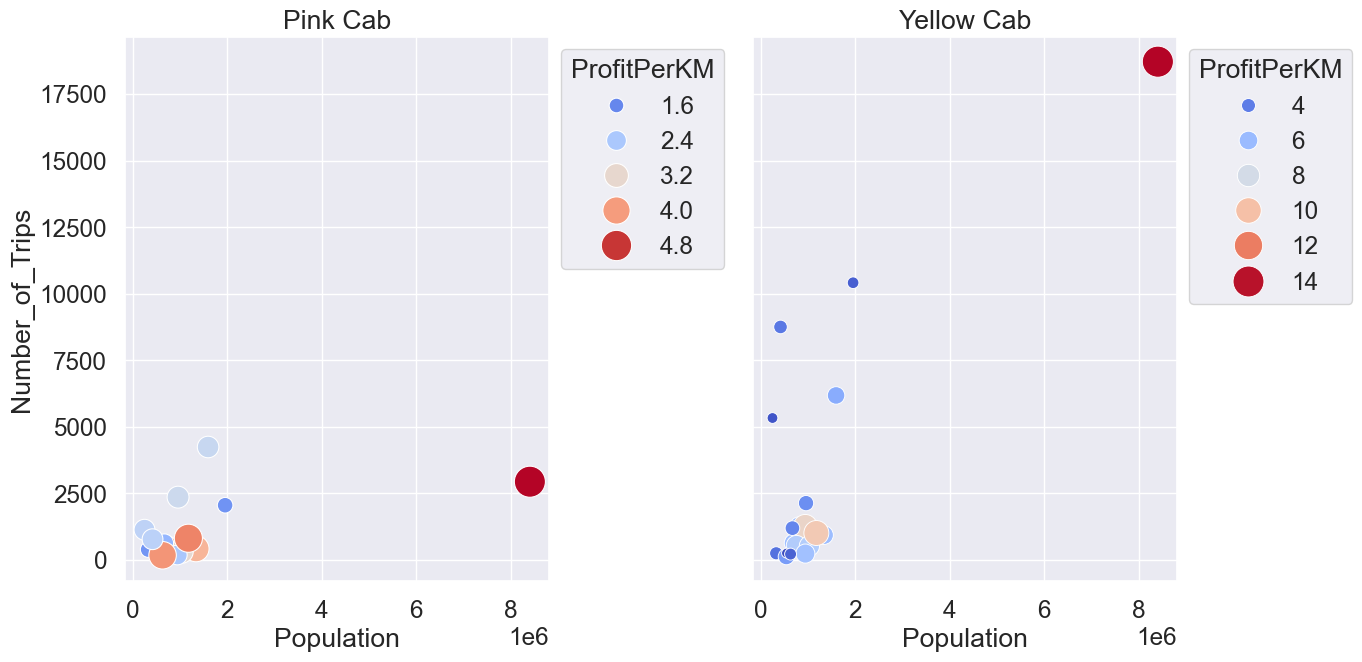

In [193]:
# Group by 'City' and 'Company', count the number of records for each group, and calculate the mean 'ProfitPerKM'
city_company_group = combo_data.groupby(['City', 'Company']).agg(
    Number_of_Trips=('Transaction ID', 'size'),
    Average_ProfitPerKM=('ProfitPerKM', 'mean')
).reset_index()

# Merge with the population for each city
city_population = combo_data[['City', 'Population']].drop_duplicates()
merged_data = city_company_group.merge(city_population, on='City')

# Separate the data for Pink Cab and Yellow Cab
pink_data = merged_data[merged_data['Company'] == 'Pink Cab']
yellow_data = merged_data[merged_data['Company'] == 'Yellow Cab']

# Initialize a grid of plots with an Axes for each company
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Create scatter plots for Pink Cab
sns.scatterplot(ax=axes[0], data=pink_data, x='Population', y='Number_of_Trips', size='Average_ProfitPerKM', hue='Average_ProfitPerKM', palette='coolwarm', sizes=(50, 500))
axes[0].set_title('Pink Cab')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), title='ProfitPerKM')

# Create scatter plots for Yellow Cab
sns.scatterplot(ax=axes[1], data=yellow_data, x='Population', y='Number_of_Trips', size='Average_ProfitPerKM', hue='Average_ProfitPerKM', palette='coolwarm', sizes=(50, 500))
axes[1].set_title('Yellow Cab')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), title='ProfitPerKM')

# Display the plot
plt.tight_layout()
plt.show()

Pink Cab:

The large red dot corresponds to New York, indicating it's a highly profitable market for Pink Cab in terms of ProfitPerKM.
Despite the high ProfitPerKM, the number of trips for Pink Cab in New York is not as high as for Yellow Cab, as indicated by the vertical position of the red dot compared to the corresponding dot on the Yellow Cab plot.
Outside of New York, Pink Cab's presence in terms of the number of trips seems relatively modest across cities of varying population sizes, and the ProfitPerKM is generally lower as indicated by the smaller and lighter-colored dots.
Yellow Cab:

For Yellow Cab, New York also stands out as a significant market with a high ProfitPerKM. Moreover, the number of trips is substantially higher compared to Pink Cab, reflecting greater market penetration or customer preference in New York.
The spread of dots across the population axis for Yellow Cab indicates its operations in a diverse range of cities, not limited to highly populated ones.
The size and color of the dots suggest varying levels of profitability per kilometer, with some cities being quite profitable even if they aren’t the most populated.
Comparative Observations:

Both companies perform well in New York, but Yellow Cab has a higher volume of trips, which may indicate a dominant share of the market in terms of service usage.
Pink Cab, while profitable per kilometer in New York, doesn’t show the same level of trip volume, suggesting a smaller market share or potentially different operational strategies.
In terms of expansion strategy or focusing efforts, Yellow Cab might benefit from leveraging its high volume and profitability in New York, while Pink Cab might investigate what leads to its high ProfitPerKM in New York and consider how to replicate this success in other cities, potentially by increasing the number of trips. Still Pink Cab's profit per km, even in the NY, is three times lower than for Pink Cab. There are two general reaosns of lower profitabily of Pink Cab:

- In general Pink Can charges on averga $\frac{14.00}{20.63} * 100 = 67.86\, \%$ of the Yellow Cab's.
- The total sum of kilomiters of Pink Cab amounts to   $\frac{411122.93}{1353509.12} * 100  = 30.375\, \%$ of the Yellow Cab's.

#### Key Findings:

1. Population and Transaction Volume:
- Yellow Cab shows a strong positive correlation between city population and transaction count (correlation = 0.811, p-value = 0.005), indicating higher transaction volumes in larger cities.
- Pink Cab also benefits from larger cities but to a lesser extent (correlation = 0.534, p-value = 0.047).
2. Population and Profitability per Kilometer:
- Yellow Cab achieves higher profitability in larger cities (correlation = 0.751, p-value = 0.001), suggesting effective scale operations that capitalize on the dense urban environment.
- Pink Cab shows a moderate correlation between city population and profitability per kilometer (correlation = 0.523, p-value = 0.023), indicating some benefit but not as pronounced as Yellow Cab.
3. Geographical Division - East and West:
- Both companies show insignificant statistical differences between the eastern and western parts of the U.S. in terms of users and transactions, suggesting that geographical location by longitude is less relevant.
4. Coastal vs. Non-Coastal Cities:
- Yellow Cab performs exceptionally well in coastal cities in both the number of users and profitability, with high correlations (correlation > 0.875, p-value < 0.01) in these areas.
- Pink Cab shows a strong performance in coastal cities, particularly in profitability per kilometer (correlation = 0.777, p-value = 0.008), but its performance in non-coastal cities is notably weaker.
5. New York City is exceptional:
Both companies thrive in New York City with high profitability per kilometer, with Yellow Cab also showing a significant volume of trips. Pink Cab, while highly profitable per kilometer, has fewer trips, suggesting a lower market penetration.

### Hypothesis 4. Which company is more resilient to adverse economical factors. 

In [280]:
combo_data = pd.read_csv('./DataSets/combo_data.csv', index_col=0)
pd.set_option('display.max_columns', None)
combo_data

Transaction ID Date of Travel     Company            City  \
0            10000013     2016-01-04    Pink Cab      ATLANTA GA   
1            10000756     2016-01-04  Yellow Cab  LOS ANGELES CA   
2            10000771     2016-01-04  Yellow Cab  LOS ANGELES CA   
3            10000775     2016-01-04  Yellow Cab  LOS ANGELES CA   
4            10000777     2016-01-04  Yellow Cab  LOS ANGELES CA   
...               ...            ...         ...             ...   
78229        10434818     2018-12-31  Yellow Cab  LOS ANGELES CA   
78230        10434815     2018-12-31  Yellow Cab  LOS ANGELES CA   
78231        10434814     2018-12-31  Yellow Cab  LOS ANGELES CA   
78232        10434730     2018-12-31  Yellow Cab  LOS ANGELES CA   
78233        10434858     2018-12-31  Yellow Cab  LOS ANGELES CA   

       KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              9.04         125.20         97.63        28712         Cash   
1              7.07         185.88         88.23         8946         Card   
2              1.92          45.47         27.19         7835         Cash   
3             29.87         733.78        430.13         7777         Cash   
4             33.00         928.39        403.92         6624         Card   
...             ...            ...           ...          ...          ...   
78229         17.70         349.94        237.89         7777         Card   
78230          5.40         107.43         68.04         7892         Card   
78231         30.68         552.73        434.43         7673         Card   
78232         21.63         348.47        259.56         6398         Cash   
78233         14.28         307.04        185.07         7351         Cash   

       Gender  Age  Income (USD/Month)  Population     Users   lat     lon  \
0        Male   53               11242   814885.00  24701.00 33.75  -84.39   
1        Male   40               17996  1595037.00 144132.00 34.05 -118.24   
2        Male   52               12609  1595037.00 144132.00 34.05 -118.24   
3        Male   56                9132  1595037.00 144132.00 34.05 -118.24   
4        Male   37                8794  1595037.00 144132.00 34.05 -118.24   
...       ...  ...                 ...         ...       ...   ...     ...   
78229    Male   56                9132  1595037.00 144132.00 34.05 -118.24   
78230    Male   32               19824  1595037.00 144132.00 34.05 -118.24   
78231  Female   18                3787  1595037.00 144132.00 34.05 -118.24   
78232  Female   50               24762  1595037.00 144132.00 34.05 -118.24   
78233    Male   20               19051  1595037.00 144132.00 34.05 -118.24   

       Usage Percentage  UnRate  GasolinePrice  Profit  ProfitPerKM  \
0                  3.03    4.80           1.92   27.57         3.05   
1                  9.04    4.80           1.92   97.65        13.81   
2                  9.04    4.80           1.92   18.28         9.52   
3                  9.04    4.80           1.92  303.65        10.17   
4                  9.04    4.80           1.92  524.47        15.89   
...                 ...     ...            ...     ...          ...   
78229              9.04    3.90           2.16  112.05         6.33   
78230              9.04    3.90           2.16   39.39         7.29   
78231              9.04    3.90           2.16  118.30         3.86   
78232              9.04    3.90           2.16   88.91         4.11   
78233              9.04    3.90           2.16  121.97         8.54   

       PricePerKM  CostPerKM  
0           13.85      10.80  
1           26.29      12.48  
2           23.68      14.16  
3           24.57      14.40  
4           28.13      12.24  
...           ...        ...  
78229       19.77      13.44  
78230       19.89      12.60  
78231       18.02      14.16  
78232       16.11      12.00  
78233       21.50      12.96  

[78234 rows x 23 columns]

In [258]:
# Assuming combo_data is loaded and 'Date of Travel' is converted to datetime format
combo_data['Date of Travel'] = pd.to_datetime(combo_data['Date of Travel'])
combo_data.set_index('Date of Travel', inplace=True)

# Group by month and company, then aggregate Customer IDs
monthly_customers = combo_data.groupby(['Company', pd.Grouper(freq='M')])['Customer ID'].agg(['unique']).reset_index()

# Shift the customer data to find last month's customers for retention calculation
monthly_customers['Previous Month Customers'] = monthly_customers.groupby('Company')['unique'].shift(1)

# Define a function to calculate retention
def calculate_retention(this_month, last_month):
    if isinstance(last_month, float):  # this handles NaN cases
        return np.nan
    return len(set(this_month).intersection(set(last_month))) / len(set(last_month))

# Apply the function to calculate retention ratio
monthly_customers['Retention Ratio'] = monthly_customers.apply(
    lambda row: calculate_retention(row['unique'], row['Previous Month Customers']), axis=1
)

def impute_first_month_retention(monthly_customers):
    for company in monthly_customers['Company'].unique():
        company_data = monthly_customers[monthly_customers['Company'] == company]
        if pd.isna(company_data.iloc[0]['Retention Ratio']):
            # Calculate average of the next months
            subsequent_avg = company_data['Retention Ratio'][1:].mean()
            monthly_customers.loc[(monthly_customers['Company'] == company) & (monthly_customers.index == company_data.index[0]), 'Retention Ratio'] = subsequent_avg
    return monthly_customers

# Apply the imputation function
monthly_customers = impute_first_month_retention(monthly_customers)
print(monthly_customers[['Company', 'Date of Travel', 'Retention Ratio']])


# Now, you can either display this data or perform further analysis
#print(monthly_customers[['Company', 'Date of Travel', 'Retention Ratio']])

       Company Date of Travel  Retention Ratio
0     Pink Cab     2016-01-31             0.02
1     Pink Cab     2016-02-29             0.01
2     Pink Cab     2016-03-31             0.01
3     Pink Cab     2016-04-30             0.01
4     Pink Cab     2016-05-31             0.02
..         ...            ...              ...
67  Yellow Cab     2018-08-31             0.10
68  Yellow Cab     2018-09-30             0.10
69  Yellow Cab     2018-10-31             0.15
70  Yellow Cab     2018-11-30             0.16
71  Yellow Cab     2018-12-31             0.20

[72 rows x 3 columns]


In [259]:
# Check if the columns are present and then drop them
if 'unique' in monthly_customers.columns and 'Previous Month Customers' in monthly_customers.columns:
    monthly_customers = monthly_customers.drop(['unique', 'Previous Month Customers'], axis=1)

# Now, split the DataFrame into two based on the company
pink_cus = monthly_customers[monthly_customers['Company'] == 'Pink Cab']
yellow_cus = monthly_customers[monthly_customers['Company'] == 'Yellow Cab']

# Display the results to confirm the columns are dropped
pink_cus.set_index('Date of Travel', inplace=True)
print("Filtered Pink Cab Data:")
print(pink_cus.head())

yellow_cus.set_index('Date of Travel', inplace=True)
print("\nFiltered Yellow Cab Data:")
print(yellow_cus.head())


Filtered Pink Cab Data:
                 Company  Retention Ratio
Date of Travel                           
2016-01-31      Pink Cab             0.02
2016-02-29      Pink Cab             0.01
2016-03-31      Pink Cab             0.01
2016-04-30      Pink Cab             0.01
2016-05-31      Pink Cab             0.02

Filtered Yellow Cab Data:
                   Company  Retention Ratio
Date of Travel                             
2016-01-31      Yellow Cab             0.09
2016-02-29      Yellow Cab             0.06
2016-03-31      Yellow Cab             0.07
2016-04-30      Yellow Cab             0.09
2016-05-31      Yellow Cab             0.12


In [260]:
combo_data = pd.read_csv('./DataSets/combo_data.csv', index_col=0)
#combo_data.set_index('Date of Travel', inplace=True)
pd.set_option('display.max_columns', None)  # None means show all columns
combo_data['Date of Travel'] = pd.to_datetime(combo_data['Date of Travel'])
# Create separate data frames for each company
combo_pink = combo_data[combo_data['Company'] == 'Pink Cab']
combo_yellow = combo_data[combo_data['Company'] == 'Yellow Cab']

# Set 'Date of Travel' as the index for both DataFrames
combo_pink.set_index('Date of Travel', inplace=True)
combo_yellow.set_index('Date of Travel', inplace=True)

# Resample data to monthly intervals for Pink Cab
monthly_pink = combo_pink.resample('M').agg({
    'UnRate': 'mean',
    'GasolinePrice': 'mean',
    'Income (USD/Month)': 'mean',
    'ProfitPerKM': 'mean',
    'City': lambda x: x.mode()[0] if not x.empty else np.nan,
    'Population': 'first',
    'Age': 'mean',
    'Users': 'sum',
    'PricePerKM': 'mean',
    'CostPerKM': 'mean'
})

# Resample data to monthly intervals for Yellow Cab
monthly_yellow = combo_yellow.resample('M').agg({
    'UnRate': 'mean',
    'GasolinePrice': 'mean',
    'Income (USD/Month)': 'mean',
    'ProfitPerKM': 'mean',
    'City': lambda x: x.mode()[0] if not x.empty else np.nan,
    'Population': 'first',
    'Age': 'mean',
    'Users': 'sum',
    'PricePerKM': 'mean',
    'CostPerKM': 'mean'
})

# Output the first few rows to verify everything is as expected
print("Monthly data for Pink Cab:")
pd.set_option('display.max_columns', None)  # None means show all columns
print(monthly_pink.head())
print("\nMonthly data for Yellow Cab:")
print(monthly_yellow.head())

Monthly data for Pink Cab:
                UnRate  GasolinePrice  Income (USD/Month)  ProfitPerKM  \
Date of Travel                                                           
2016-01-31        4.80           1.84            15752.85         3.85   
2016-02-29        4.90           1.68            15524.67         4.53   
2016-03-31        5.00           1.90            15289.80         3.66   
2016-04-30        5.10           2.03            14972.16         3.86   
2016-05-31        4.80           2.20            15104.51         2.30   

                          City  Population   Age       Users  PricePerKM  \
Date of Travel                                                             
2016-01-31      LOS ANGELES CA   814885.00 35.51 21690123.00       14.80   
2016-02-29      LOS ANGELES CA   418859.00 36.38 38340066.00       15.51   
2016-03-31      LOS ANGELES CA   418859.00 34.92 36831036.00       14.67   
2016-04-30      LOS ANGELES CA   671238.00 35.11 29950927.00       14.83  

In [261]:
# Merge the dataframes on the index directly since both already have 'Date of Travel' as index
combo_pink = monthly_pink.merge(pink_cus, left_index=True, right_index=True, how='left')
combo_pink

UnRate  GasolinePrice  Income (USD/Month)  ProfitPerKM  \
Date of Travel                                                           
2016-01-31        4.80           1.84            15752.85         3.85   
2016-02-29        4.90           1.68            15524.67         4.53   
2016-03-31        5.00           1.90            15289.80         3.66   
2016-04-30        5.10           2.03            14972.16         3.86   
2016-05-31        4.80           2.20            15104.51         2.30   
2016-06-30        4.90           2.30            15332.85         2.30   
2016-07-31        4.80           2.16            15393.22         2.58   
2016-08-31        4.90           2.12            14638.26         2.94   
2016-09-30        5.00           2.16            15320.52         2.59   
2016-10-31        4.90           2.19            14950.02         3.79   
2016-11-30        4.70           2.10            15200.62         4.36   
2016-12-31        4.70           2.19            15201.47         4.82   
2017-01-31        4.70           2.31            14247.97         4.29   
2017-02-28        4.60           2.23            15261.81         2.39   
2017-03-31        4.40           2.24            16125.04         2.48   
2017-04-30        4.40           2.34            14480.54         2.14   
2017-05-31        4.40           2.30            16559.95         1.29   
2017-06-30        4.30           2.25            15279.40         1.17   
2017-07-31        4.30           2.21            15079.52         1.69   
2017-08-31        4.40           2.30            14265.28         1.57   
2017-09-30        4.30           2.57            15714.08         1.74   
2017-10-31        4.20           2.43            14697.47         2.40   
2017-11-30        4.20           2.47            14261.30         2.83   
2017-12-31        4.10           2.39            15202.35         3.10   
2018-01-31        4.00           2.45            15052.65         3.28   
2018-02-28        4.10           2.49            14754.19         3.28   
2018-03-31        4.00           2.49            15530.42         3.09   
2018-04-30        4.00           2.66            14607.21         3.14   
2018-05-31        3.80           2.81            15512.71         1.67   
2018-06-30        4.00           2.80            15070.80         1.68   
2018-07-31        3.80           2.77            15273.67         2.11   
2018-08-31        3.80           2.77            14911.81         2.41   
2018-09-30        3.70           2.77            15252.23         2.41   
2018-10-31        3.80           2.78            15225.29         2.83   
2018-11-30        3.80           2.56            14877.07         3.19   
2018-12-31        3.90           2.27            14699.21         3.85   

                          City  Population   Age        Users  PricePerKM  \
Date of Travel                                                              
2016-01-31      LOS ANGELES CA   814885.00 35.51  21690123.00       14.80   
2016-02-29      LOS ANGELES CA   418859.00 36.38  38340066.00       15.51   
2016-03-31      LOS ANGELES CA   418859.00 34.92  36831036.00       14.67   
2016-04-30      LOS ANGELES CA   671238.00 35.11  29950927.00       14.83   
2016-05-31      LOS ANGELES CA   418859.00 36.27  56856698.00       13.28   
2016-06-30      LOS ANGELES CA   959307.00 35.50  50698966.00       13.24   
2016-07-31      LOS ANGELES CA   959307.00 35.30  60407462.00       13.53   
2016-08-31      LOS ANGELES CA  1595037.00 36.38  84956238.00       13.94   
2016-09-30         NEW YORK NY  8405837.00 35.49  88715063.00       13.57   
2016-10-31      LOS ANGELES CA   545776.00 36.16 134731206.00       14.78   
2016-11-30      LOS ANGELES CA   418859.00 35.77 111672452.00       15.37   
2016-12-31         NEW YORK NY   671238.00 35.36 126515474.00       15.82   
2017-01-31      LOS ANGELES CA   959307.00 35.73  44755201.00       15.30   
2017-02-28      LOS ANGELES CA  8405837.00 35.80

In [262]:
combo_yellow = monthly_yellow.merge(yellow_cus, left_index=True, right_index=True, how='left')
combo_yellow

UnRate  GasolinePrice  Income (USD/Month)  ProfitPerKM  \
Date of Travel                                                           
2016-01-31        4.80           1.83            14941.24        10.61   
2016-02-29        4.90           1.68            14869.56        10.50   
2016-03-31        5.00           1.90            14882.01         8.60   
2016-04-30        5.10           2.03            14893.88         8.69   
2016-05-31        4.80           2.20            14989.27        10.28   
2016-06-30        4.90           2.30            14974.59        10.65   
2016-07-31        4.80           2.15            14746.25         7.26   
2016-08-31        4.90           2.12            15128.58         6.41   
2016-09-30        5.00           2.16            14822.21         8.13   
2016-10-31        4.90           2.19            14835.80         6.92   
2016-11-30        4.70           2.10            15223.75         7.40   
2016-12-31        4.70           2.19            14878.58         7.62   
2017-01-31        4.70           2.31            15423.55         7.69   
2017-02-28        4.60           2.23            15476.52         8.45   
2017-03-31        4.40           2.24            15200.46         7.45   
2017-04-30        4.40           2.34            15312.97         7.27   
2017-05-31        4.40           2.30            14944.22         8.73   
2017-06-30        4.30           2.26            14766.52         7.44   
2017-07-31        4.30           2.21            14982.47         5.22   
2017-08-31        4.40           2.30            14612.03         5.35   
2017-09-30        4.30           2.57            15185.77         5.76   
2017-10-31        4.20           2.43            15043.62         5.42   
2017-11-30        4.20           2.47            14916.31         6.49   
2017-12-31        4.10           2.39            14906.12         5.39   
2018-01-31        4.00           2.46            14987.99         7.96   
2018-02-28        4.10           2.49            15064.03         8.58   
2018-03-31        4.00           2.49            15228.11         8.07   
2018-04-30        4.00           2.65            15125.47         7.89   
2018-05-31        3.80           2.81            14782.13         9.39   
2018-06-30        4.00           2.80            15250.25         8.60   
2018-07-31        3.80           2.77            14923.32         6.16   
2018-08-31        3.80           2.77            14987.32         5.34   
2018-09-30        3.70           2.77            15223.68         6.56   
2018-10-31        3.80           2.78            15330.09         6.59   
2018-11-30        3.80           2.56            15049.18         6.47   
2018-12-31        3.90           2.26            14836.15         6.57   

                       City  Population   Age        Users  PricePerKM  \
Date of Travel                                                           
2016-01-31      NEW YORK NY  1595037.00 35.40 132628707.00       23.81   
2016-02-29      NEW YORK NY   248968.00 35.44 259985442.00       23.67   
2016-03-31      NEW YORK NY   418859.00 35.74 225827655.00       21.82   
2016-04-30      NEW YORK NY  1955130.00 35.01 221548362.00       21.86   
2016-05-31      NEW YORK NY  1595037.00 35.29 324437585.00       23.50   
2016-06-30      NEW YORK NY   814885.00 35.69 243407710.00       23.81   
2016-07-31      NEW YORK NY   814885.00 34.83 267508237.00       20.45   
2016-08-31      NEW YORK NY   942908.00 35.00 372621338.00       19.60   
2016-09-30      NEW YORK NY   418859.00 35.32 354582792.00       21.34   
2016-10-31      NEW YORK NY   814885.00 35.08 519866248.00       20.13   
2016-11-30      NEW YORK NY  1955130.00 35.27 429065589.00       20.60   
2016-12-31      NEW YORK NY   942908.00 35.25 472169527.00       20.84   
2017-01-31      NEW YORK NY   814885.00 35.28 234397194.00       20.92   
2017-02-28      NEW YORK NY  8405837.00 34.86 106767196.00       21.65   
2017-03-31      NEW

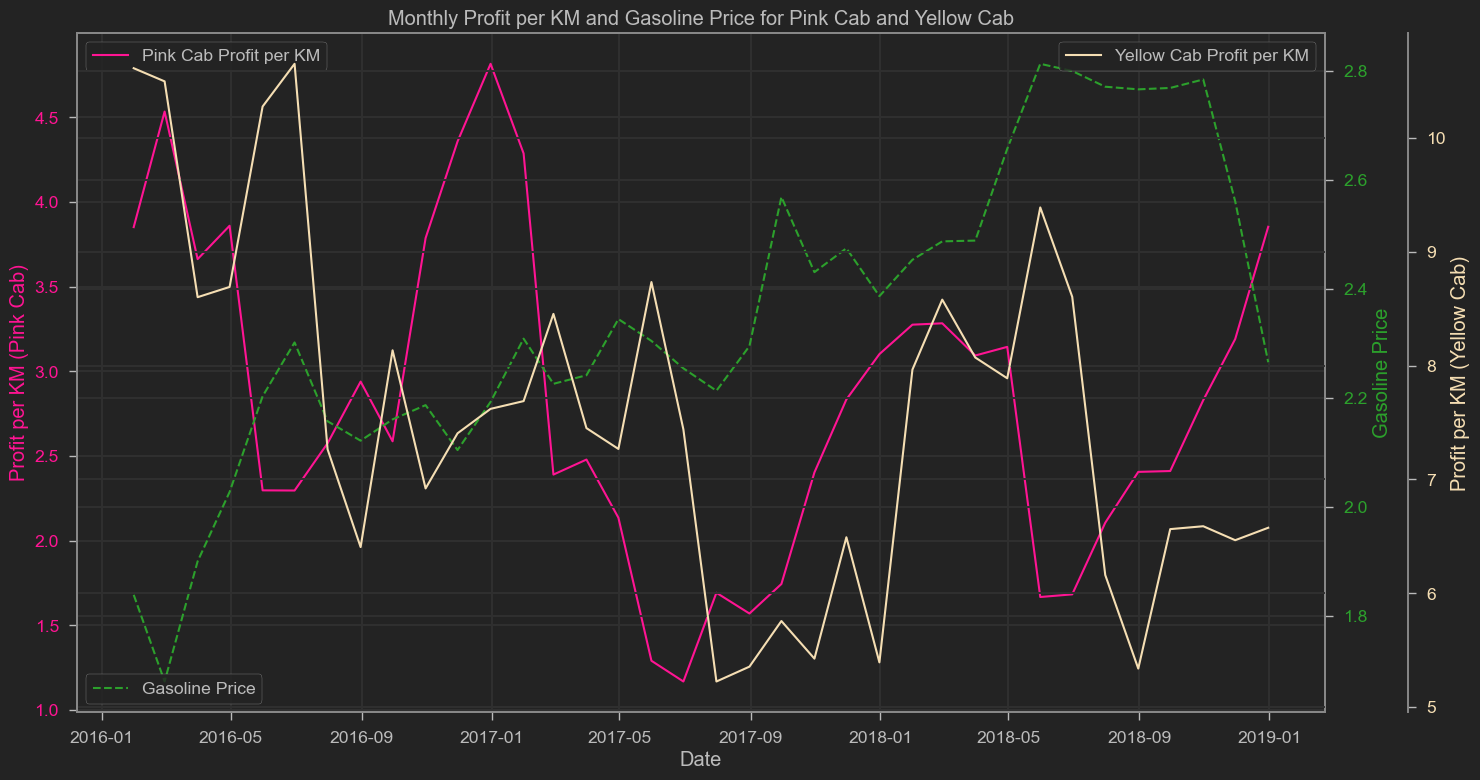

The correlation coefficient between monthly average profit per KM and gasoline price for Pink Cab is: -0.42
The correlation coefficient between monthly average profit per KM and gasoline price for Yellow Cab is: -0.27


In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot Pink Cab data
color = 'deeppink'
ax1.set_xlabel('Date')
ax1.set_ylabel('Profit per KM (Pink Cab)', color=color)
ax1.plot(combo_pink.index, combo_pink['ProfitPerKM'], color=color, label='Pink Cab Profit per KM')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second y-axis for gasoline price using the same x-axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Gasoline Price', color=color)
ax2.plot(combo_pink.index, combo_pink['GasolinePrice'], color=color, linestyle='--', label='Gasoline Price')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='lower left')

# Plot Yellow Cab data on the same axes
color = 'wheat'
ax3 = ax1.twinx()  # instantiate a third axes that shares the same x-axis
ax3.spines["right"].set_position(("outward", 60))  # offset right spine
ax3.set_ylabel('Profit per KM (Yellow Cab)', color=color)
ax3.plot(combo_yellow.index, combo_yellow['ProfitPerKM'], color=color, label='Yellow Cab Profit per KM')
ax3.tick_params(axis='y', labelcolor=color)
ax3.legend(loc='upper right')

plt.title('Monthly Profit per KM and Gasoline Price for Pink Cab and Yellow Cab')
fig.tight_layout()  # Adjust the layout to make room for the second y-axis

plt.show()

# Calculate and print the correlation for each company
correlation_pink = combo_pink['ProfitPerKM'].corr(combo_pink['GasolinePrice'], method='spearman')
correlation_yellow = combo_yellow['ProfitPerKM'].corr(combo_yellow['GasolinePrice'], method='spearman')
print(f'The correlation coefficient between monthly average profit per KM and gasoline price for Pink Cab is: {correlation_pink:.2f}')
print(f'The correlation coefficient between monthly average profit per KM and gasoline price for Yellow Cab is: {correlation_yellow:.2f}')


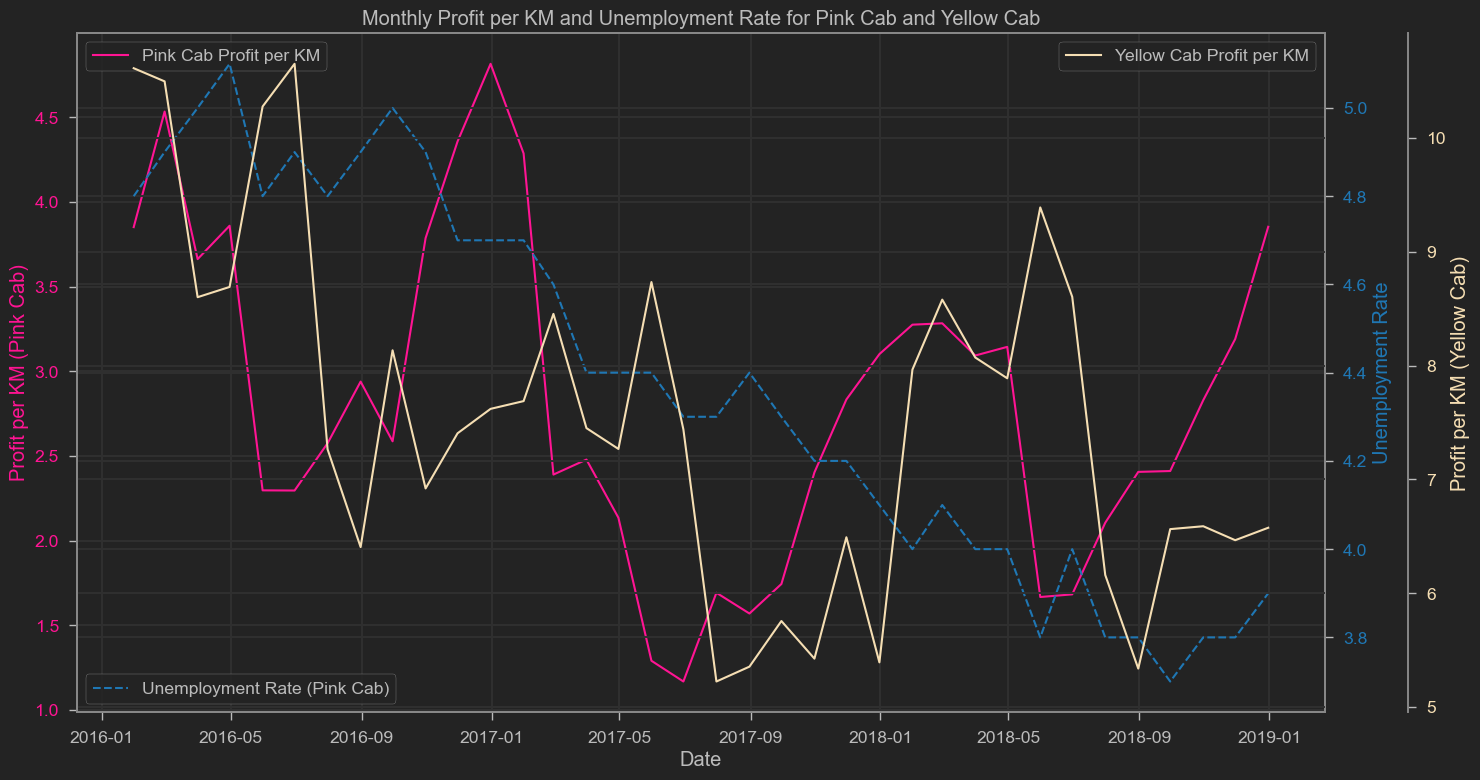

The Spearman correlation coefficient between monthly average profit per KM and unemployment rate for Pink Cab is: 0.27
The Spearman correlation coefficient between monthly average profit per KM and unemployment rate for Yellow Cab is: 0.41


In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot Pink Cab data
color = 'deeppink'
ax1.set_xlabel('Date')
ax1.set_ylabel('Profit per KM (Pink Cab)', color=color)
ax1.plot(combo_pink.index, combo_pink['ProfitPerKM'], color=color, label='Pink Cab Profit per KM')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second y-axis for the unemployment rate
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Unemployment Rate', color=color)
ax2.plot(combo_pink.index, combo_pink['UnRate'], color=color, linestyle='--', label='Unemployment Rate (Pink Cab)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='lower left')

# Plot Yellow Cab data on the same axes
color = 'wheat'
ax3 = ax1.twinx()  # instantiate a third axes that shares the same x-axis
ax3.spines["right"].set_position(("outward", 60))  # offset right spine
ax3.set_ylabel('Profit per KM (Yellow Cab)', color=color)
ax3.plot(combo_yellow.index, combo_yellow['ProfitPerKM'], color=color, label='Yellow Cab Profit per KM')
ax3.tick_params(axis='y', labelcolor=color)
ax3.legend(loc='upper right')

plt.title('Monthly Profit per KM and Unemployment Rate for Pink Cab and Yellow Cab')
fig.tight_layout()  # Adjust the layout to make room for the second y-axis

plt.show()

# Calculate and print the Spearman's rank correlation for each company
correlation_pink = combo_pink['ProfitPerKM'].corr(combo_pink['UnRate'], method='spearman')
correlation_yellow = combo_yellow['ProfitPerKM'].corr(combo_yellow['UnRate'], method='spearman')
print(f'The Spearman correlation coefficient between monthly average profit per KM and unemployment rate for Pink Cab is: {correlation_pink:.2f}')
print(f'The Spearman correlation coefficient between monthly average profit per KM and unemployment rate for Yellow Cab is: {correlation_yellow:.2f}')


The provided data indicate that both companies operate extensively in NY and LA (and other cities), cities that represent different economic profiles and customer bases.

#### Gasoline Prices:
For Pink Cab, there is a negative correlation between gasoline prices and profit per KM, suggesting that higher fuel costs slightly reduce profitability. This effect is more pronounced in LA, possibly due to longer travel distances and a more car-dependent customer base.

Yellow Cab shows a similar trend but with a less pronounced correlation, indicating a potential buffer in their cost structure or pricing strategy that mitigates the impact of rising fuel costs. In NY, the effect of gasoline prices on profitability is relatively muted, likely due to shorter trip distances and higher ride density.

#### Unemployment Rates:
Interestingly, unemployment rates show a positive correlation with profit per KM for Yellow Cab, particularly in NY. This could indicate that as unemployment rises, more individuals turn to cab services, perhaps due to the necessity of seeking work across the city. Yellow Cab might also be capturing demand from those who have lost access to a personal vehicle due to economic hardship.

For Pink Cab, the correlation in NY is less positive, suggesting that their customer base may not expand as much with rising unemployment. This could reflect a customer segment with different transportation needs or economic pressures.

#### City Modality Effect:
The 'City' mode in the monthly datasets reveals that the majority of high-profit months for Pink Cab occur in LA, while for Yellow Cab, NY stands out. This suggests that city-specific factors heavily influence profitability. For example, LA's sprawling geography might influence Pink Cab's operational costs and customer pricing differently than NY's dense urban environment impacts Yellow Cab.

#### Conclusions:

- Pink Cab should investigate the elasticity of their services in relation to fuel costs, especially in LA, and consider strategies to safeguard profit margins during economic downturns, such as variable pricing models or cost-saving measures.
- Yellow Cab appears more resilient to adverse economic factors in NY, possibly due to a broader customer base or efficient cost management. However, in LA, a closer look at how unemployment rates affect customer usage patterns could yield strategies to enhance stability and growth.
#### Recommendations:
Both companies could benefit from a more in-depth analysis of city-specific economic factors. Strategies may include:

- Adjusting pricing during periods of high fuel costs.
- Diversifying the customer base to include both car-dependent and transit-oriented segments.
- Enhancing customer loyalty programs to maintain a steady user base, especially during times of economic uncertainty.

### Hypothesis 5. Is really Yellow Cab a better opportuinity based of predicting future business indicator of Yellow Cab and Pink Cab if we take into account if Price of Pink Cab amounts to 40 pc of the Yellow Cab?

In [289]:
combo_data

Transaction ID Date of Travel     Company            City  \
0            10000013     2016-01-04    Pink Cab      ATLANTA GA   
1            10000756     2016-01-04  Yellow Cab  LOS ANGELES CA   
2            10000771     2016-01-04  Yellow Cab  LOS ANGELES CA   
3            10000775     2016-01-04  Yellow Cab  LOS ANGELES CA   
4            10000777     2016-01-04  Yellow Cab  LOS ANGELES CA   
...               ...            ...         ...             ...   
78229        10434818     2018-12-31  Yellow Cab  LOS ANGELES CA   
78230        10434815     2018-12-31  Yellow Cab  LOS ANGELES CA   
78231        10434814     2018-12-31  Yellow Cab  LOS ANGELES CA   
78232        10434730     2018-12-31  Yellow Cab  LOS ANGELES CA   
78233        10434858     2018-12-31  Yellow Cab  LOS ANGELES CA   

       KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              9.04         125.20         97.63        28712         Cash   
1              7.07         185.88         88.23         8946         Card   
2              1.92          45.47         27.19         7835         Cash   
3             29.87         733.78        430.13         7777         Cash   
4             33.00         928.39        403.92         6624         Card   
...             ...            ...           ...          ...          ...   
78229         17.70         349.94        237.89         7777         Card   
78230          5.40         107.43         68.04         7892         Card   
78231         30.68         552.73        434.43         7673         Card   
78232         21.63         348.47        259.56         6398         Cash   
78233         14.28         307.04        185.07         7351         Cash   

       Gender  Age  Income (USD/Month)  Population     Users   lat     lon  \
0        Male   53               11242   814885.00  24701.00 33.75  -84.39   
1        Male   40               17996  1595037.00 144132.00 34.05 -118.24   
2        Male   52               12609  1595037.00 144132.00 34.05 -118.24   
3        Male   56                9132  1595037.00 144132.00 34.05 -118.24   
4        Male   37                8794  1595037.00 144132.00 34.05 -118.24   
...       ...  ...                 ...         ...       ...   ...     ...   
78229    Male   56                9132  1595037.00 144132.00 34.05 -118.24   
78230    Male   32               19824  1595037.00 144132.00 34.05 -118.24   
78231  Female   18                3787  1595037.00 144132.00 34.05 -118.24   
78232  Female   50               24762  1595037.00 144132.00 34.05 -118.24   
78233    Male   20               19051  1595037.00 144132.00 34.05 -118.24   

       Usage Percentage  UnRate  GasolinePrice  Profit  ProfitPerKM  \
0                  3.03    4.80           1.92   27.57         3.05   
1                  9.04    4.80           1.92   97.65        13.81   
2                  9.04    4.80           1.92   18.28         9.52   
3                  9.04    4.80           1.92  303.65        10.17   
4                  9.04    4.80           1.92  524.47        15.89   
...                 ...     ...            ...     ...          ...   
78229              9.04    3.90           2.16  112.05         6.33   
78230              9.04    3.90           2.16   39.39         7.29   
78231              9.04    3.90           2.16  118.30         3.86   
78232              9.04    3.90           2.16   88.91         4.11   
78233              9.04    3.90           2.16  121.97         8.54   

       PricePerKM  CostPerKM  Retention RatioM  Retention RatioQ  \
0           13.85      10.80              0.02              0.06   
1           26.29      12.48              0.07              0.29   
2           23.68      14.16              0.07              0.29   
3           24.57      14.40              0.07              0.29   
4           28.13      12.24              0.07              0.29   
...           ...        ...               ...         

22:46:03 - cmdstanpy - INFO - Chain [1] start processing
22:46:04 - cmdstanpy - INFO - Chain [1] done processing


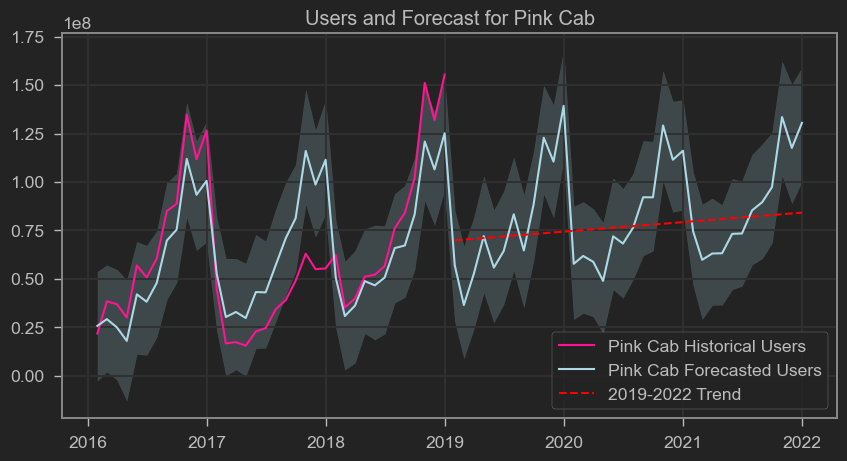

22:46:05 - cmdstanpy - INFO - Chain [1] start processing


Percentage slope for Pink Cab 7.021962921266016%


22:46:06 - cmdstanpy - INFO - Chain [1] done processing


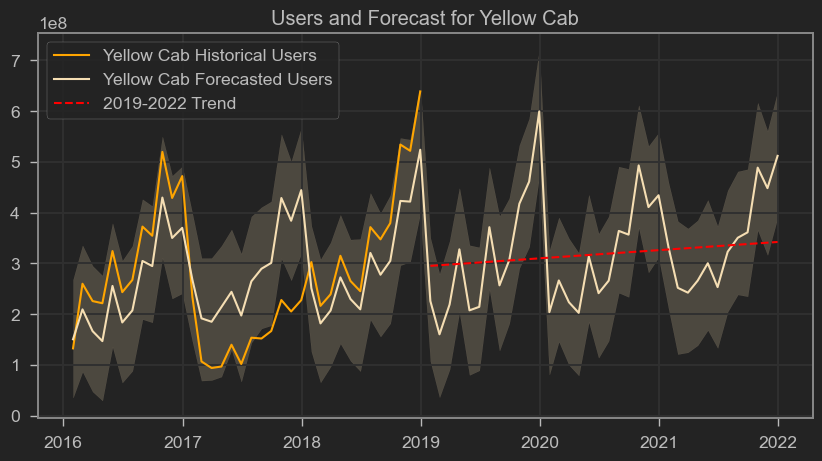

Percentage slope for Yellow Cab 5.464055274878227%


In [286]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from prophet import Prophet
import datetime as dt
from sklearn.linear_model import LinearRegression
from math import atan, degrees

def train_and_forecast_with_regressors(data, company, var, var_agg, regressors, periods=36):
    # Prepare data for the specified company
    company_data = data[data['Company'] == company]
    monthly_data = company_data.resample('M', on='Date of Travel').agg({var: var_agg, **{reg: 'mean' for reg in regressors}}).reset_index()
    monthly_data.rename(columns={'Date of Travel': 'ds', var: 'y'}, inplace=True)

    # Prophet model training
    prophet_model = Prophet(yearly_seasonality=True)
    for reg in regressors:
        prophet_model.add_regressor(reg)
    prophet_model.fit(monthly_data)

    # Forecasting
    future = prophet_model.make_future_dataframe(periods=periods, freq='M')
    future = future.merge(monthly_data[['ds'] + regressors], on='ds', how='left').fillna(method='ffill')
    forecast = prophet_model.predict(future)

    # Optional: Trend analysis
    start_date = dt.datetime(2019, 1, 1)
    end_date = dt.datetime(2022, 12, 31)
    trend = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]
    dates = np.array(trend['ds'].map(dt.datetime.toordinal)).reshape(-1, 1)
    model = LinearRegression().fit(dates, trend['trend'])
    slope_radians = atan(model.coef_[0])
    slope_degrees = degrees(slope_radians)

    # Calculate percentage slope
    initial_value = trend['trend'].iloc[0] if not trend['trend'].empty else 0
    percentage_slope = (model.coef_[0] * 365) / initial_value * 100 if initial_value != 0 else 0  # yearly change

    # Plotting
    plt.figure(figsize=(10, 5))
    
    # Set colors based on the company
    historical_color = 'deeppink' if company == 'Pink Cab' else 'orange'
    forecast_color = 'lightblue' if company == 'Pink Cab' else 'wheat'
    
    plt.plot(monthly_data['ds'], monthly_data['y'], label=f'{company} Historical Users', color=historical_color)
    plt.plot(forecast['ds'], forecast['yhat'], label=f'{company} Forecasted Users', color=forecast_color)
    plt.plot(trend['ds'], model.predict(dates), label='2019-2022 Trend', color='red', linestyle='--')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.2, color=forecast_color)
    plt.legend()
    plt.title(f'Users and Forecast for {company}')
    plt.show()

    print(f"Percentage slope for {company} {percentage_slope}%")
    return prophet_model, forecast, slope_radians, slope_degrees

# Ensure data is loaded correctly
combo_data = pd.read_csv('./DataSets/enhanced_combo_data.csv', index_col=0)
combo_data['Date of Travel'] = pd.to_datetime(combo_data['Date of Travel'])

# Example usage for Pink Cab and Yellow Cab
model_pink, forecast_pink, slope_rad_pink, slope_deg_pink = train_and_forecast_with_regressors(
    combo_data, 'Pink Cab', 'Users', 'sum', ['Population'], periods=36
)
model_yellow, forecast_yellow, slope_rad_yellow, slope_deg_yellow = train_and_forecast_with_regressors(
    combo_data, 'Yellow Cab', 'Users', 'sum', ['Population'], periods=36
)

22:46:11 - cmdstanpy - INFO - Chain [1] start processing
22:46:12 - cmdstanpy - INFO - Chain [1] done processing


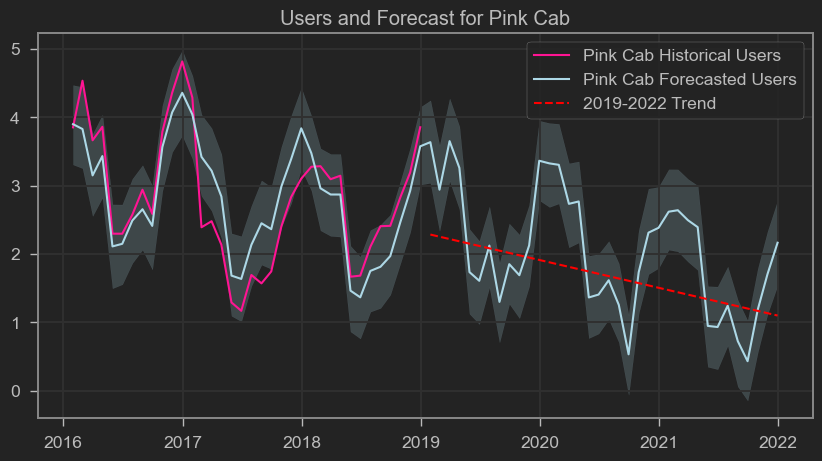

22:46:14 - cmdstanpy - INFO - Chain [1] start processing


Percentage slope for Pink Cab -17.76795427637503%


22:46:15 - cmdstanpy - INFO - Chain [1] done processing


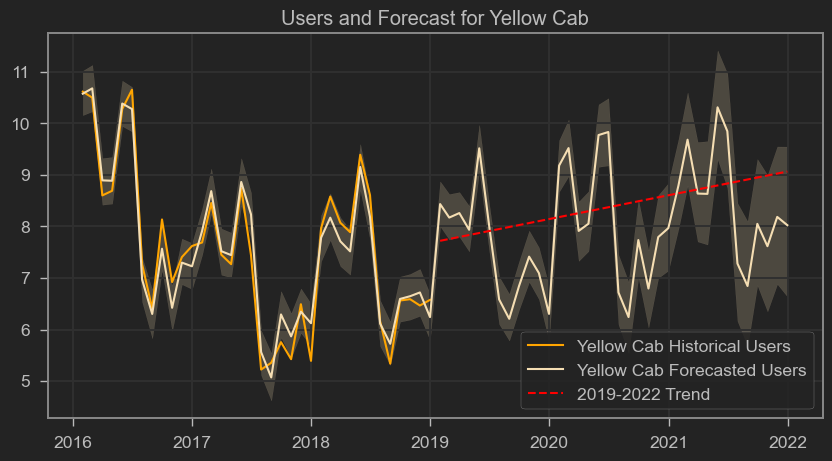

Percentage slope for Yellow Cab 5.963136215106477%


In [287]:
model_pink, forecast_pink, slope_rad_pink, slope_deg_pink = train_and_forecast_with_regressors(
    combo_data, 'Pink Cab', 'ProfitPerKM', 'mean', ['Population'], periods=36
)
model_yellow, forecast_yellow, slope_rad_yellow, slope_deg_yellow = train_and_forecast_with_regressors(
    combo_data, 'Yellow Cab', 'ProfitPerKM', 'mean', ['Population'], periods=36
)

22:41:19 - cmdstanpy - INFO - Chain [1] start processing
22:41:19 - cmdstanpy - INFO - Chain [1] done processing


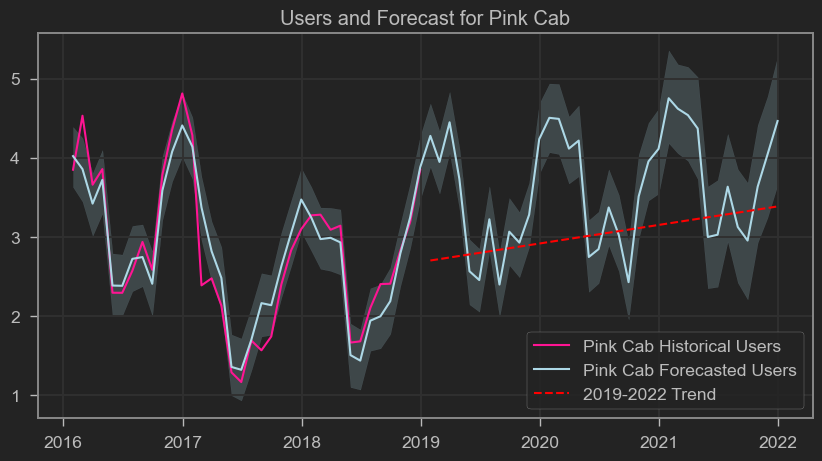

22:41:21 - cmdstanpy - INFO - Chain [1] start processing


Percentage slope for Pink Cab 8.65799752962206%


22:41:22 - cmdstanpy - INFO - Chain [1] done processing


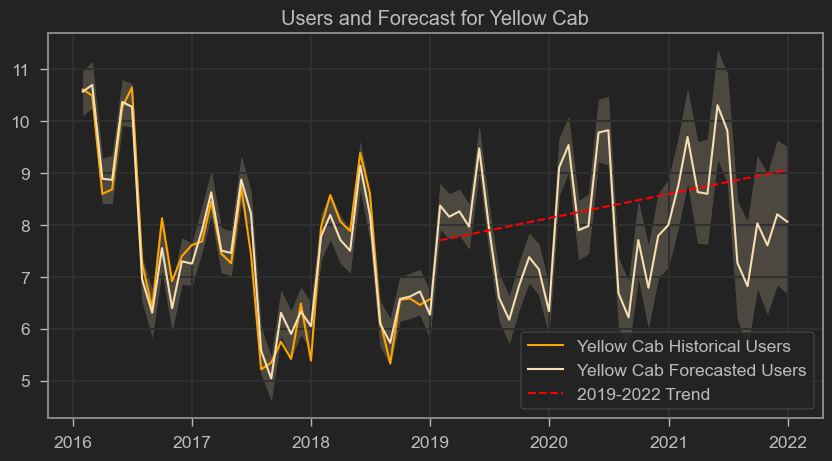

Percentage slope for Yellow Cab 6.017571736973522%


In [277]:
model_pink, forecast_pink, slope_rad_pink, slope_deg_pink = train_and_forecast_with_regressors(
    combo_data, 'Pink Cab', 'ProfitPerKM', 'mean', ['Users'], periods=36
)
model_yellow, forecast_yellow, slope_rad_yellow, slope_deg_yellow = train_and_forecast_with_regressors(
    combo_data, 'Yellow Cab', 'ProfitPerKM', 'mean', ['Users'], periods=36
)

22:51:26 - cmdstanpy - INFO - Chain [1] start processing
22:51:27 - cmdstanpy - INFO - Chain [1] done processing


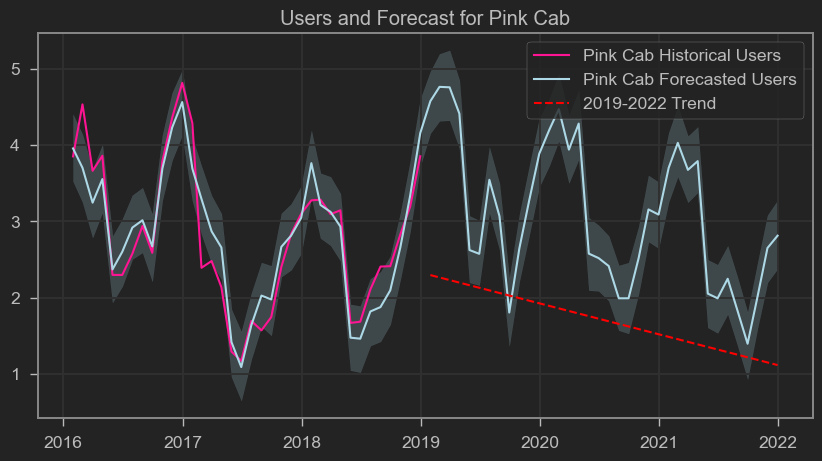

22:51:28 - cmdstanpy - INFO - Chain [1] start processing


Percentage slope for Pink Cab -17.626665367179328%


22:51:30 - cmdstanpy - INFO - Chain [1] done processing


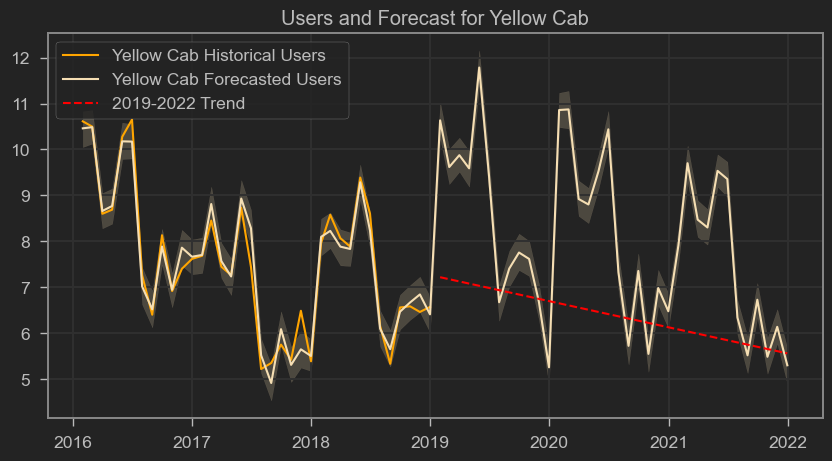

Percentage slope for Yellow Cab -7.861112987372415%


In [300]:
model_pink, forecast_pink, slope_rad_pink, slope_deg_pink = train_and_forecast_with_regressors(
    combo_data, 'Pink Cab', 'ProfitPerKM', 'mean', ['Retention RatioM', 'Users'], periods=36
)
model_yellow, forecast_yellow, slope_rad_yellow, slope_deg_yellow = train_and_forecast_with_regressors(
    combo_data, 'Yellow Cab', 'ProfitPerKM', 'mean', ['Retention RatioM', 'Users'], periods=36
)

22:48:37 - cmdstanpy - INFO - Chain [1] start processing
22:48:38 - cmdstanpy - INFO - Chain [1] done processing


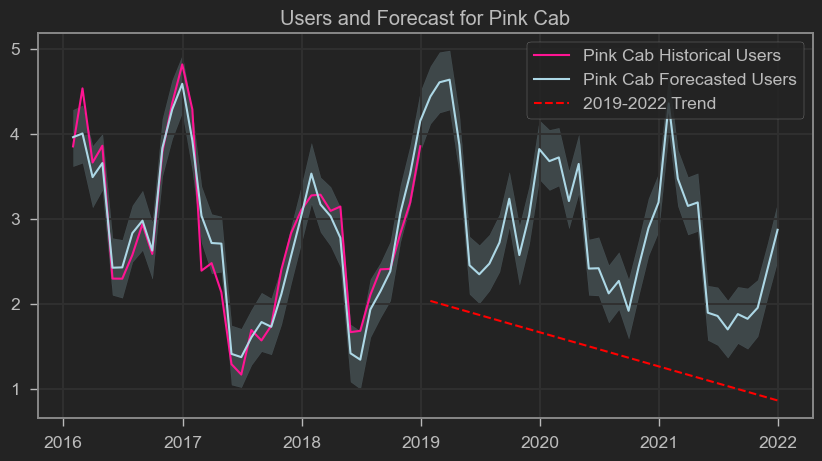

22:48:39 - cmdstanpy - INFO - Chain [1] start processing


Percentage slope for Pink Cab -19.711344410392957%


22:48:41 - cmdstanpy - INFO - Chain [1] done processing


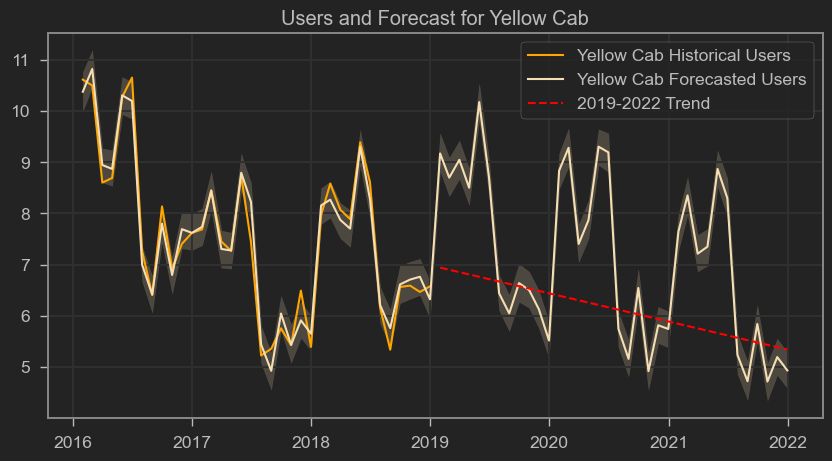

Percentage slope for Yellow Cab -7.904404925934743%


In [294]:
model_pink, forecast_pink, slope_rad_pink, slope_deg_pink = train_and_forecast_with_regressors(
    combo_data, 'Pink Cab', 'ProfitPerKM', 'mean', ['Retention RatioQ', 'Users'], periods=36
)
model_yellow, forecast_yellow, slope_rad_yellow, slope_deg_yellow = train_and_forecast_with_regressors(
    combo_data, 'Yellow Cab', 'ProfitPerKM', 'mean', ['Retention RatioQ', 'Users'], periods=36
)

22:49:46 - cmdstanpy - INFO - Chain [1] start processing
22:49:47 - cmdstanpy - INFO - Chain [1] done processing


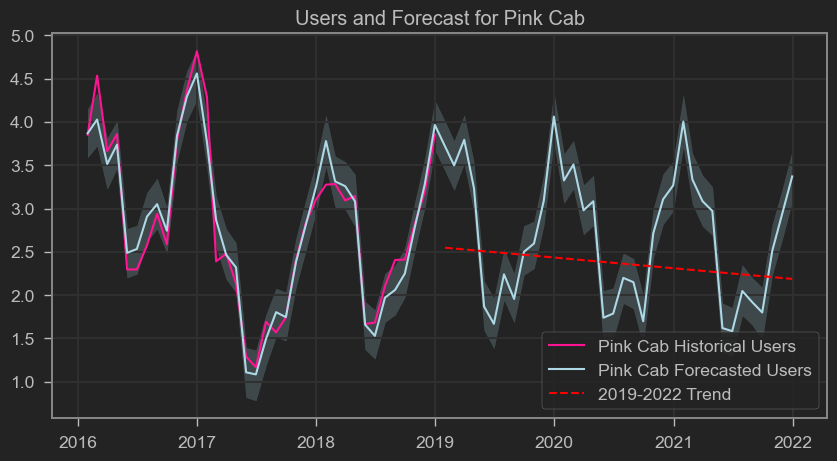

22:49:49 - cmdstanpy - INFO - Chain [1] start processing


Percentage slope for Pink Cab -4.84234586370849%


22:49:50 - cmdstanpy - INFO - Chain [1] done processing


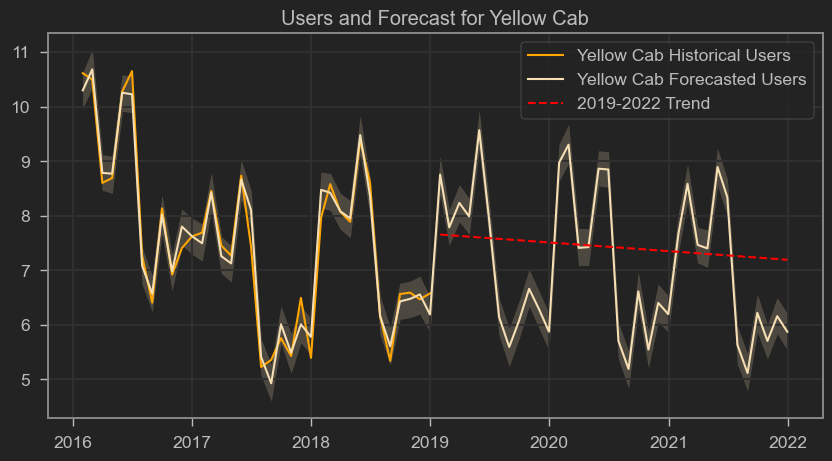

Percentage slope for Yellow Cab -2.068865381960472%


In [296]:
model_pink, forecast_pink, slope_rad_pink, slope_deg_pink = train_and_forecast_with_regressors(
    combo_data, 'Pink Cab', 'ProfitPerKM', 'mean', ['Retention RatioY', 'Users'], periods=36
)
model_yellow, forecast_yellow, slope_rad_yellow, slope_deg_yellow = train_and_forecast_with_regressors(
    combo_data, 'Yellow Cab', 'ProfitPerKM', 'mean', ['Retention RatioY', 'Users'], periods=36
)

22:55:49 - cmdstanpy - INFO - Chain [1] start processing
22:55:50 - cmdstanpy - INFO - Chain [1] done processing


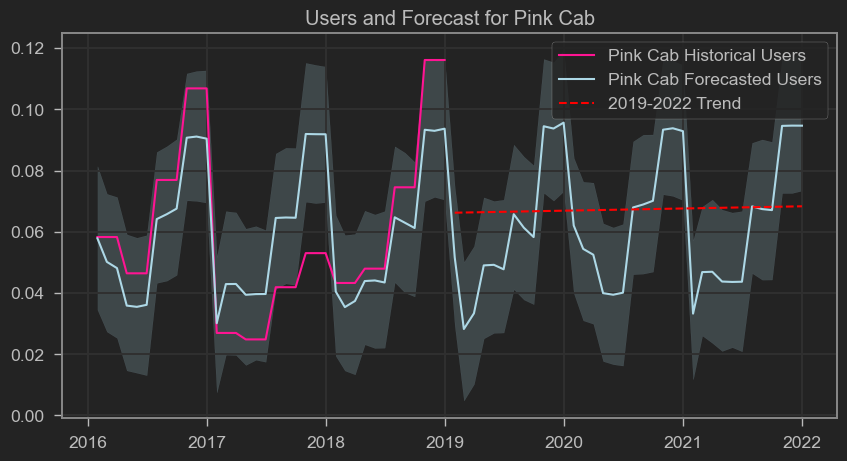

22:55:51 - cmdstanpy - INFO - Chain [1] start processing


Percentage slope for Pink Cab 1.083141300930283%


22:55:52 - cmdstanpy - INFO - Chain [1] done processing


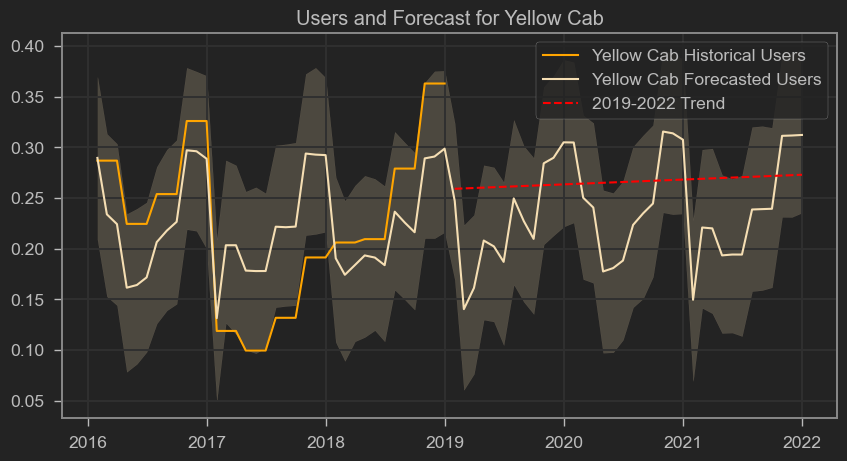

Percentage slope for Yellow Cab 1.8290638134310744%


In [310]:
model_pink, forecast_pink, slope_rad_pink, slope_deg_pink = train_and_forecast_with_regressors(
    combo_data, 'Pink Cab', 'Retention RatioQ', 'mean', ['Population'], periods=36
)
model_yellow, forecast_yellow, slope_rad_yellow, slope_deg_yellow = train_and_forecast_with_regressors(
    combo_data, 'Yellow Cab', 'Retention RatioQ', 'mean', ['Population'], periods=36
)

22:54:49 - cmdstanpy - INFO - Chain [1] start processing
22:54:50 - cmdstanpy - INFO - Chain [1] done processing


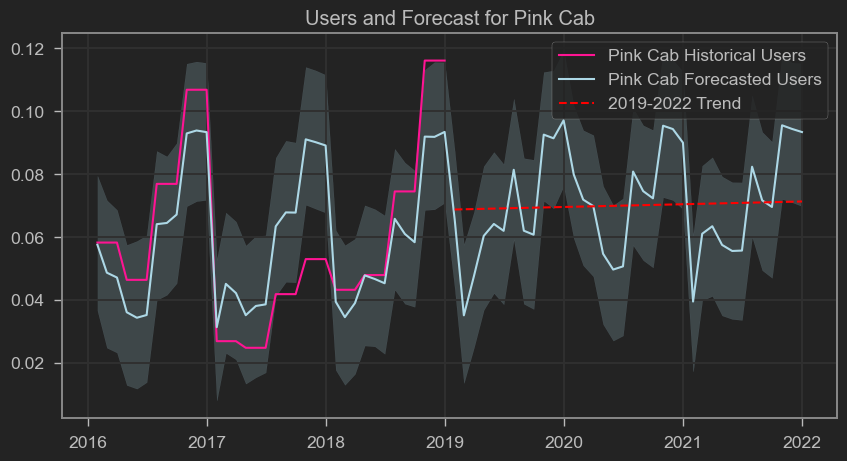

22:54:51 - cmdstanpy - INFO - Chain [1] start processing


Percentage slope for Pink Cab 1.2674472913769634%


22:54:52 - cmdstanpy - INFO - Chain [1] done processing


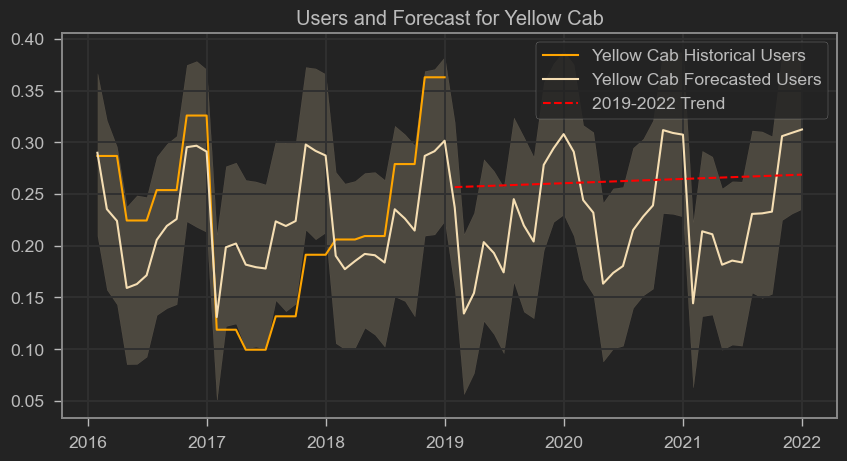

Percentage slope for Yellow Cab 1.6091437283794516%


In [308]:
model_pink, forecast_pink, slope_rad_pink, slope_deg_pink = train_and_forecast_with_regressors(
    combo_data, 'Pink Cab', 'Retention RatioQ', 'mean', ['Users'], periods=36
)
model_yellow, forecast_yellow, slope_rad_yellow, slope_deg_yellow = train_and_forecast_with_regressors(
    combo_data, 'Yellow Cab', 'Retention RatioQ', 'mean', ['Users'], periods=36
)

22:56:57 - cmdstanpy - INFO - Chain [1] start processing
22:56:58 - cmdstanpy - INFO - Chain [1] done processing


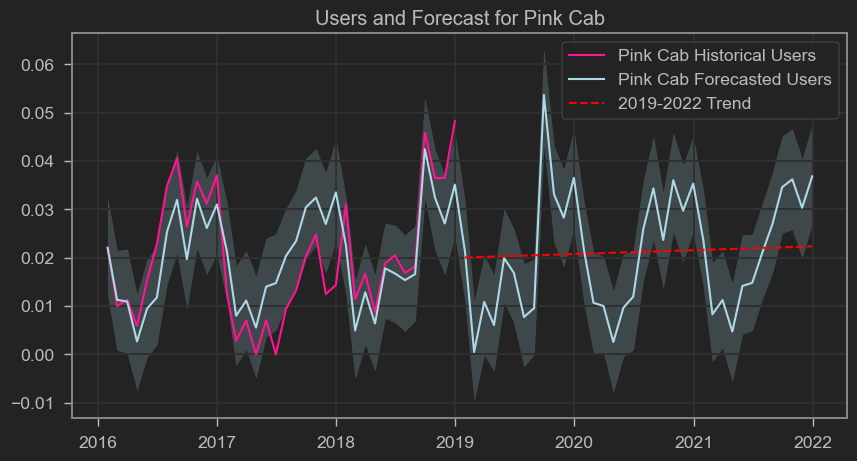

22:56:59 - cmdstanpy - INFO - Chain [1] start processing


Percentage slope for Pink Cab 3.9346132540297654%


22:57:00 - cmdstanpy - INFO - Chain [1] done processing


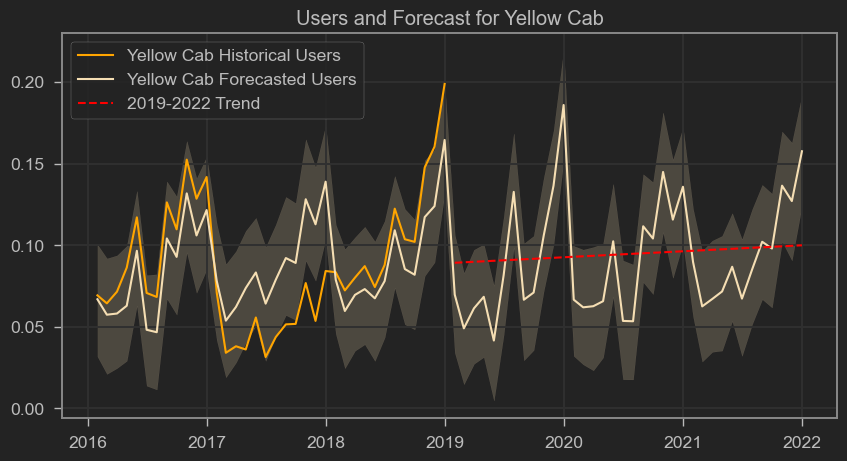

Percentage slope for Yellow Cab 4.11421789662546%


In [311]:
model_pink, forecast_pink, slope_rad_pink, slope_deg_pink = train_and_forecast_with_regressors(
    combo_data, 'Pink Cab', 'Retention RatioM', 'mean', ['Population'], periods=36
)
model_yellow, forecast_yellow, slope_rad_yellow, slope_deg_yellow = train_and_forecast_with_regressors(
    combo_data, 'Yellow Cab', 'Retention RatioM', 'mean', ['Population'], periods=36
)

22:57:57 - cmdstanpy - INFO - Chain [1] start processing
22:57:58 - cmdstanpy - INFO - Chain [1] done processing


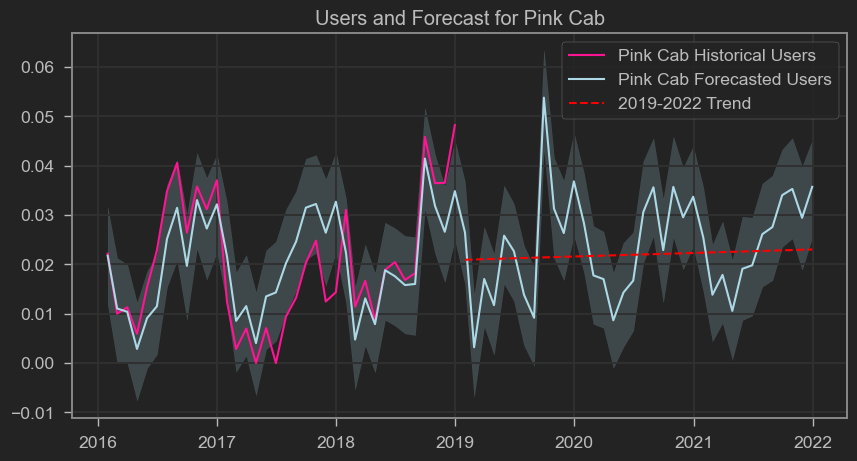

22:58:00 - cmdstanpy - INFO - Chain [1] start processing


Percentage slope for Pink Cab 3.4195913000819096%


22:58:01 - cmdstanpy - INFO - Chain [1] done processing


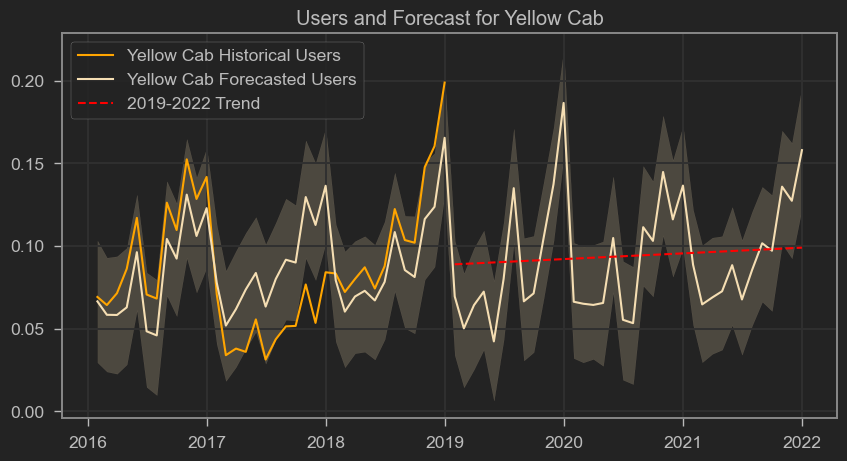

Percentage slope for Yellow Cab 3.8787183884701717%


In [312]:
model_pink, forecast_pink, slope_rad_pink, slope_deg_pink = train_and_forecast_with_regressors(
    combo_data, 'Pink Cab', 'Retention RatioM', 'mean', ['Users'], periods=36
)
model_yellow, forecast_yellow, slope_rad_yellow, slope_deg_yellow = train_and_forecast_with_regressors(
    combo_data, 'Yellow Cab', 'Retention RatioM', 'mean', ['Users'], periods=36
)

Predictive anlaysis shows that Yellow Cab potentially outstrips the Pink Cab , especially in context of Profit Per KM. However for retention ratios the forecastings seem to be similar.
Takingg account, that the Pink Cab is 60 % cheaper than Yellow Cab the decision depends on the investor's financial ability. Moreover yellow Cab is very strong in NY, whereas the highest mode 
for Pink Cab is in LA. Thereffore, there is a strong potential to growth for the Pink Cab if mor wise strategy is taken by investor. 